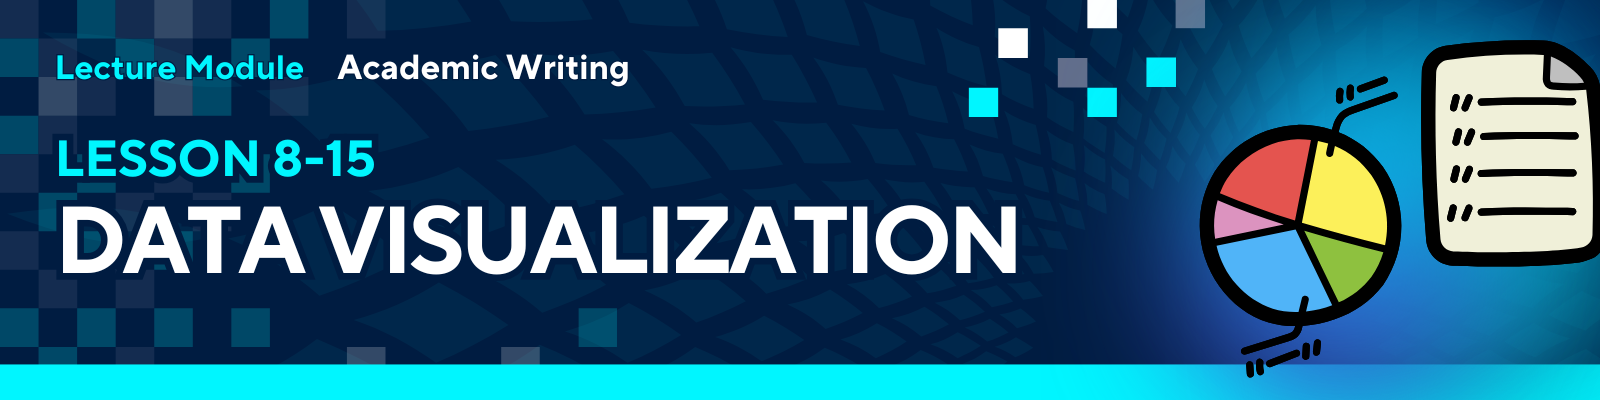

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from urllib.request import urlretrieve
plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this:
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
#city_temperature = load_dataset("https://www.dropbox.com/scl/fi/s4y96dto8d9vu20ao5du5/city_temperature.csv?rlkey=ppohfggy8i8v329y1dg9ub5p6&st=fuf9bpzy&dl=0&raw=1", "city_temperature.csv")

life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "../life_expectancy.csv")
city_temperature = load_dataset("https://www.dropbox.com/s/d56yws7bkn3eeam/city_temperature.csv?raw=1", "../city_temperature.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"

In [3]:
# Filter for year 2010 and create the Economy_status column
life_exp_adult_mort = life_expectancy[life_expectancy['Year'] == 2010].reset_index(drop=True).copy()
life_exp_adult_mort['Economy_status'] = life_exp_adult_mort['Economy_status_Developed'].map({1: 'Developed', 0: 'Developing'})

# Create Region mapping using pandas' str.contains
life_exp_adult_mort['Region'] = life_exp_adult_mort['Region'].apply(
    lambda x: 'Europe' if 'Europe' in str(x) else
             'Americas' if 'America' in str(x) else
             'Asia' if any(region in str(x) for region in ['Asia', 'Middle East']) else
             x
)

# Select the required columns
columns_to_keep = ['Country', 'Economy_status', 'Life_expectancy', 'Adult_mortality',
                   'Alcohol_consumption',  'Schooling',
                  'Under_five_deaths', 'Infant_deaths', 'GDP_per_capita', 'BMI', 'Population_mln','Region']
life_exp_adult_mort = life_exp_adult_mort[columns_to_keep]

# Display the dataframe
life_exp_adult_mort

Country Economy_status  Life_expectancy  \
0                 Switzerland      Developed             82.2   
1                     Germany      Developed             80.0   
2                      Belize     Developing             72.1   
3                      Sweden      Developed             81.5   
4           Brunei Darussalam     Developing             74.7   
..                        ...            ...              ...   
174                   Austria      Developed             80.6   
175          Congo, Dem. Rep.     Developing             56.9   
176                    Guyana     Developing             68.1   
177                     Gabon     Developing             61.4   
178  Central African Republic     Developing             47.3   

     Adult_mortality  Alcohol_consumption  Schooling  Under_five_deaths  \
0            56.9105                10.01       13.3                4.6   
1            77.6040                11.58       13.8                4.2   
2           181.5840                 6.47       10.5               18.9   
3            57.4920                 7.38       12.3                3.1   
4            91.9455                 0.25        8.8                9.7   
..               ...                  ...        ...                ...   
174          74.5020                12.10       11.8                4.3   
175         282.5420                 4.02        5.4              113.8   
176         216.6485                 5.56        8.1               37.4   
177         276.4095                 8.36        7.6               61.7   
178         474.0650                 1.96        3.6              145.0   

     Infant_deaths  GDP_per_capita   BMI  Population_mln    Region  
0              3.9           82027  25.1            7.82    Europe  
1              3.5           37761  26.3           81.78    Europe  
2             16.2            4768  28.4            0.32  Americas  
3              2.5           48370  25.8            9.38    Europe  
4              7.9           33437  26.4            0.39      Asia  
..             ...             ...   ...             ...       ...  
174            3.6           43335  25.4            8.36    Europe  
175           83.5             404  21.6           64.56    Africa  
176           30.6            4847  25.8            0.75  Americas  
177           41.6            6864  24.7            1.62    Africa  
178           99.0             532  22.4            4.39    Africa  

[179 rows x 12 columns]



---



# **Lesson** <font color="#B0AD89"><strong>4A ⫶⫶ </strong></font>Visualizing Associations


<img src="https://i.imgur.com/msYG85A.png" width=1024 />

<img src="https://i.imgur.com/XXP9ESc.png" width=1024 />


## <font color="#B0AD89"><strong>4.1 ⫶ </strong></font>Simple x-y relationship

<img src="https://i.imgur.com/e8vE1e7.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Scatter plots

<img src="https://i.imgur.com/JUIVGiX.png" width=1024 />

<img src="https://i.imgur.com/V1MYFzn.png" width=1024 />



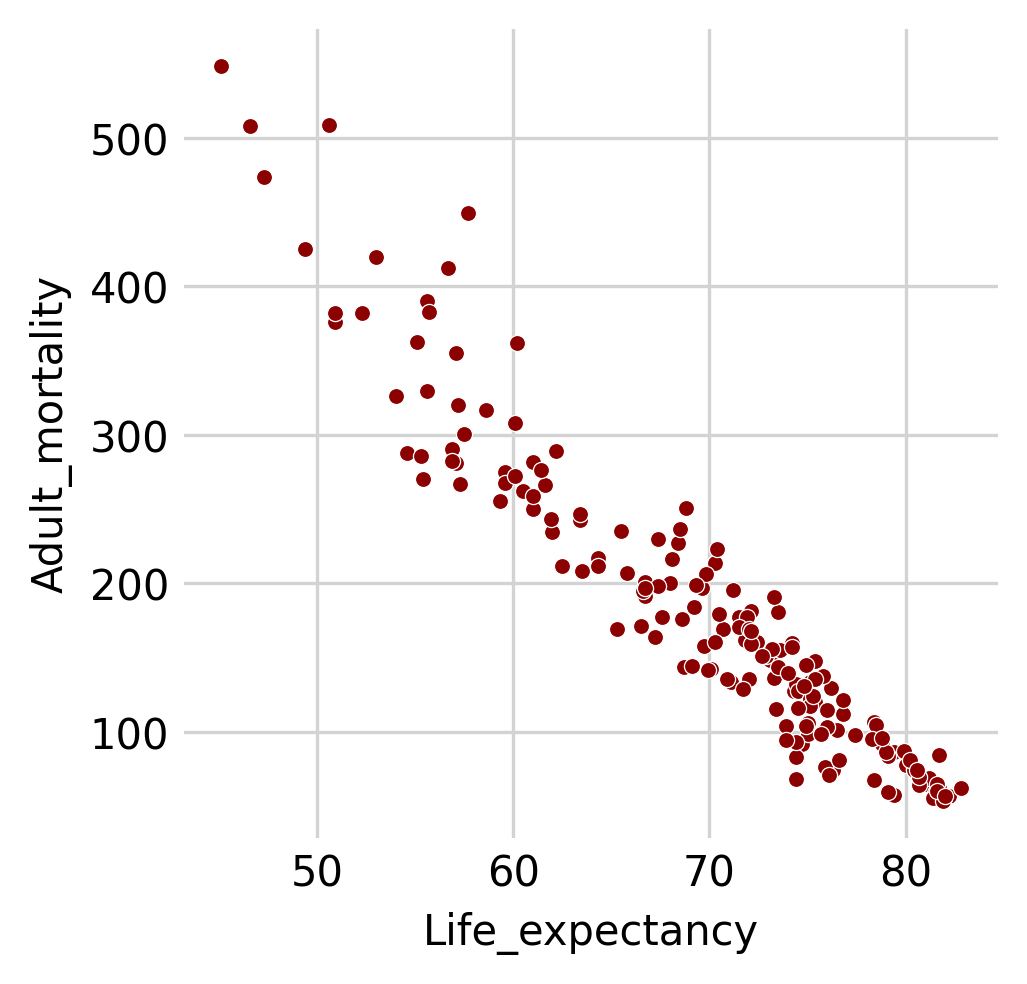

In [4]:
# Set figure size (half of 7x7)
plt.figure(figsize=(3.5, 3.5))

# Create scatter plot
sns.scatterplot(data=life_exp_adult_mort,
                x='Life_expectancy',
                y='Adult_mortality',
                s=15,
                facecolor='darkred',
                edgecolor='white',
                zorder=2)

# Add grid
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Display the plot
plt.show()

<img src="https://i.imgur.com/HYR6qNJ.png" width=1024 />



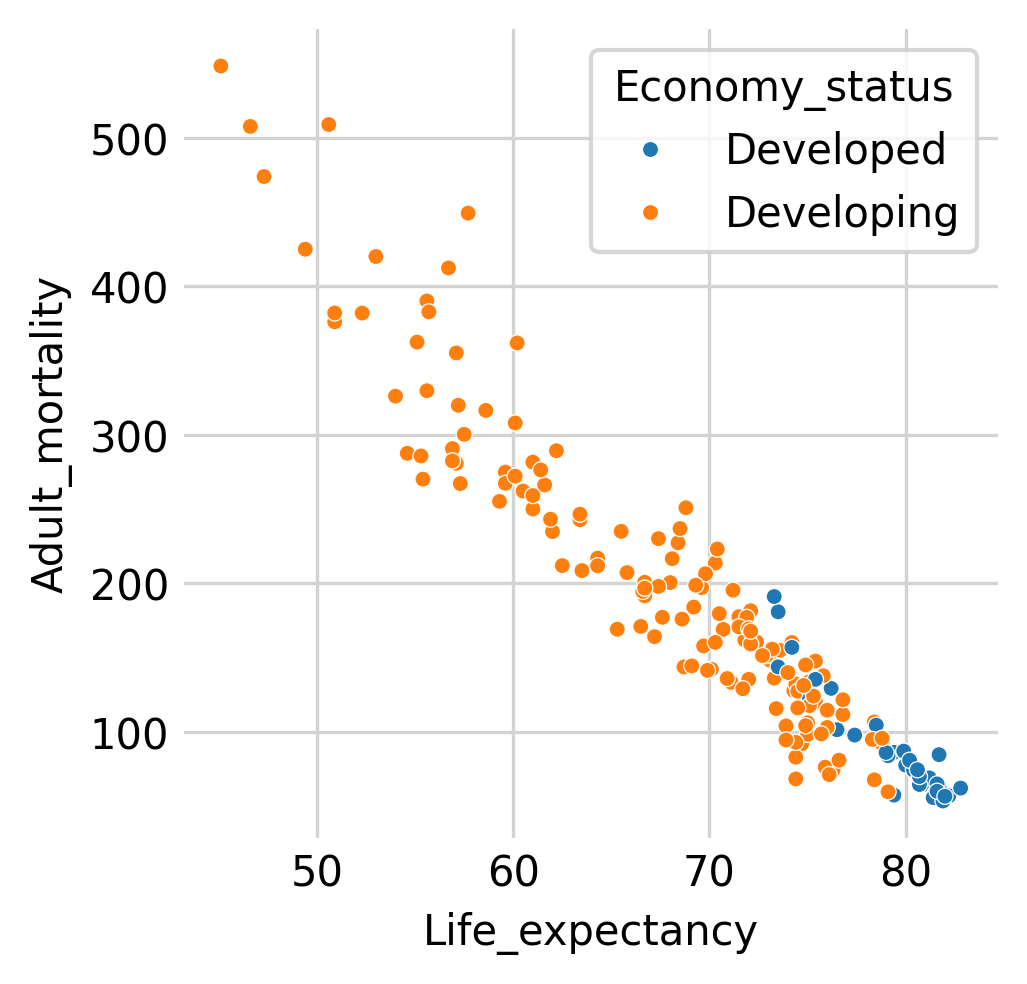

In [5]:
plt.figure(figsize=(3.5, 3.5))

sns.scatterplot(data=life_exp_adult_mort,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Economy_status',
               s=15,
               edgecolor='white',
               zorder=2)

plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Position legend at (0.8, 0.8)
#plt.legend(bbox_to_anchor=(0.8, 0.8))

plt.show()

<img src="https://i.imgur.com/Fl33JHb.png" width=1024 />



<Figure size 1050x1050 with 0 Axes>

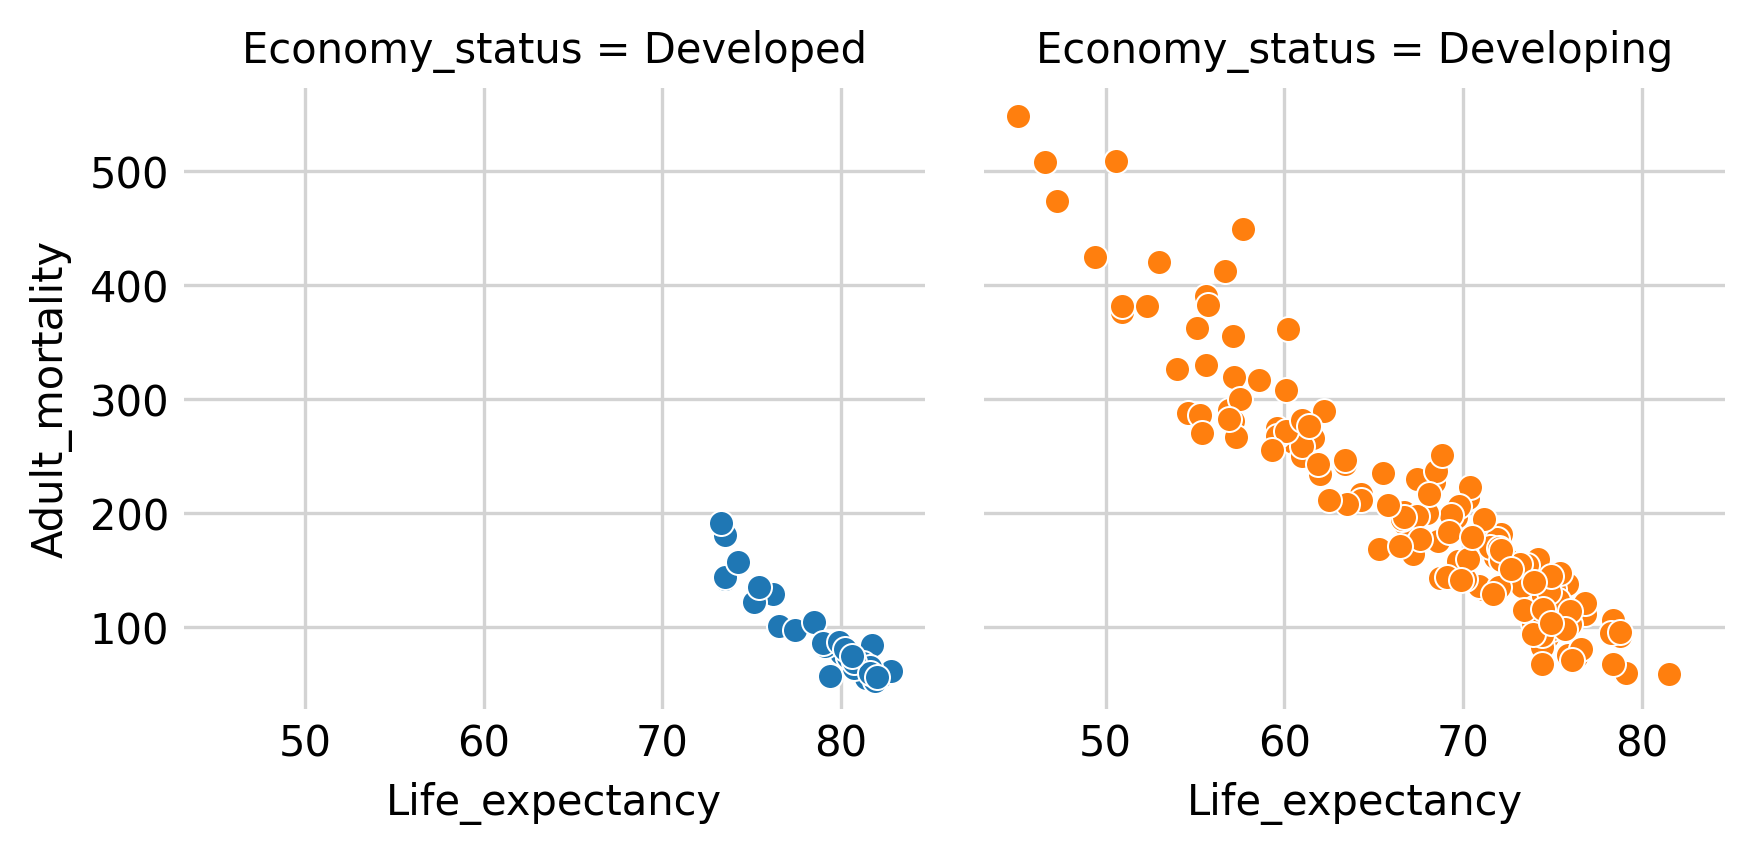

In [6]:
plt.figure(figsize=(3.5, 3.5))

g = sns.FacetGrid(life_exp_adult_mort,
                 col='Economy_status',
                 hue='Economy_status',
                 height=3, aspect=1)

g.map_dataframe(sns.scatterplot,
                x='Life_expectancy',
                y='Adult_mortality',
                edgecolor='white',
                zorder=2)

for ax in g.axes.flat:
   ax.grid(True, color='lightgrey', linestyle='-', zorder=1)
   ax.spines[['top','right','left','bottom']].set_visible(False)
   ax.tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/KM9XveE.png" width=1024 />

<img src="https://i.imgur.com/8rQZeD0.png" width=1024 />





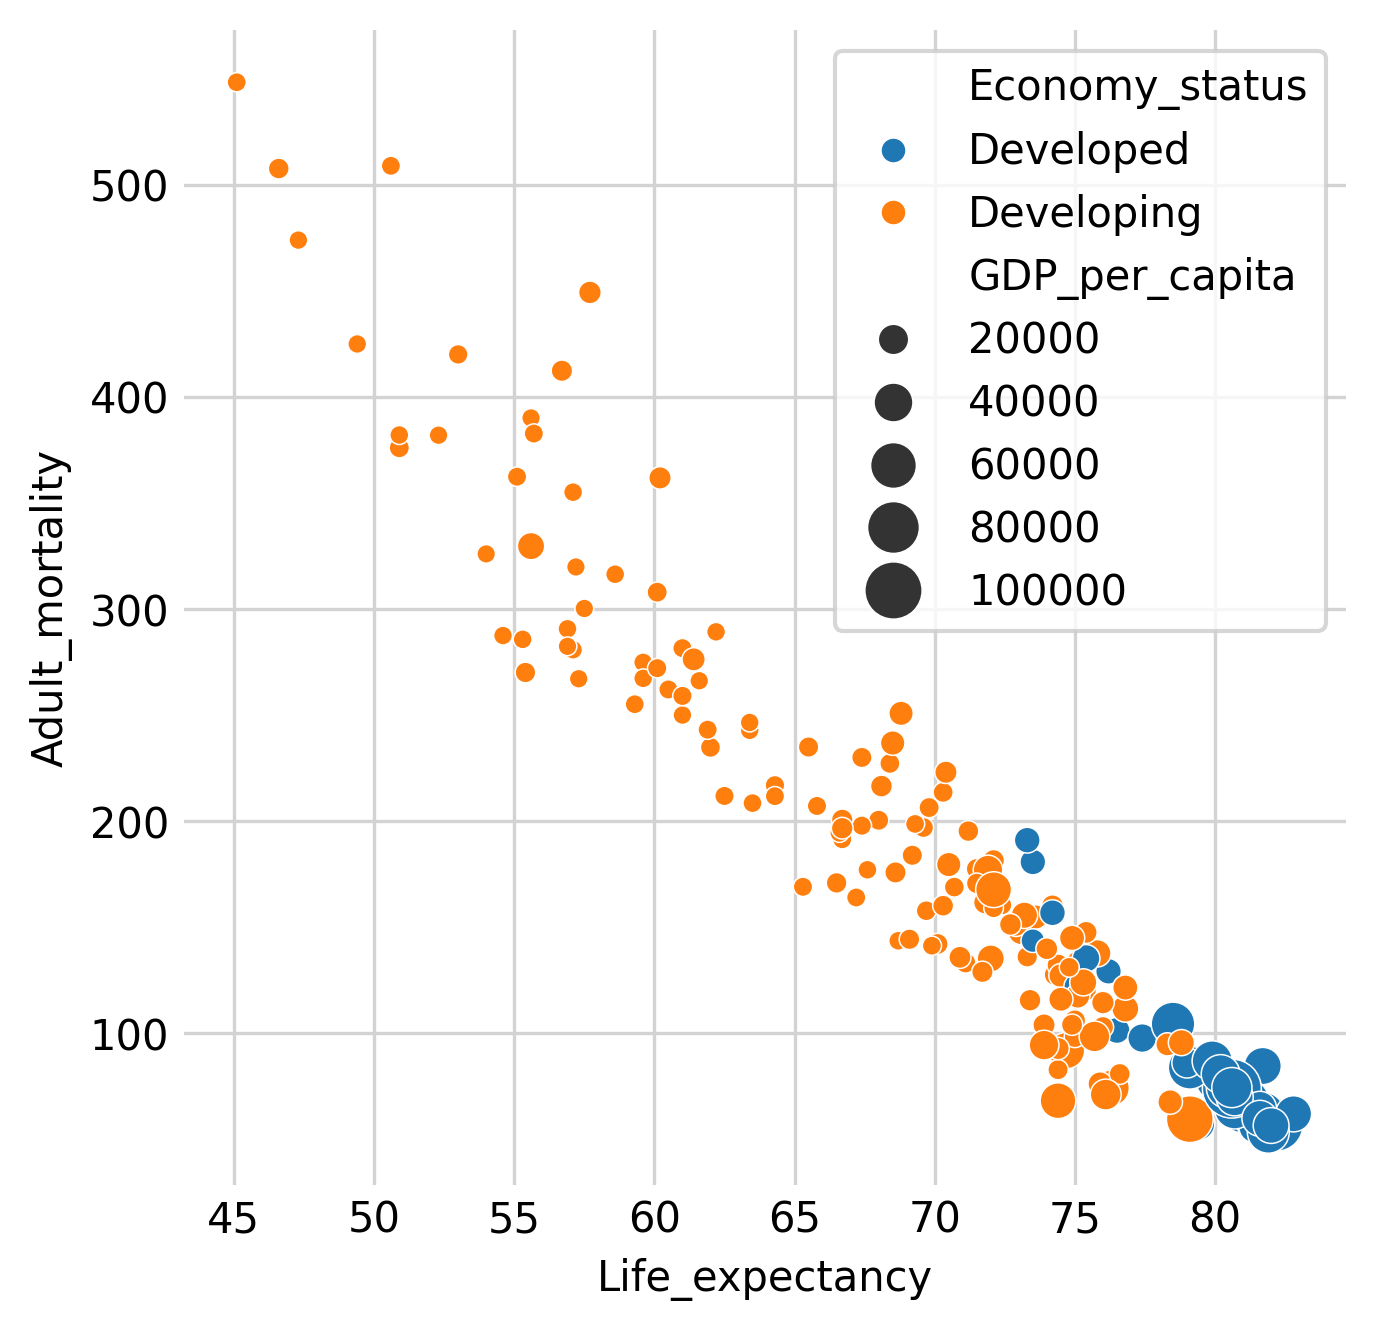

In [7]:
plt.figure(figsize=(5, 5))

sns.scatterplot(data=life_exp_adult_mort,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Economy_status',
               size='GDP_per_capita', sizes=(20,200),
               edgecolor='white',
               zorder=2)

plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Position legend at (0.8, 0.8)
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Paired data
<img src="https://i.imgur.com/BkAymII.png" width=1024 />





In [8]:
# Filter and select relevant columns
slope_data = life_expectancy[
   (life_expectancy['Region'] == 'Middle East') &
   (life_expectancy['Year'].isin([2000, 2015]))
][['Country', 'Year', 'Life_expectancy']]


# Reshape data using pivot
scatter_data = slope_data.pivot(
   index='Country',
   columns='Year',
   values='Life_expectancy'
).reset_index()

scatter_data

Year               Country  2000  2015
0                  Bahrain  74.4  76.8
1       Iran, Islamic Rep.  70.2  75.8
2                     Iraq  69.1  69.9
3                   Israel  79.0  82.1
4                   Jordan  71.7  74.1
5                   Kuwait  73.1  75.1
6                  Lebanon  74.5  78.8
7                     Oman  72.1  76.9
8                    Qatar  77.5  79.8
9             Saudi Arabia  72.6  74.7
10    Syrian Arab Republic  73.1  69.9
11                 Turkiye  70.0  76.5
12    United Arab Emirates  74.3  77.3
13             Yemen, Rep.  60.7  66.1


<img src="https://i.imgur.com/2DSh6HX.png" width=1024 />

<img src="https://i.imgur.com/Lg9KFCY.png" width=1024 />


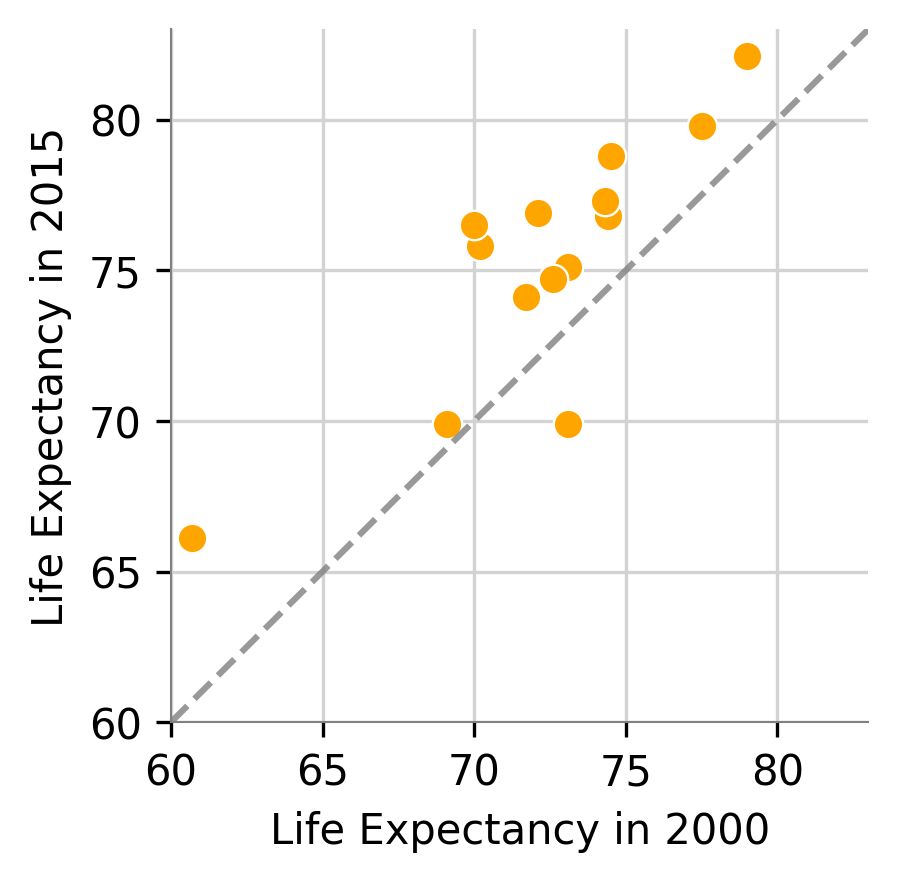

In [9]:
plt.figure(figsize=(3, 3))

sns.scatterplot(scatter_data,
            x=2000,
            y=2015,
            s=50,
            facecolor='orange',
            edgecolor='white',
            zorder=2)

# Add diagonal reference line
plt.plot([60, 83], [60, 83], '--', color='grey', alpha=0.8)

plt.xlim(60, 83)
plt.ylim(60, 83)

plt.xlabel('Life Expectancy in 2000')
plt.ylabel('Life Expectancy in 2015')

plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right']].set_visible(False)
plt.gca().spines[['left','bottom']].set_color('grey')
plt.gca().spines[['left','bottom']].set_linewidth(0.5)

plt.show()

<img src="https://i.imgur.com/mk2JmES.png" width=1024 />

<img src="https://i.imgur.com/SIitdcI.png" width=1024 />


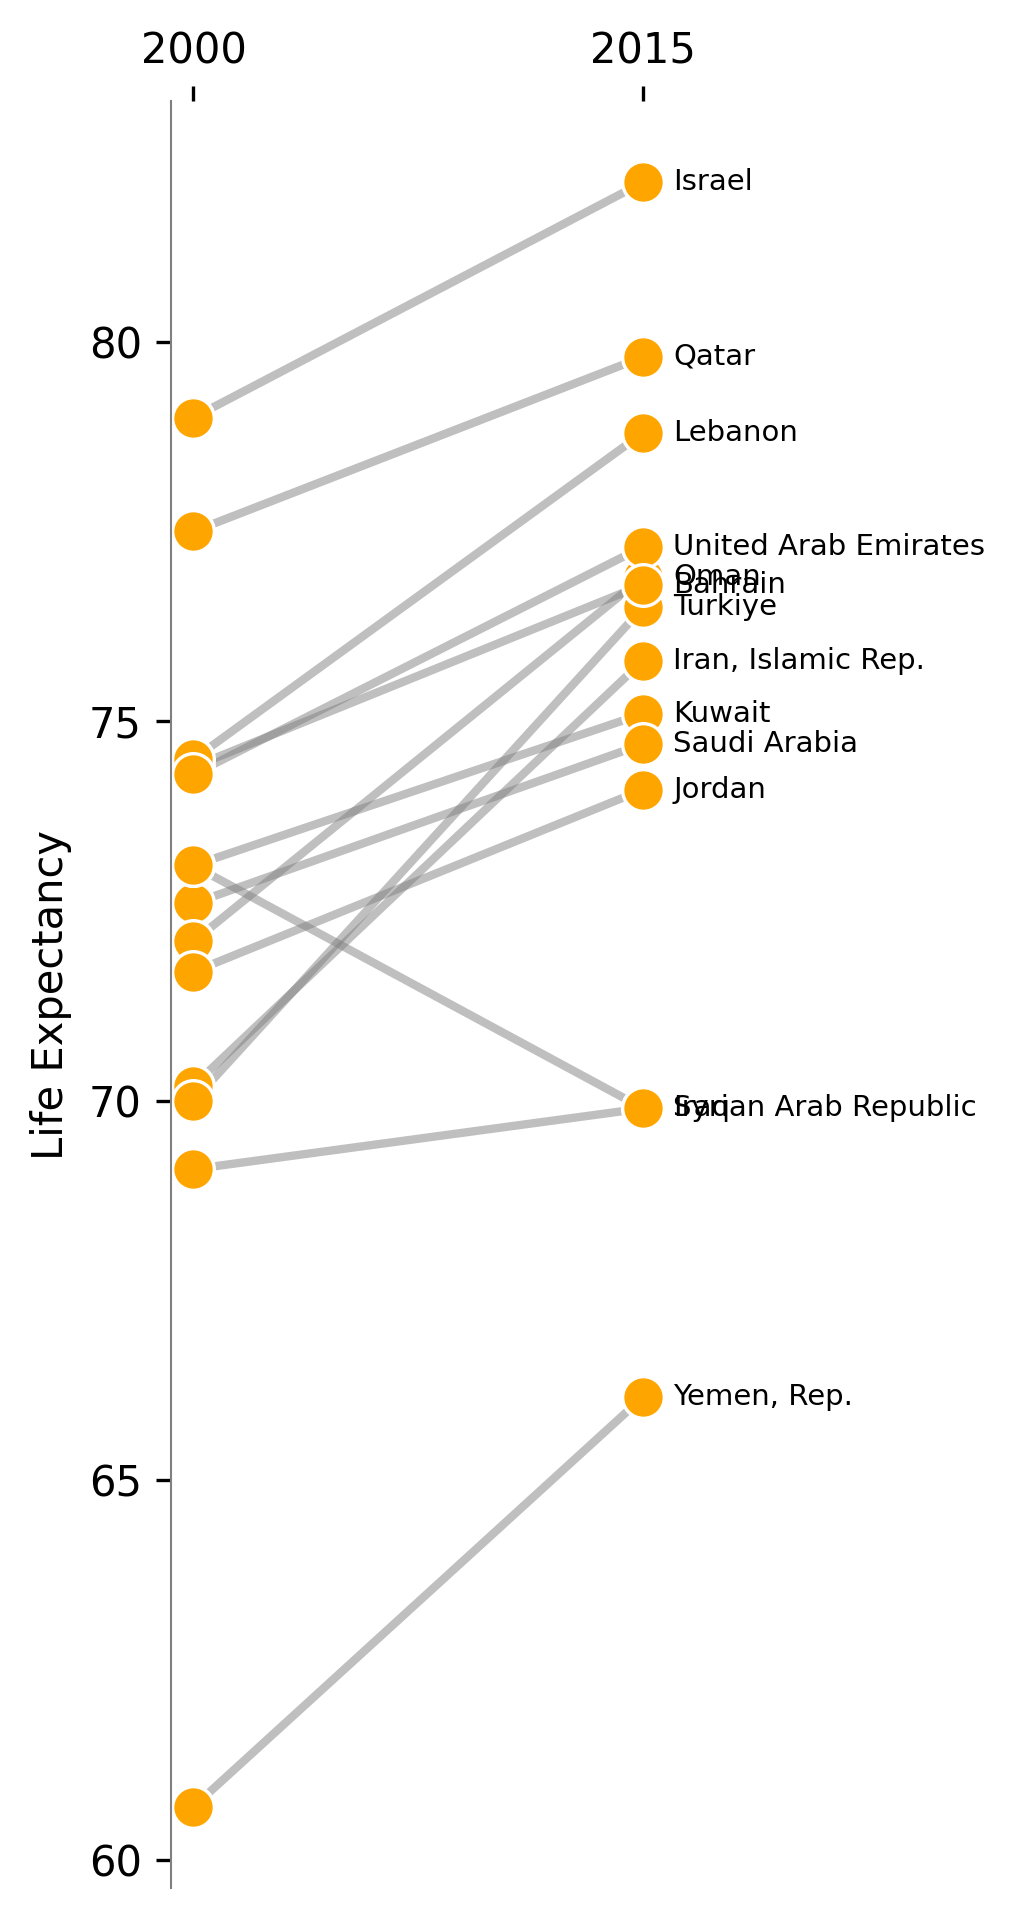

In [10]:
fig = plt.figure(figsize=(3.5, 6.5))

# Plot lines connecting points for each country
sns.lineplot(slope_data,
            x='Year',
            y='Life_expectancy',
            units='Country',
            estimator=None,
            color='grey',
            alpha=0.5,
            linewidth=2,
            zorder=1)

# Add scatter points
sns.scatterplot(slope_data,
                x='Year',
                y='Life_expectancy',
                color='orange',
                s=100,
                edgecolor='white',
                zorder=2)

# Add labels for 2015
for _, row in slope_data[slope_data['Year'] == 2015].iterrows():
   plt.annotate(row['Country'],
               xy=(row['Year'], row['Life_expectancy']),
               xytext=(row['Year']+1, row['Life_expectancy']),
               va='center',size=7)

plt.gca().spines[['top','right','bottom']].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks([2000, 2015])
plt.xlabel('')
plt.ylabel('Life Expectancy')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

In [11]:
slope_data2 = life_expectancy[
   (life_expectancy['Region'] == 'Middle East') &
   (life_expectancy['Year'].isin([2000, 2008, 2015]))
][['Country', 'Year', 'Life_expectancy']]

slope_data2

Country  Year  Life_expectancy
0                  Turkiye  2015             76.5
74                    Oman  2015             76.9
268                 Israel  2015             82.1
323     Iran, Islamic Rep.  2008             73.0
329     Iran, Islamic Rep.  2000             70.2
330                   Iraq  2015             69.9
408   Syrian Arab Republic  2008             73.6
550                 Israel  2008             81.0
590                 Kuwait  2015             75.1
638           Saudi Arabia  2015             74.7
786   Syrian Arab Republic  2015             69.9
819                   Iraq  2000             69.1
832                 Jordan  2015             74.1
906   United Arab Emirates  2015             77.3
960                Bahrain  2000             74.4
976           Saudi Arabia  2000             72.6
1009               Turkiye  2000             70.0
1097                  Oman  2008             75.2
1116               Lebanon  2015             78.8
1127               Lebanon  2000             74.5
1241  United Arab Emirates  2008             76.0
1248                  Oman  2000             72.1
1362  Syrian Arab Republic  2000             73.1
1472           Yemen, Rep.  2008             64.9
1623                 Qatar  2015             79.8
1699                Israel  2000             79.0
1706           Yemen, Rep.  2015             66.1
1766           Yemen, Rep.  2000             60.7
1879  United Arab Emirates  2000             74.3
1929                Jordan  2000             71.7
1976          Saudi Arabia  2008             73.6
2018               Turkiye  2008             73.6
2105                  Iraq  2008             68.2
2117    Iran, Islamic Rep.  2015             75.8
2205                Kuwait  2008             74.0
2340               Lebanon  2008             77.9
2682                 Qatar  2008             78.8
2690                 Qatar  2000             77.5
2721                Kuwait  2000             73.1
2782               Bahrain  2008             75.8
2810                Jordan  2008             73.1
2848               Bahrain  2015             76.8

<img src="https://i.imgur.com/fFe4gRi.png" width=1024 />


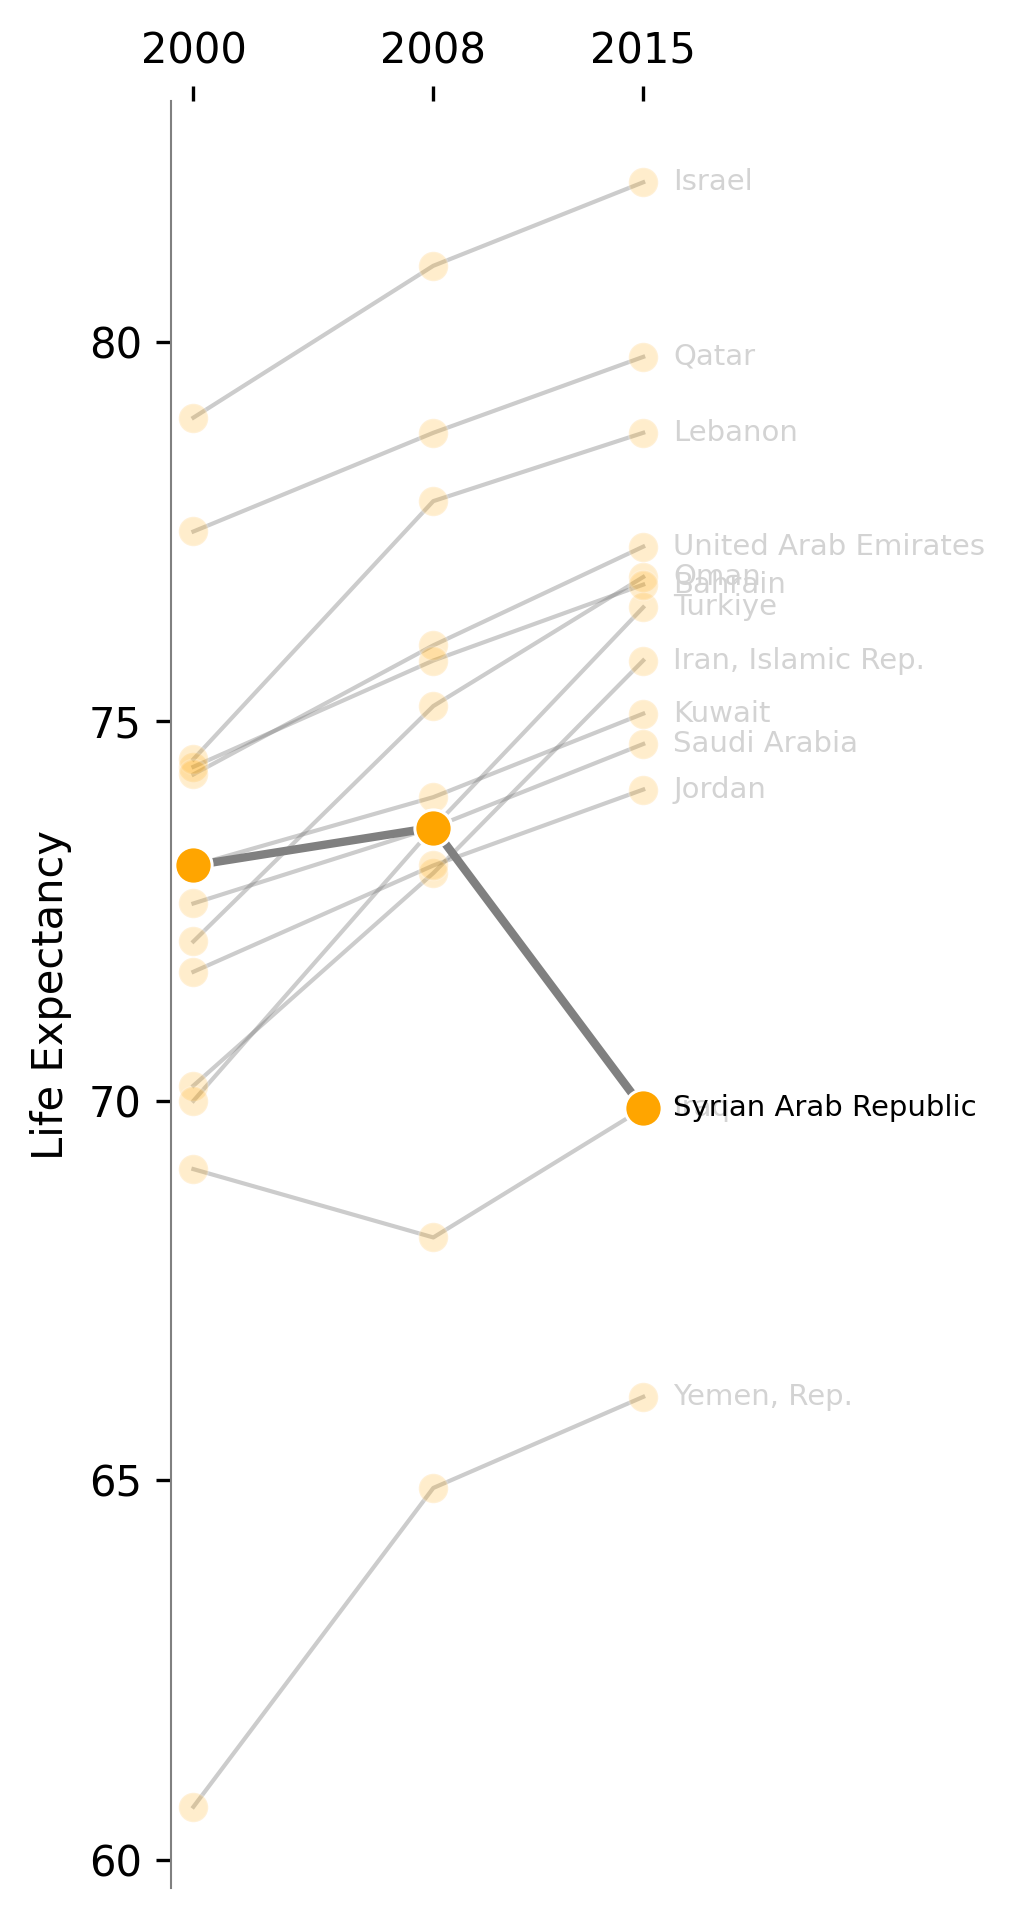

In [12]:
fig = plt.figure(figsize=(3.5, 6.5))

# Plot lines connecting points for each country
sns.lineplot(slope_data2,
            x='Year',
            y='Life_expectancy',
            units='Country',
            estimator=None,
            color='grey',
            alpha=0.4,
            linewidth=1,
            zorder=1)

# Add scatter points
sns.scatterplot(slope_data2,
                x='Year',
                y='Life_expectancy',
                color='orange',
                s=50,
                edgecolor='white',
                alpha=0.2,
                zorder=2)

# Overlay Syria's data with alpha=1
sns.lineplot(slope_data2.query("Country == 'Syrian Arab Republic'"),
             x='Year',
            y='Life_expectancy',
            color='grey',
             alpha=1,
             linewidth=2,
             zorder=1)

sns.scatterplot(slope_data2.query("Country == 'Syrian Arab Republic'"),
                x='Year',
                y='Life_expectancy',
                color='orange',
                s=80,
                edgecolor='white',
                alpha=1,
                zorder=2)

## Add labels for 2015
# Add labels with conditional color
for _, row in slope_data2[slope_data2['Year'] == 2015].iterrows():
   color = 'black' if row['Country'] == 'Syrian Arab Republic' else 'lightgrey'
   plt.annotate(row['Country'],
               xy=(row['Year'], row['Life_expectancy']),
               xytext=(row['Year']+1, row['Life_expectancy']),
               va='center', size=7, color=color)

plt.gca().spines[['top','right','bottom']].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks([2000, 2008, 2015])
plt.xlabel('')
plt.ylabel('Life Expectancy')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 4.1 ᆢ</strong></font>ᆢᆢ
**Issue: Does European Union countries are getting better GDP per capita in 2010 compared to the year 2000 and 2005?**

From the following dataset, make a pair plot for GDP per capita of European Union countries. Compare the year 2000, 2005, and 2010.


In [13]:
europe_GDP = life_expectancy.query(
   "Year in [2000, 2005, 2010] and Region == 'European Union' and Country != 'Luxembourg'"
)[['Country', 'Year', 'GDP_per_capita']]

europe_GDP

Country  Year  GDP_per_capita
7       Hungary  2000            8971
35      Germany  2010           37761
46       Sweden  2010           48370
66    Lithuania  2005            9766
111       Italy  2005           33258
...         ...   ...             ...
2652      Italy  2010           32058
2657     Greece  2000           18643
2724     Poland  2005            8569
2806    Austria  2010           43335
2823    Czechia  2000           12312

[78 rows x 3 columns]

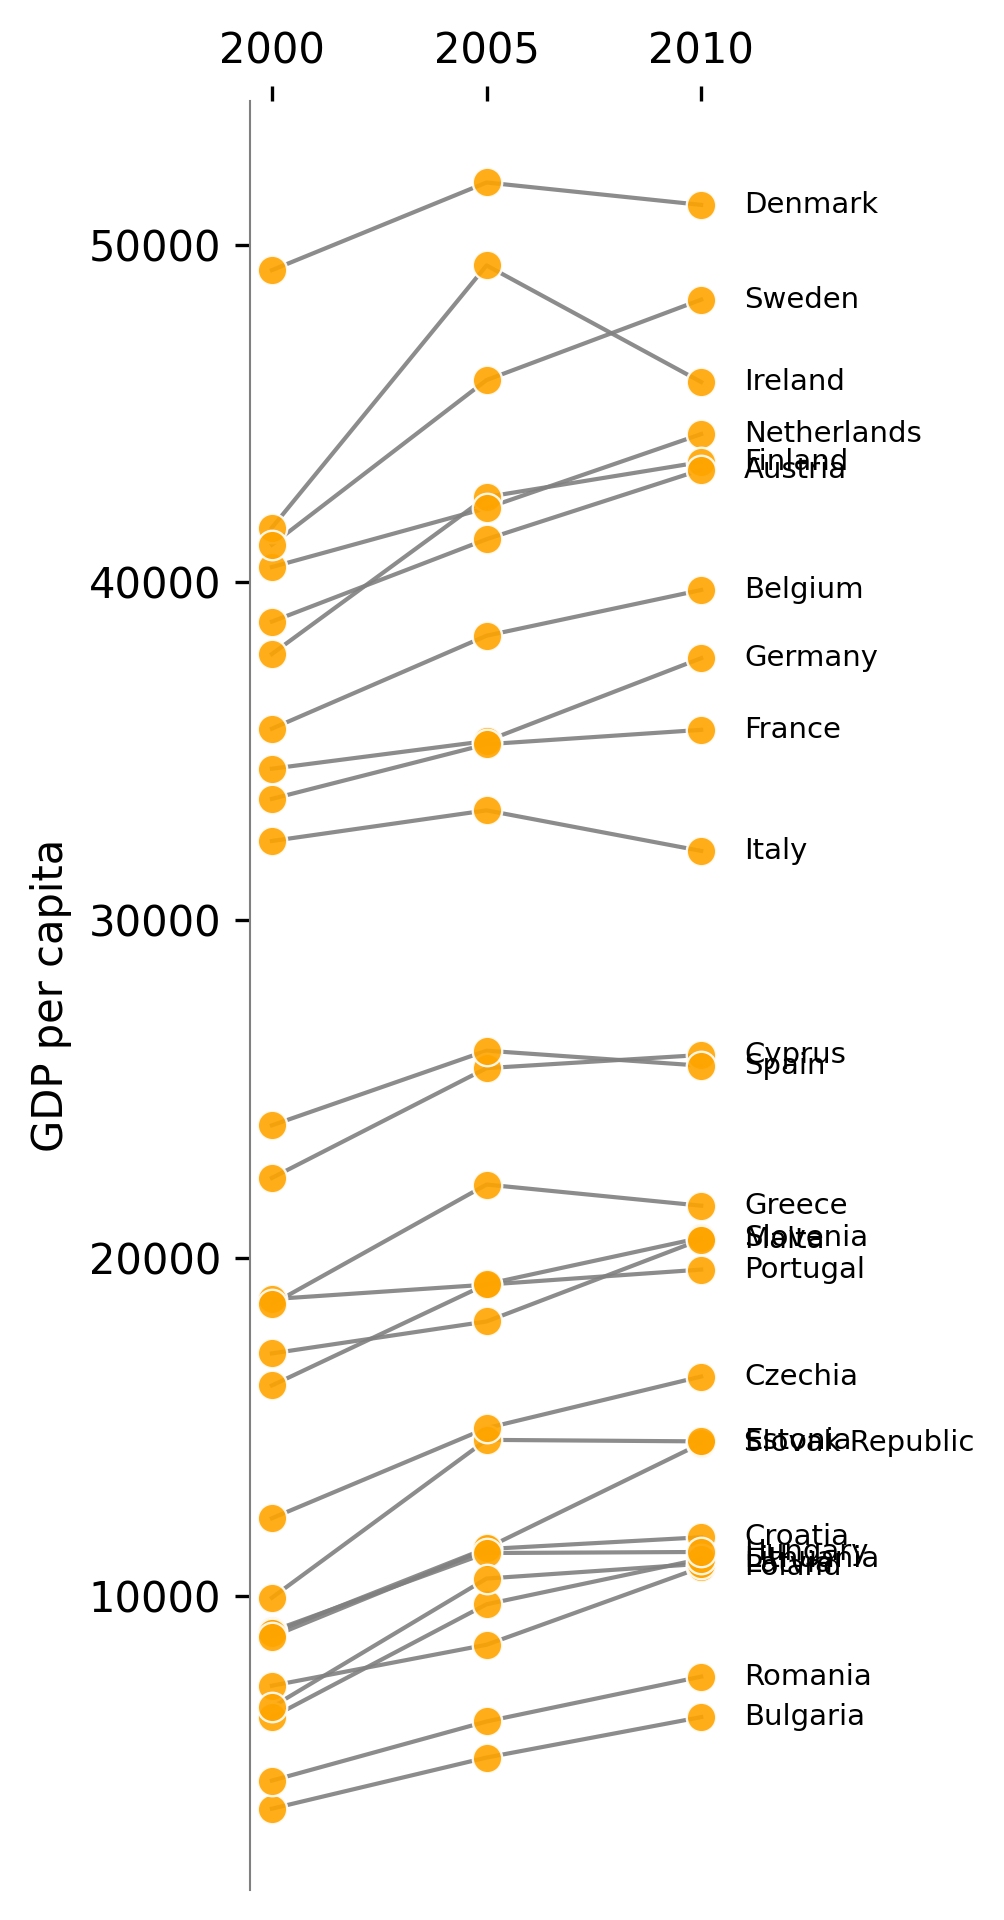

In [14]:
fig = plt.figure(figsize=(3.5, 6.5))

# Plot lines connecting points for each country
sns.lineplot(europe_GDP,
            x='Year',
            y='GDP_per_capita',
            units='Country',
            estimator=None,
            color='grey',
            alpha=0.9,
            linewidth=1,
            zorder=1)

# Add scatter points
sns.scatterplot(europe_GDP,
                x='Year',
                y='GDP_per_capita',
                color='orange',
                s=50,
                edgecolor='white',
                alpha=0.9,
                zorder=2)

## Add labels for 2015
# Add labels with conditional color
for _, row in europe_GDP[europe_GDP['Year'] == 2010].iterrows():
   color = 'black'
   plt.annotate(row['Country'],
               xy=(row['Year'], row['GDP_per_capita']),
               xytext=(row['Year']+1, row['GDP_per_capita']),
               va='center', size=7, color=color)

plt.gca().spines[['top','right','bottom']].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks([2000, 2005, 2010])
plt.xlabel('')
plt.ylabel('GDP per capita')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()



---



## <font color="#B0AD89"><strong>4.2 ⫶ </strong></font>Multiple x-y relationships
<img src="https://i.imgur.com/5YUe2WA.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Scatter matrix

<img src="https://i.imgur.com/exQOoeB.png" width=1024 />

<img src="https://i.imgur.com/UUw3iQH.png" width=1024 />

<Figure size 1800x1800 with 0 Axes>

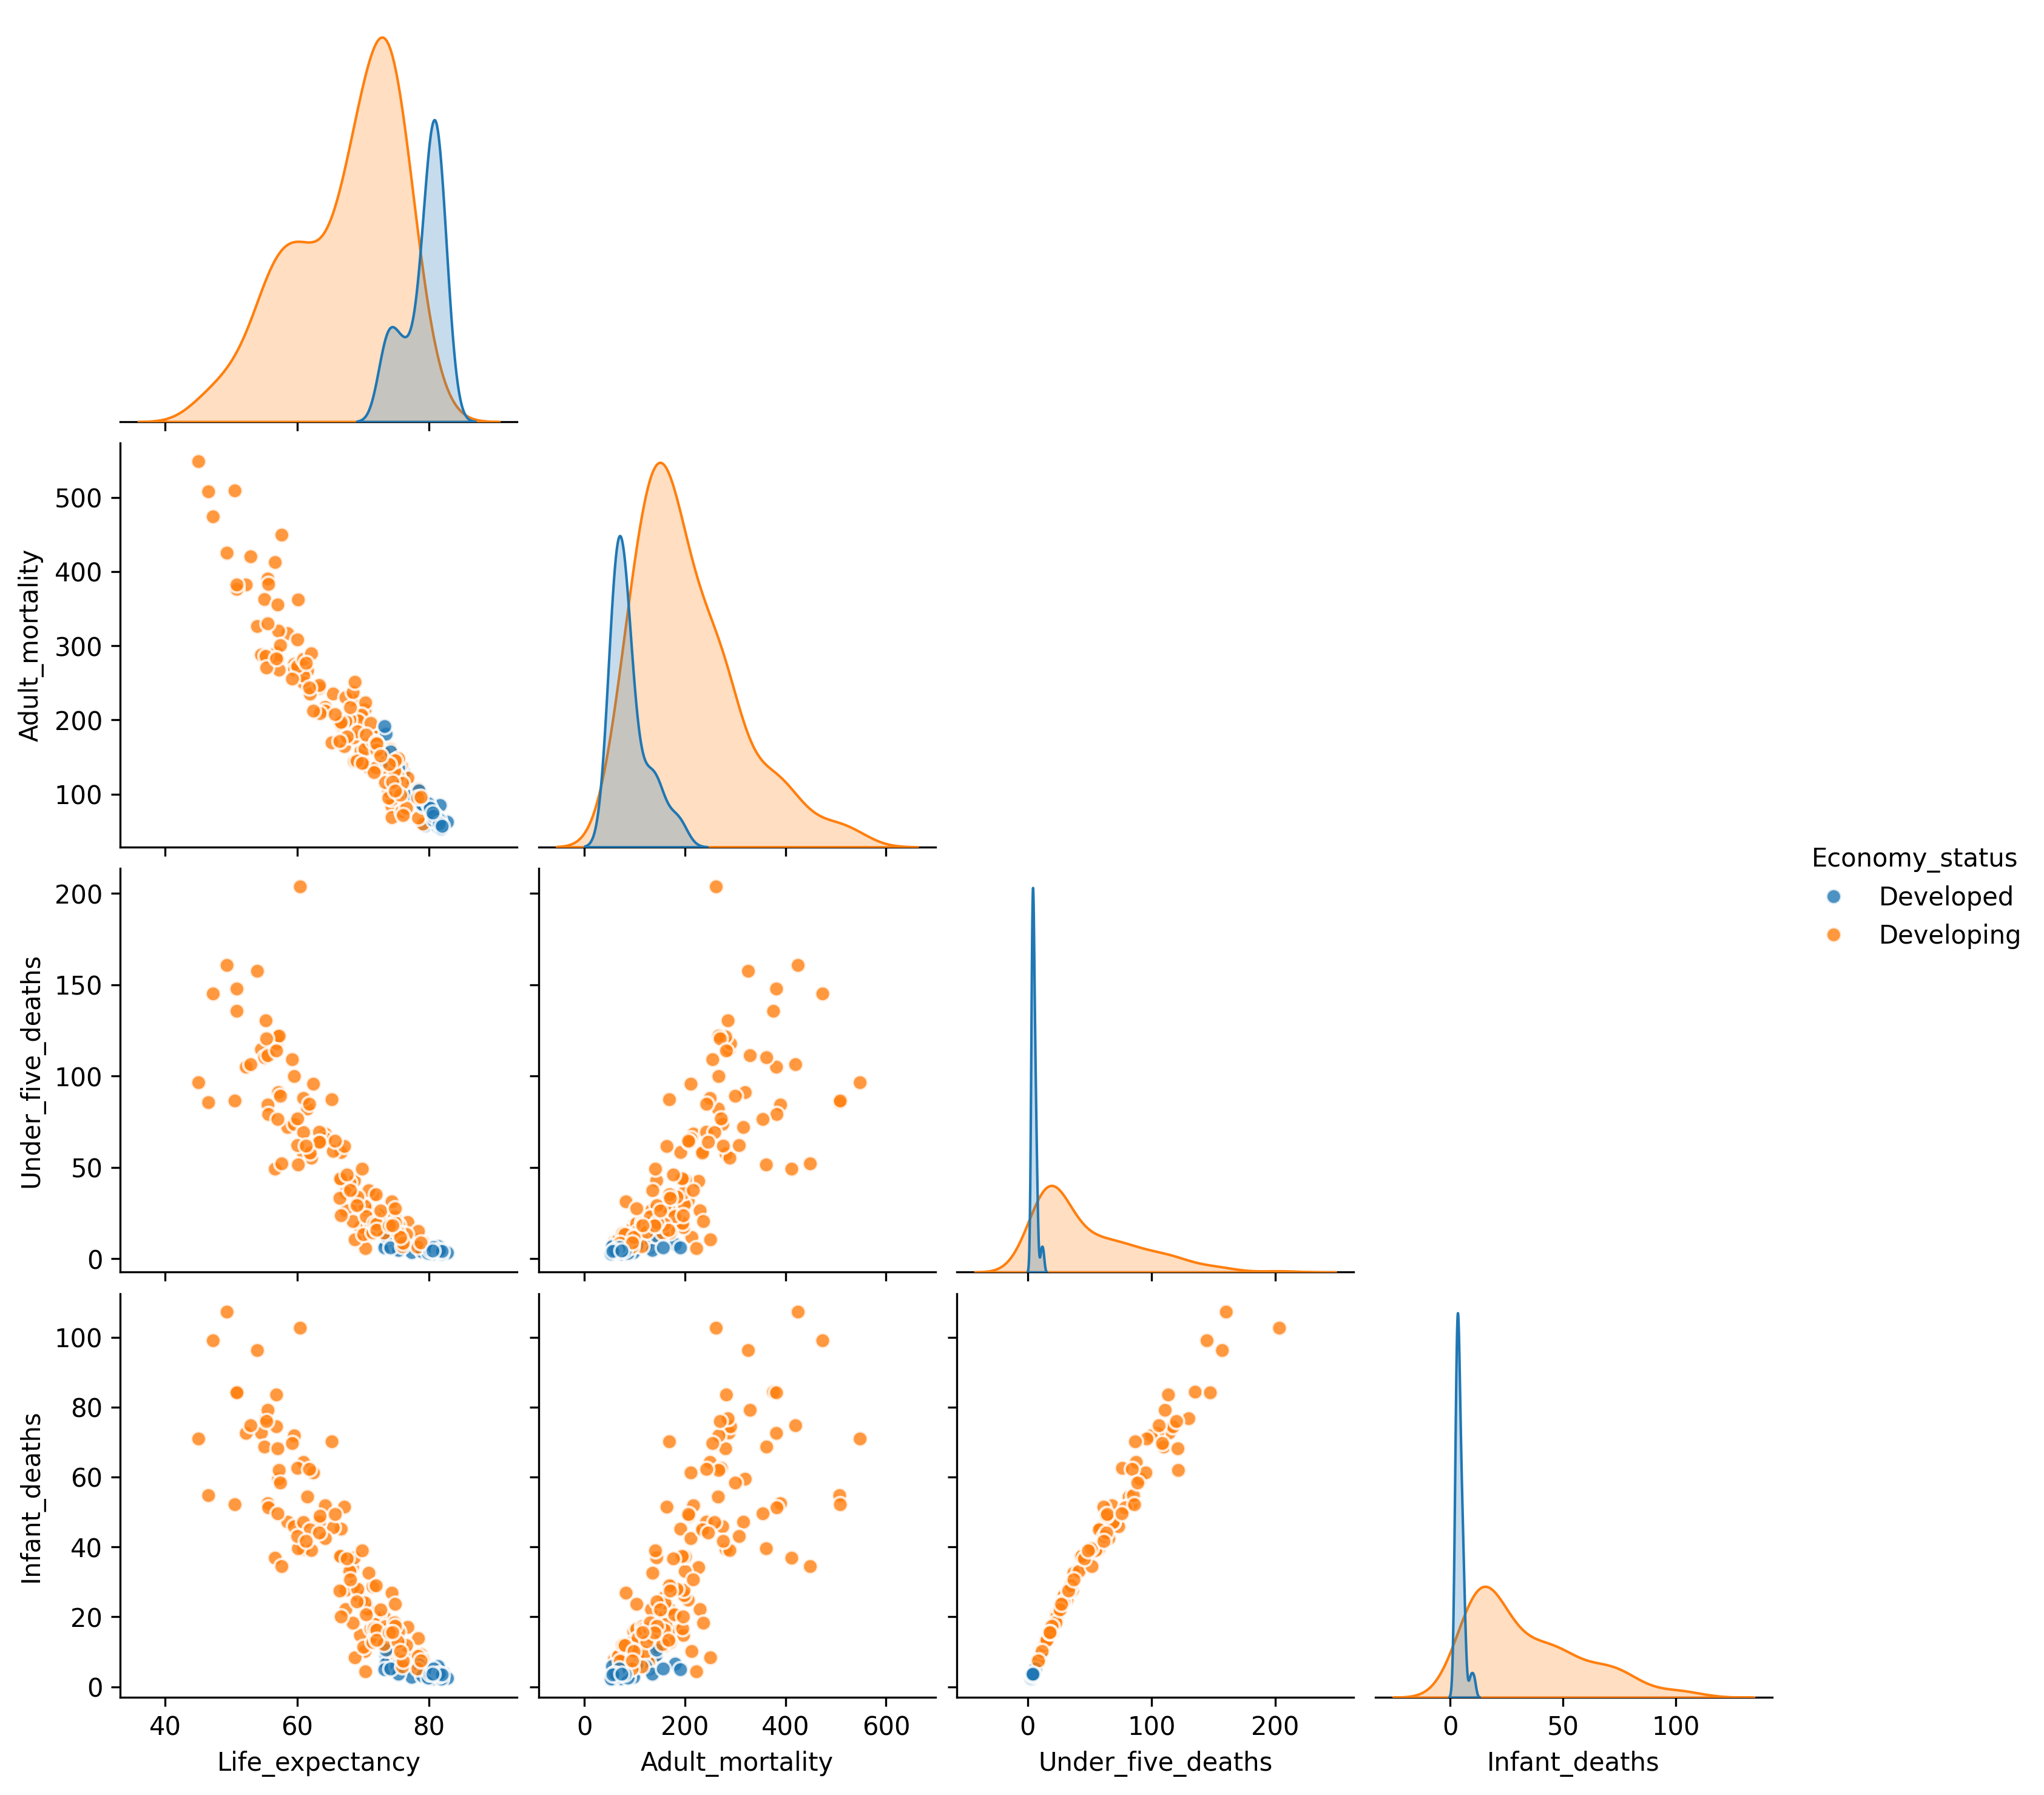

In [15]:
plt.figure(figsize=(6, 6))
selected_data = life_exp_adult_mort[['Life_expectancy', 'Adult_mortality',
                                     'Under_five_deaths', 'Infant_deaths',
                                     'Economy_status']]

sns.pairplot(selected_data,
            hue='Economy_status',
            plot_kws=dict(alpha=0.8, linewidth=1),
            corner=True)

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Correlograms

<img src="https://i.imgur.com/eqYkzAW.png" width=1024 />

<img src="https://i.imgur.com/HsuTdGc.png" width=1024 />








In [16]:
# Calculate correlation matrix
cols = ["Life_expectancy", "Adult_mortality", "Under_five_deaths", "Infant_deaths",
       "GDP_per_capita", "BMI", "Population_mln"]
cor_matrix = life_exp_adult_mort[cols].corr()

# Create a dictionary to map old column names to new labels
new_labels = {
    "Life_expectancy": "Life\nExp.",
    "Adult_mortality": "Adult\nMort.",
    "Under_five_deaths": "Under 5\nDeaths",
    "Infant_deaths": "Infant\nDeaths",
    "GDP_per_capita": "GDP",
    "BMI": "BMI",
    "Population_mln": "Pop.\n(mln)"
}

# Rename the columns in the correlation matrix for plotting
cor_matrix = cor_matrix.rename(columns=new_labels, index=new_labels)

np.round(cor_matrix, 2)

Life\nExp.  Adult\nMort.  Under 5\nDeaths  Infant\nDeaths  \
Life\nExp.             1.00         -0.95            -0.89           -0.91   
Adult\nMort.          -0.95          1.00             0.79            0.81   
Under 5\nDeaths       -0.89          0.79             1.00            0.99   
Infant\nDeaths        -0.91          0.81             0.99            1.00   
GDP                    0.60         -0.53            -0.47           -0.51   
BMI                    0.56         -0.50            -0.62           -0.62   
Pop.\n(mln)            0.02         -0.05            -0.01            0.01   

                  GDP   BMI  Pop.\n(mln)  
Life\nExp.       0.60  0.56         0.02  
Adult\nMort.    -0.53 -0.50        -0.05  
Under 5\nDeaths -0.47 -0.62        -0.01  
Infant\nDeaths  -0.51 -0.62         0.01  
GDP              1.00  0.32        -0.04  
BMI              0.32  1.00        -0.17  
Pop.\n(mln)     -0.04 -0.17         1.00

<img src="https://i.imgur.com/kU6vYDY.png" width=1024 />








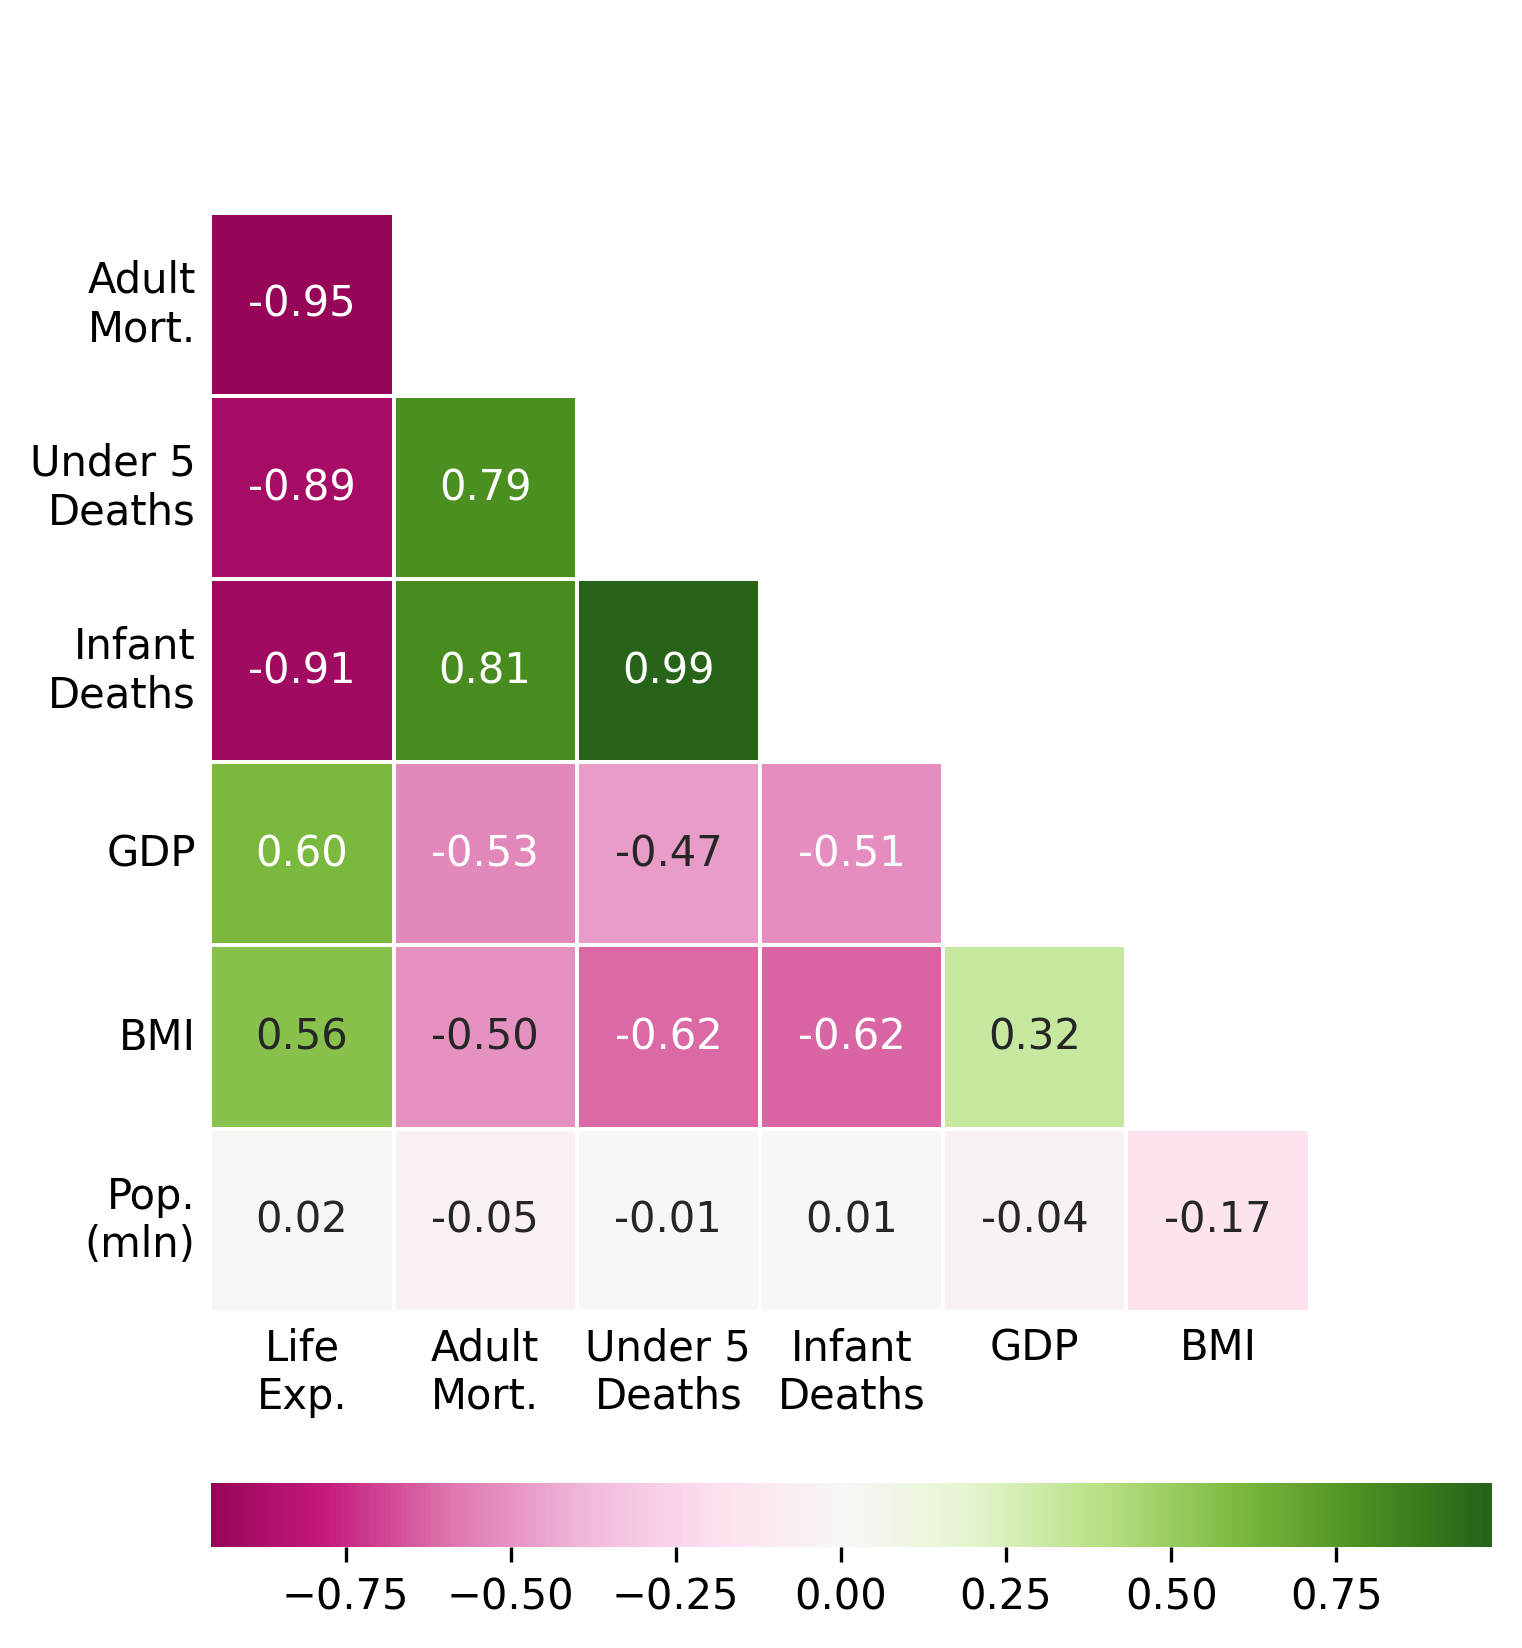

In [17]:
# Create heatmap with modified labels
plt.figure(figsize=(6, 6))

ax = sns.heatmap(cor_matrix,
                 mask=np.triu(np.ones_like(cor_matrix)),
                 cmap='PiYG',
                 annot=True,
                 fmt='.2f',
                 center=0,
                 linewidth=.5,
                 square=True,
                 cbar_kws={"orientation": "horizontal",
                           "pad": 0.1,
                           "shrink": 0.75})  # Adjust colorbar size if needed

# Remove the top-most y-axis label and the right-most x-axis label
ax.set_yticklabels([""] + list(cor_matrix.index)[1:], minor=False)  # Remove first y-axis label
ax.set_xticklabels(list(cor_matrix.columns)[:-1] + [""], minor=False)  # Remove last x-axis label
ax.tick_params(axis='both', length=0)

# Rotate the tick labels, set the limits
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Principal Component Analysis

<img src="https://i.imgur.com/uKrTUXb.png" width=1024 />








<img src="https://i.imgur.com/bJTUNmH.png" width=1024 />

<img src="https://i.imgur.com/uMQ18Cv.png" width=1024 />













In [18]:
life_exp_adult_mort.sample(0)

Empty DataFrame
Columns: [Country, Economy_status, Life_expectancy, Adult_mortality, Alcohol_consumption, Schooling, Under_five_deaths, Infant_deaths, GDP_per_capita, BMI, Population_mln, Region]
Index: []

In [19]:
# Compute PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Prepare data
X = life_exp_adult_mort[['Life_expectancy', 'Adult_mortality','Alcohol_consumption', 'Infant_deaths', 'Schooling', 'BMI']].reset_index(drop=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Create PCA scores dataframe
pca_scores = pd.DataFrame(np.round(pca_result, 3),
                        columns=[f'PC{i+1}' for i in range(X.shape[1])])
pca_scores['Economy_status'] = life_exp_adult_mort['Economy_status'].copy()
pca_scores['Country'] = life_exp_adult_mort['Country'].copy()
pca_scores['Region'] = life_exp_adult_mort['Region'].copy()

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

print('\nExplained variance ratios:')
pd.DataFrame([{f"PC{i+1}": val for i, val in enumerate(np.round(explained_variance_ratio, 3))}])


Explained variance ratios:


PC1    PC2  PC3    PC4    PC5    PC6
0  0.692  0.149  0.1  0.035  0.021  0.003

In [20]:
pca_scores

PC1    PC2    PC3    PC4    PC5    PC6 Economy_status  \
0   -2.705  0.697 -0.969  0.316  0.485  0.086      Developed   
1   -2.894  1.164 -0.416  0.143  0.434 -0.024      Developed   
2   -1.331  0.355  1.183 -0.022  0.007  0.069     Developing   
3   -2.473  0.030 -0.569  0.331  0.330  0.068      Developed   
4   -0.961 -1.495  0.246  0.451 -0.062 -0.164     Developing   
..     ...    ...    ...    ...    ...    ...            ...   
174 -2.556  1.093 -0.914 -0.237  0.151  0.035      Developed   
175  3.115  0.734 -0.616 -0.065  0.977 -0.075     Developing   
176  0.109  0.354  0.370 -0.045 -0.026  0.054     Developing   
177  0.946  1.412  0.193 -0.187 -0.050 -0.172     Developing   
178  4.955  1.181  0.696  0.191  0.473  0.267     Developing   

                      Country    Region  
0                 Switzerland    Europe  
1                     Germany    Europe  
2                      Belize  Americas  
3                      Sweden    Europe  
4           Brunei Darussalam      Asia  
..                        ...       ...  
174                   Austria    Europe  
175          Congo, Dem. Rep.    Africa  
176                    Guyana  Americas  
177                     Gabon    Africa  
178  Central African Republic    Africa  

[179 rows x 9 columns]

In [21]:
# Get loadings (components)
loadings = pd.DataFrame(
   pca.components_.T[:, :2],
   columns=['PC1', 'PC2'],
   index=X.columns
).reset_index()
loadings.columns = ['Variable', 'PC1', 'PC2']

loadings

Variable       PC1       PC2
0      Life_expectancy -0.463033 -0.239553
1      Adult_mortality  0.420870  0.416431
2  Alcohol_consumption -0.287490  0.809915
3        Infant_deaths  0.463165  0.097628
4            Schooling -0.432819  0.306951
5                  BMI -0.352086 -0.097405

<img src="https://i.imgur.com/5Hkp0MO.png" width=1024 />













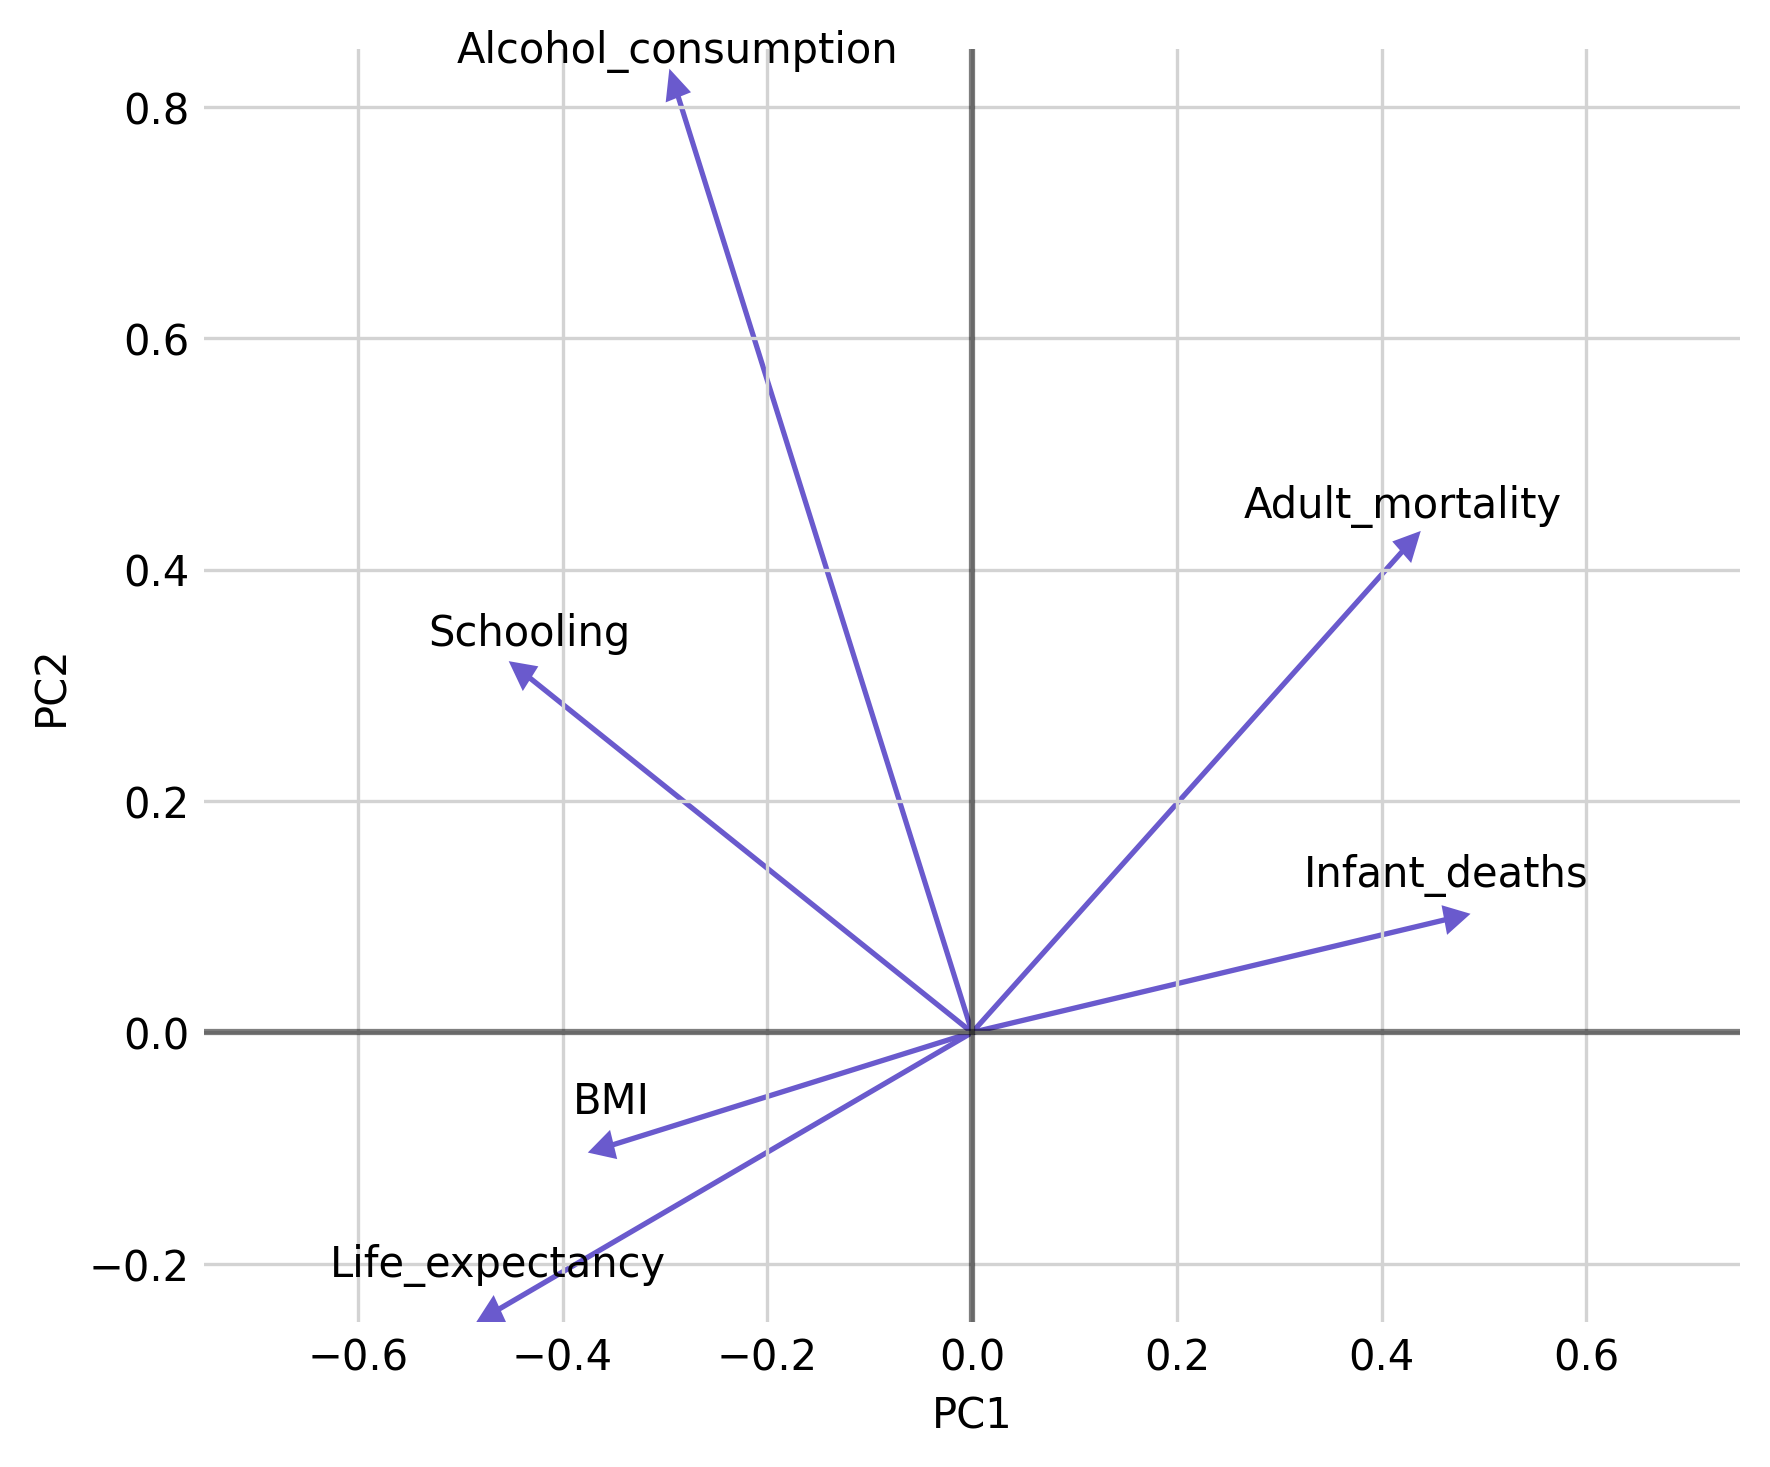

In [22]:
plt.figure(figsize=(6, 5))

# Plot arrows and labels
for idx, row in loadings.iterrows():
   plt.arrow(0, 0, row['PC1'], row['PC2'],
             head_width=0.02,
             head_length=0.02,
             fc='slateblue',
             ec='slateblue')
   plt.text(row['PC1'], row['PC2']+0.02, row['Variable'],
            ha='center', va='bottom', size=10)

plt.xlim(-0.75, 0.75)
plt.ylim(-0.25, 0.85)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()


<img src="https://i.imgur.com/Pf4rm8W.png" width=1024 />













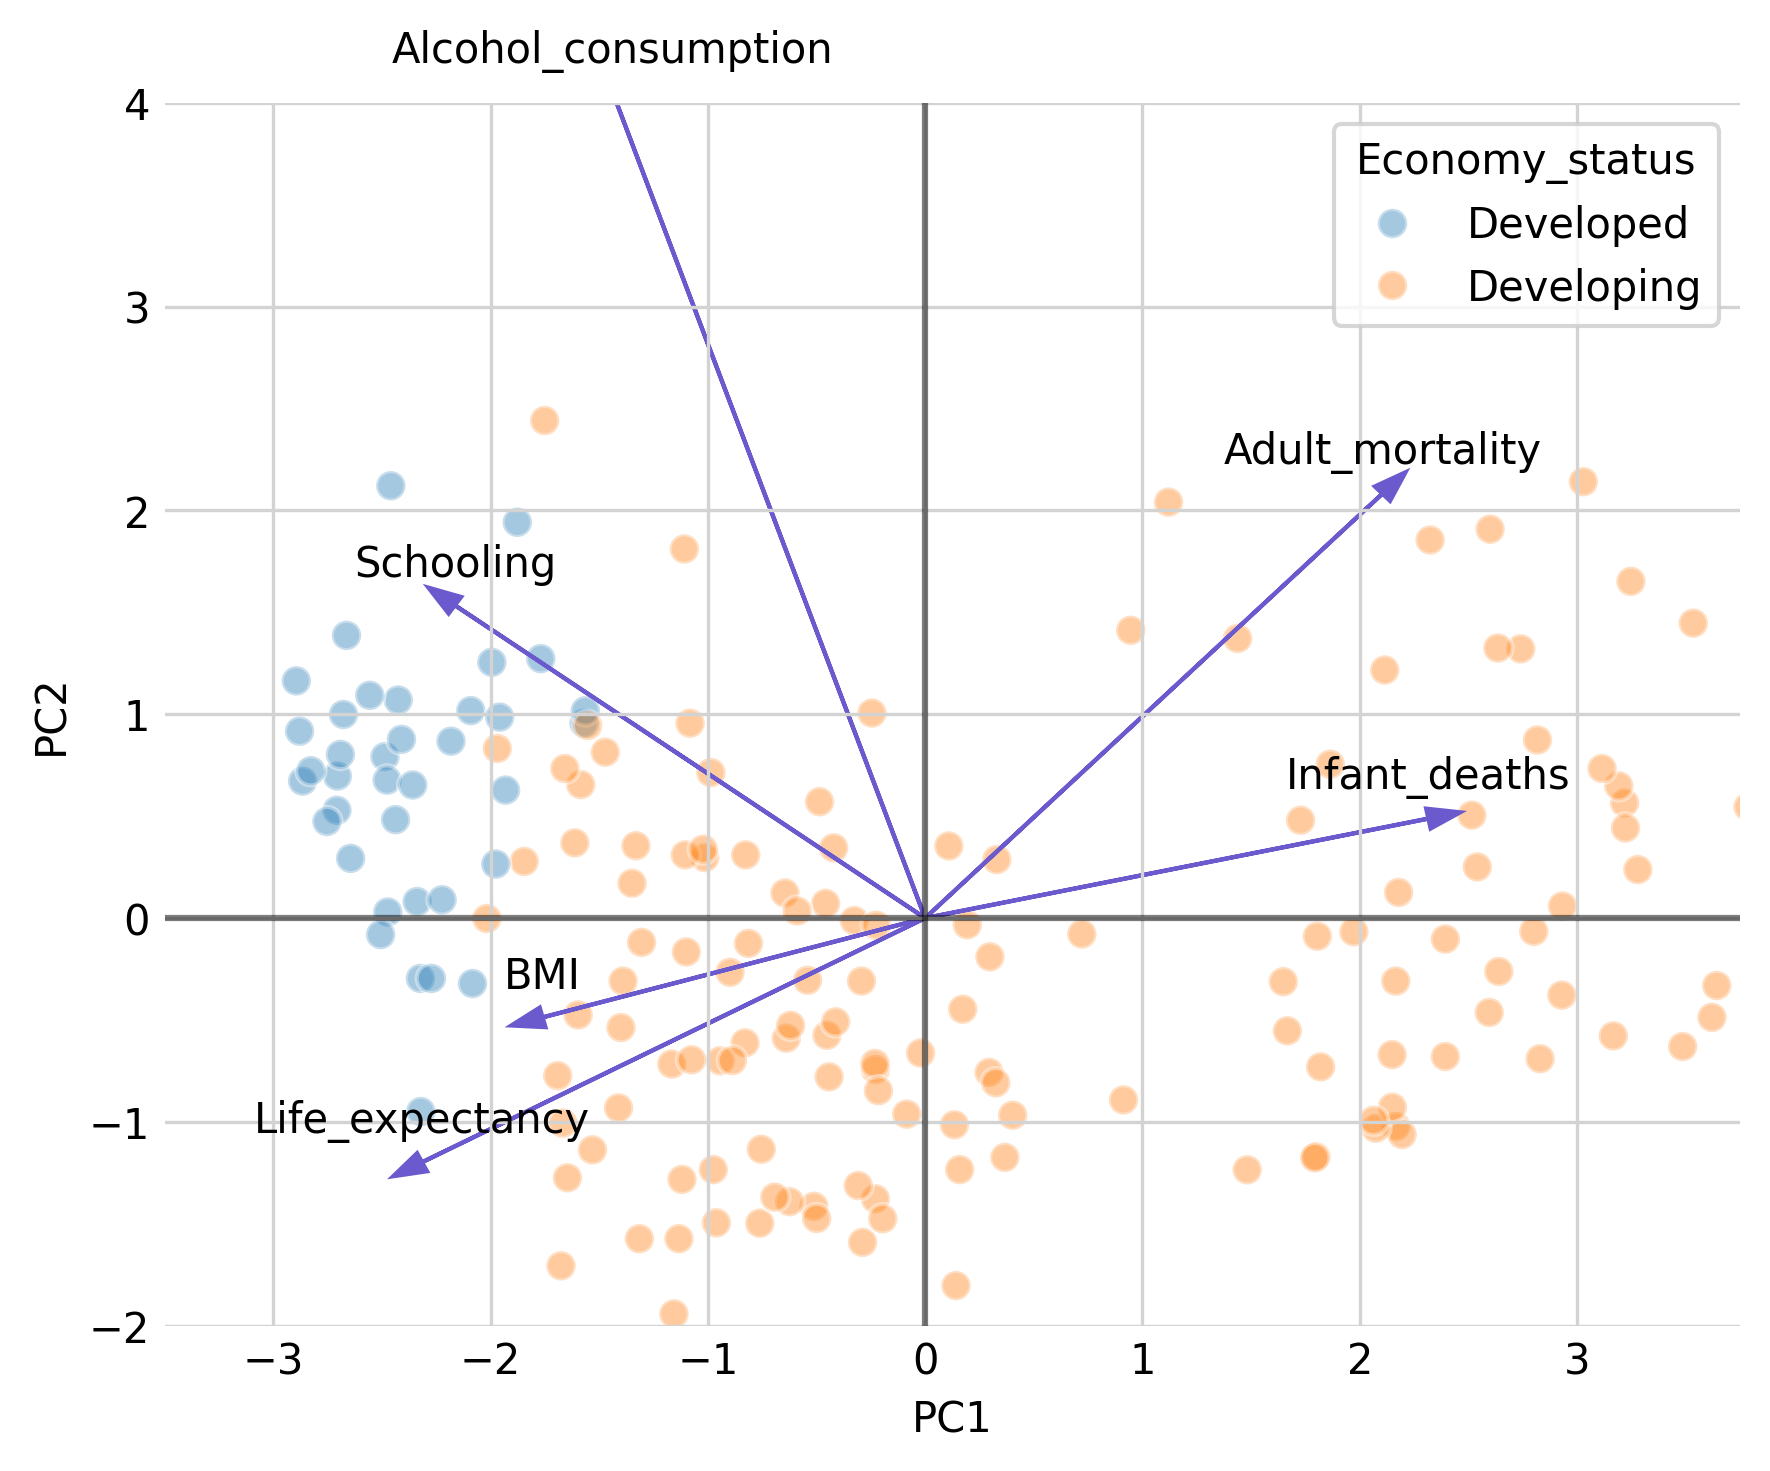

In [23]:
plt.figure(figsize=(6, 5))

# Create scatterplot using seaborn
sns.scatterplot(
    data=pca_scores,
    x='PC1',
    y='PC2',
    hue='Economy_status',  # Color points by 'Economy_status'
    s=50,
    edgecolor='white',
    linewidth=1,
    alpha=0.4
)

# Plot arrows and labels
for idx, row in loadings.iterrows():
   plt.arrow(0, 0, row['PC1']*5, row['PC2']*5,
             head_width=0.1,
             fc='slateblue',
             ec='slateblue')
   plt.text(row['PC1']*5, row['PC2']*5+0.1, row['Variable'],
            ha='center', va='bottom', size=10)


plt.xlim(-3.5, 3.75)
plt.ylim(-2, 4)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/yRNBXwO.png" width=1024 />













<Figure size 1425x1050 with 0 Axes>

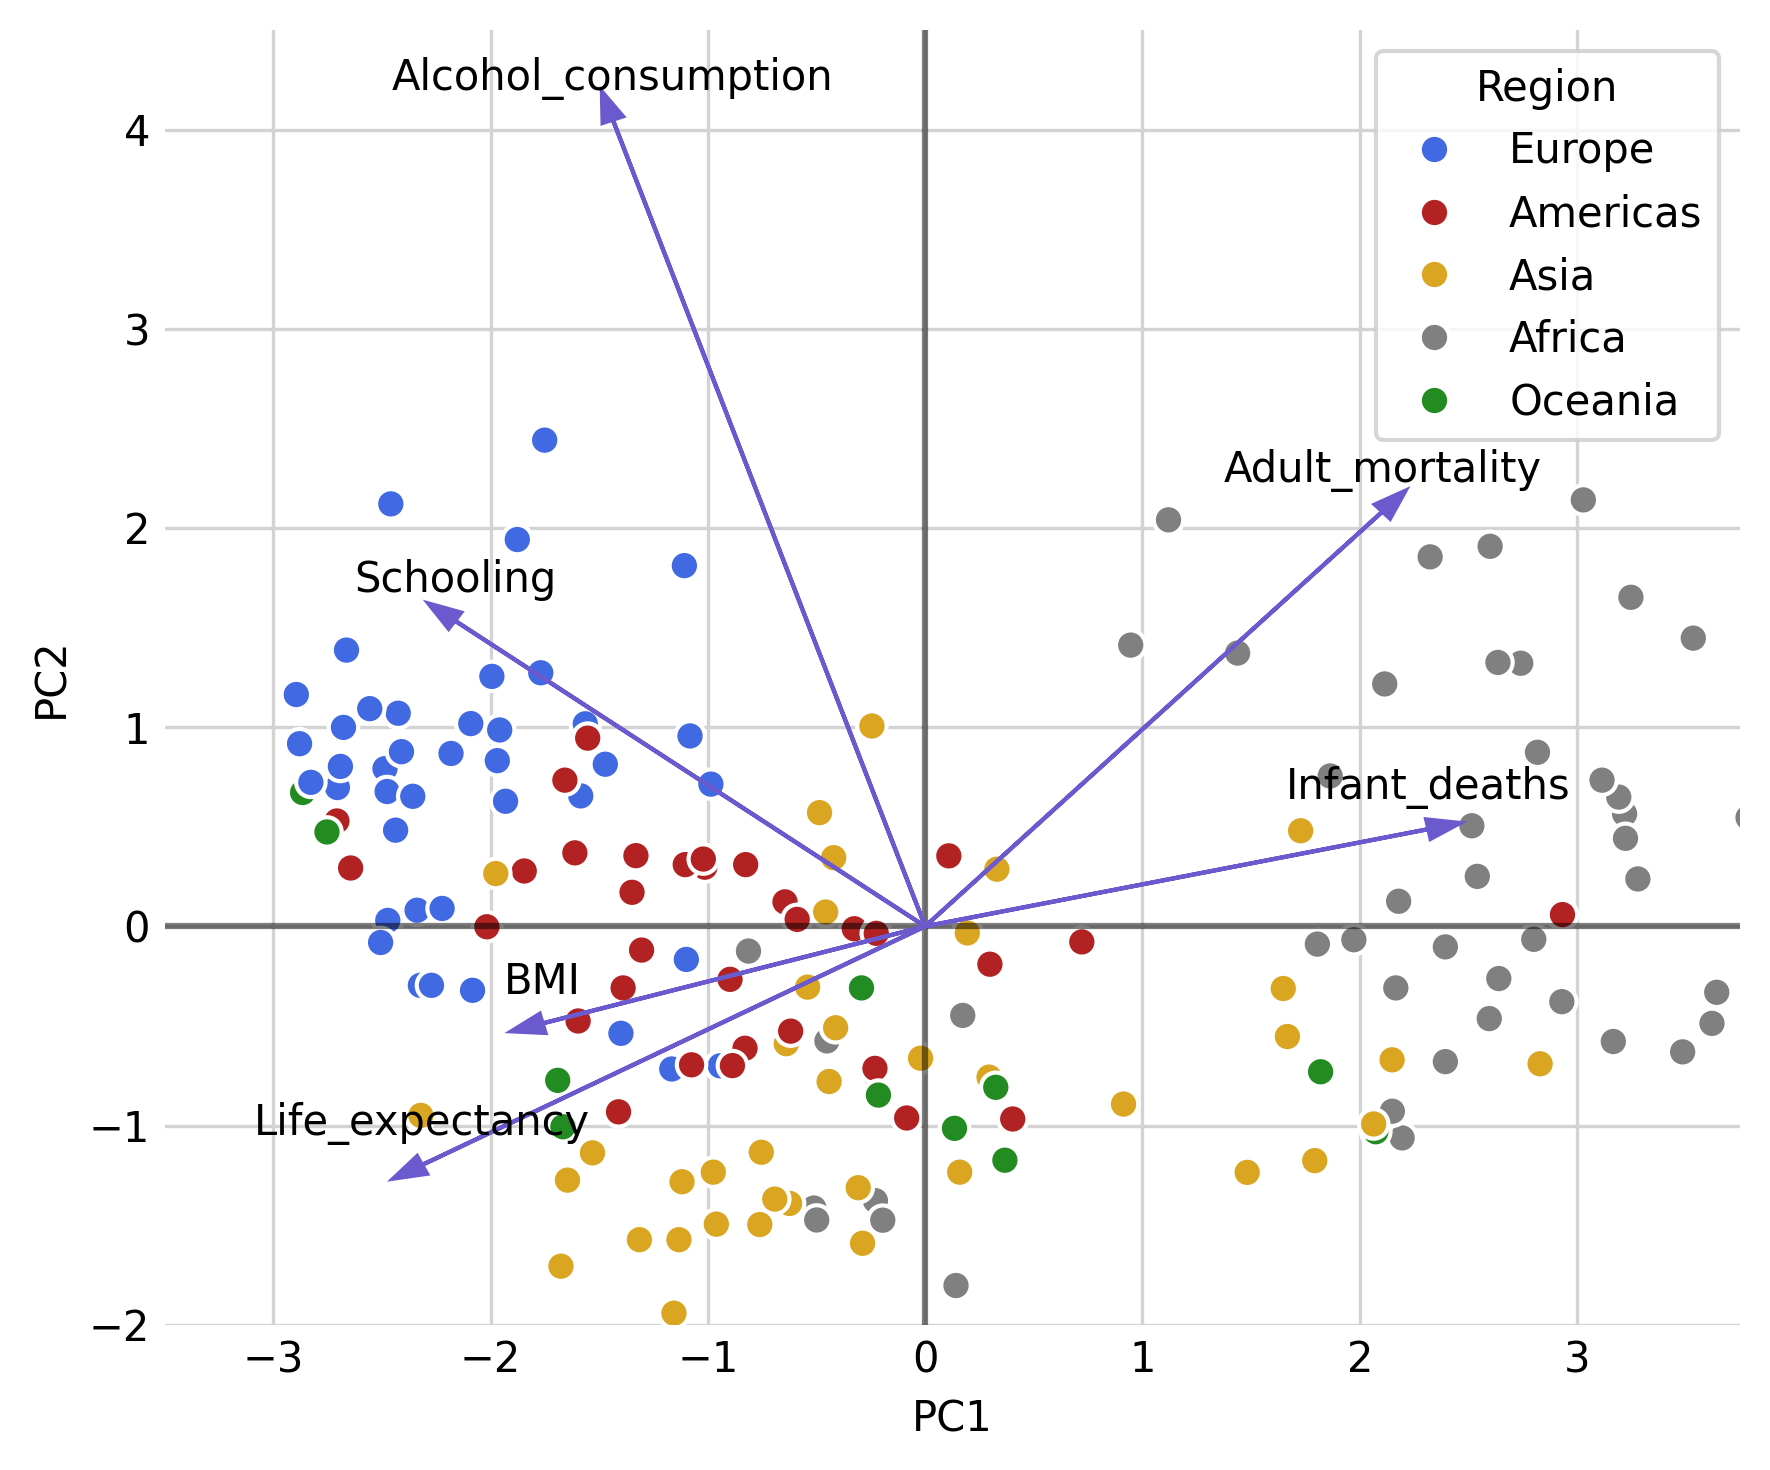

In [24]:
plt.figure(figsize=(4.75, 3.5))

region_colors = {
   'Europe': 'royalblue',
   'Asia': 'goldenrod',
   'Africa': 'gray',
   'Americas': 'firebrick',
   'Oceania': 'forestgreen'
}

plt.figure(figsize=(6, 5))

# Create scatterplot using seaborn
sns.scatterplot(
    data=pca_scores,
    x='PC1',
    y='PC2',
    hue='Region',  # Color points by 'Region'
    palette=region_colors,
    s=50,
    edgecolor='white',
    linewidth=1,
    zorder=2
)

# Plot arrows and labels
for idx, row in loadings.iterrows():
   plt.arrow(0, 0, row['PC1']*5, row['PC2']*5,
             head_width=0.1,
             fc='slateblue',
             ec='slateblue',
             zorder=3)
   plt.text(row['PC1']*5, row['PC2']*5+0.1, row['Variable'],
            ha='center', va='bottom', size=10)


plt.xlim(-3.5, 3.75)
plt.ylim(-2, 4.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 4.2 ᆢ</strong></font>ᆢᆢ
**Issue: How does illness-related variables relate to each other?**

Make a correlograms to see how illness-related variables relate to each other. Also, make a PCA 1 and PCA 2 scatterplot, colored by `Economy_status`.


In [25]:
# Define illness variables
illness_variables = ['Hepatitis_B', 'Measles',
                    'Polio', 'Diphtheria', 'Incidents_HIV', 'BMI',
                    'Thinness_ten_nineteen_years', 'Thinness_five_nine_years']

# Create illness_data DataFrame
illness_data = life_expectancy[
    life_expectancy['Year'] == 2000
].reset_index(drop=True).copy()  # Create a copy to avoid SettingWithCopyWarning

# Create Economy_status column based on Economy_status_Developed
illness_data['Economy_status'] = illness_data['Economy_status_Developed'].map({1: 'Developed', 0: 'Developing'})

# Select required columns
illness_data = illness_data[['Country', 'Economy_status'] + illness_variables]

# Print the DataFrame
illness_data

Country Economy_status  Hepatitis_B  Measles  Polio  Diphtheria  \
0             Hungary      Developed           88       99     99          99   
1         Afghanistan     Developing           62       12     24          24   
2     Solomon Islands     Developing           81       65     88          86   
3    Congo, Dem. Rep.     Developing           69       64     42          40   
4            Honduras     Developing           93       83     88          94   
..                ...            ...          ...      ...    ...         ...   
174           Myanmar     Developing           74       63     88          82   
175         Argentina     Developing           73       56     88          83   
176           Lao PDR     Developing           48       65     57          51   
177           Belarus     Developing           70       92     99          99   
178             Niger     Developing           72       64     41          34   

     Incidents_HIV   BMI  Thinness_ten_nineteen_years  \
0             0.08  25.9                          2.3   
1             0.02  21.7                          2.3   
2             0.17  24.9                          1.4   
3             1.07  20.7                         12.4   
4             0.53  24.8                          2.8   
..             ...   ...                          ...   
174           0.54  21.3                         13.3   
175           0.16  26.1                          1.2   
176           0.10  21.1                          1.5   
177           0.05  25.7                          2.7   
178           0.49  20.8                         12.8   

     Thinness_five_nine_years  
0                         2.3  
1                         2.5  
2                         1.4  
3                        12.3  
4                         2.7  
..                        ...  
174                      13.7  
175                       1.1  
176                       1.5  
177                       2.8  
178                      12.9  

[179 rows x 10 columns]

In [26]:
# Calculate correlation matrix
illness_cor_matrix = illness_data[illness_variables].corr()

# Print rounded correlation matrix
round(illness_cor_matrix, 2)

Hepatitis_B  Measles  Polio  Diphtheria  \
Hepatitis_B                         1.00     0.33   0.50        0.51   
Measles                             0.33     1.00   0.52        0.49   
Polio                               0.50     0.52   1.00        0.98   
Diphtheria                          0.51     0.49   0.98        1.00   
Incidents_HIV                      -0.03    -0.13  -0.15       -0.14   
BMI                                 0.35     0.38   0.59        0.60   
Thinness_ten_nineteen_years        -0.15    -0.30  -0.32       -0.32   
Thinness_five_nine_years           -0.16    -0.33  -0.29       -0.29   

                             Incidents_HIV   BMI  Thinness_ten_nineteen_years  \
Hepatitis_B                          -0.03  0.35                        -0.15   
Measles                              -0.13  0.38                        -0.30   
Polio                                -0.15  0.59                        -0.32   
Diphtheria                           -0.14  0.60                        -0.32   
Incidents_HIV                         1.00 -0.19                         0.32   
BMI                                  -0.19  1.00                        -0.56   
Thinness_ten_nineteen_years           0.32 -0.56                         1.00   
Thinness_five_nine_years              0.31 -0.57                         0.94   

                             Thinness_five_nine_years  
Hepatitis_B                                     -0.16  
Measles                                         -0.33  
Polio                                           -0.29  
Diphtheria                                      -0.29  
Incidents_HIV                                    0.31  
BMI                                             -0.57  
Thinness_ten_nineteen_years                      0.94  
Thinness_five_nine_years                         1.00

Correlogram:

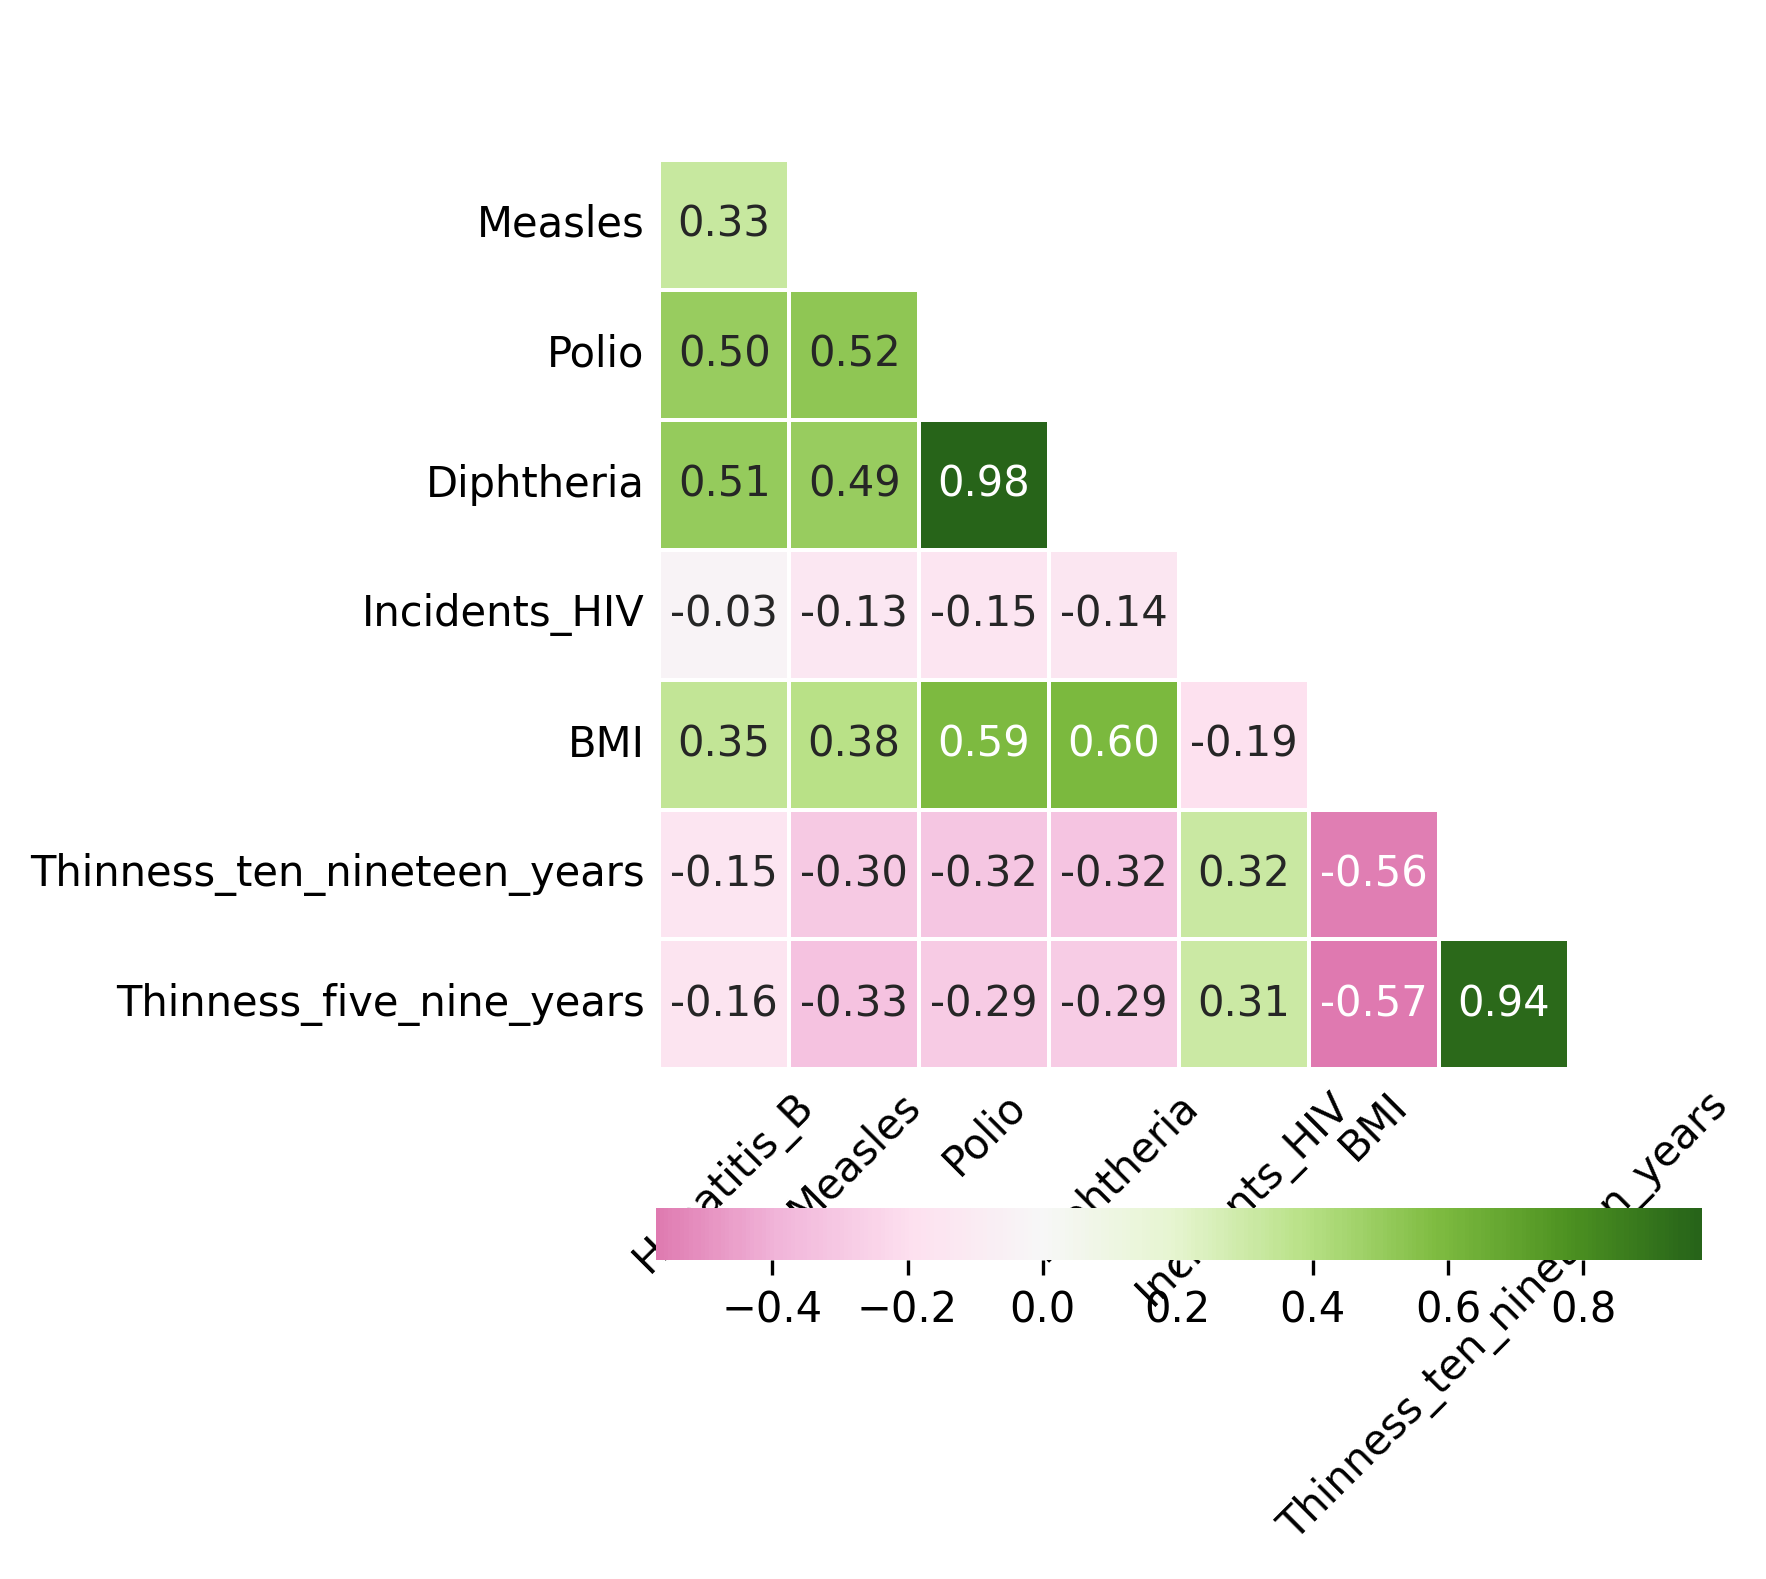

In [27]:
# Create heatmap with modified labels
plt.figure(figsize=(6, 6))

ax = sns.heatmap(illness_cor_matrix,
                 mask=np.triu(np.ones_like(illness_cor_matrix)),
                 cmap='PiYG',
                 annot=True,
                 fmt='.2f',
                 center=0,
                 linewidth=.5,
                 square=True,
                 cbar_kws={"orientation": "horizontal",
                           "pad": 0.1,
                           "shrink": 0.75})  # Adjust colorbar size if needed

# Remove the top-most y-axis label and the right-most x-axis label
ax.set_yticklabels([""] + list(illness_cor_matrix.index)[1:], minor=False)  # Remove first y-axis label
ax.set_xticklabels(list(illness_cor_matrix.columns)[:-1] + [""], minor=False)  # Remove last x-axis label
ax.tick_params(axis='both', length=0)

# Rotate the tick labels, set the limits
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# plt.tight_layout()
plt.show()

PCA Plot

In [28]:
# Prepare data for PCA (excluding non-numeric columns)
pca_data = illness_data.drop(['Country', 'Economy_status'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Compute PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame with PCA scores
pca_scores = pd.DataFrame(
    np.round(pca_result, 3),
    columns=[f'PC{i+1}' for i in range(len(illness_variables))]
)

# Add Economy_status and Country back to the DataFrame
pca_scores['Economy_status'] = illness_data['Economy_status']
pca_scores['Country'] = illness_data['Country']

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print results
print("\nFirst 12 rows of PCA scores:")
pca_scores.head(12)


First 12 rows of PCA scores:


PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8 Economy_status  \
0   2.089  0.232 -0.154  0.562  0.190  0.001  0.022  0.023      Developed   
1  -3.941 -3.545  0.405 -1.975  0.535 -0.108  0.045 -0.008     Developing   
2   0.810 -0.751  0.065 -0.609 -0.211 -0.403 -0.040 -0.081     Developing   
3  -3.909 -0.204 -0.608  0.268  1.091  0.405 -0.003 -0.008     Developing   
4   1.236  0.082 -0.019 -0.156  0.454 -0.270  0.007  0.233     Developing   
5  -2.131  0.388  0.124 -0.192  0.655 -0.105 -0.031  0.065     Developing   
6   1.767 -0.634  0.244 -0.225  0.658  0.245  0.073  0.005      Developed   
7   1.182 -0.378  0.042  0.007  0.491  0.310  0.068  0.313     Developing   
8  -1.885  1.123  1.994  0.079  0.144 -0.867 -0.062  0.084     Developing   
9  -2.043  2.213  2.731  0.113 -0.389 -0.163 -0.015 -0.011     Developing   
10 -0.279  1.052 -0.923  1.373 -0.312 -0.063 -0.073  0.063     Developing   
11  1.726  0.385 -0.280  0.447  0.899 -0.943 -0.029  0.033     Developing   

             Country  
0            Hungary  
1        Afghanistan  
2    Solomon Islands  
3   Congo, Dem. Rep.  
4           Honduras  
5               Togo  
6            Ireland  
7         Costa Rica  
8             Malawi  
9           Zimbabwe  
10        Cabo Verde  
11         Singapore

In [29]:
print("\nProportion of variance explained:")
pd.DataFrame(explained_variance_ratio, index=[f'PC{i+1}' for i in range(len(illness_variables))]).T


Proportion of variance explained:


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.48089  0.199017  0.105404  0.081813  0.077022  0.046008  0.007023   

        PC8  
0  0.002823

In [30]:
# Extract loadings (components) from PCA
loadings = pca.components_.T  # Transpose to match R's format

# Create DataFrame with loadings for first two components
loadings_df = pd.DataFrame(
    loadings[:, :2],  # Select first two columns
    columns=['PC1', 'PC2'],  # Name the columns
    index=illness_variables  # Use original variable names as index
)

# Reset index to make variable names a column
loadings_df = loadings_df.reset_index().rename(columns={'index': 'Variable'})

# Print the loadings
print("\nPCA Loadings (first two components):")
loadings_df


PCA Loadings (first two components):


Variable       PC1       PC2
0                  Hepatitis_B  0.278588  0.354447
1                      Measles  0.325983  0.148104
2                        Polio  0.425244  0.345123
3                   Diphtheria  0.423452  0.346385
4                Incidents_HIV -0.167590  0.327647
5                          BMI  0.410133 -0.059351
6  Thinness_ten_nineteen_years -0.361547  0.498726
7     Thinness_five_nine_years -0.359121  0.503723

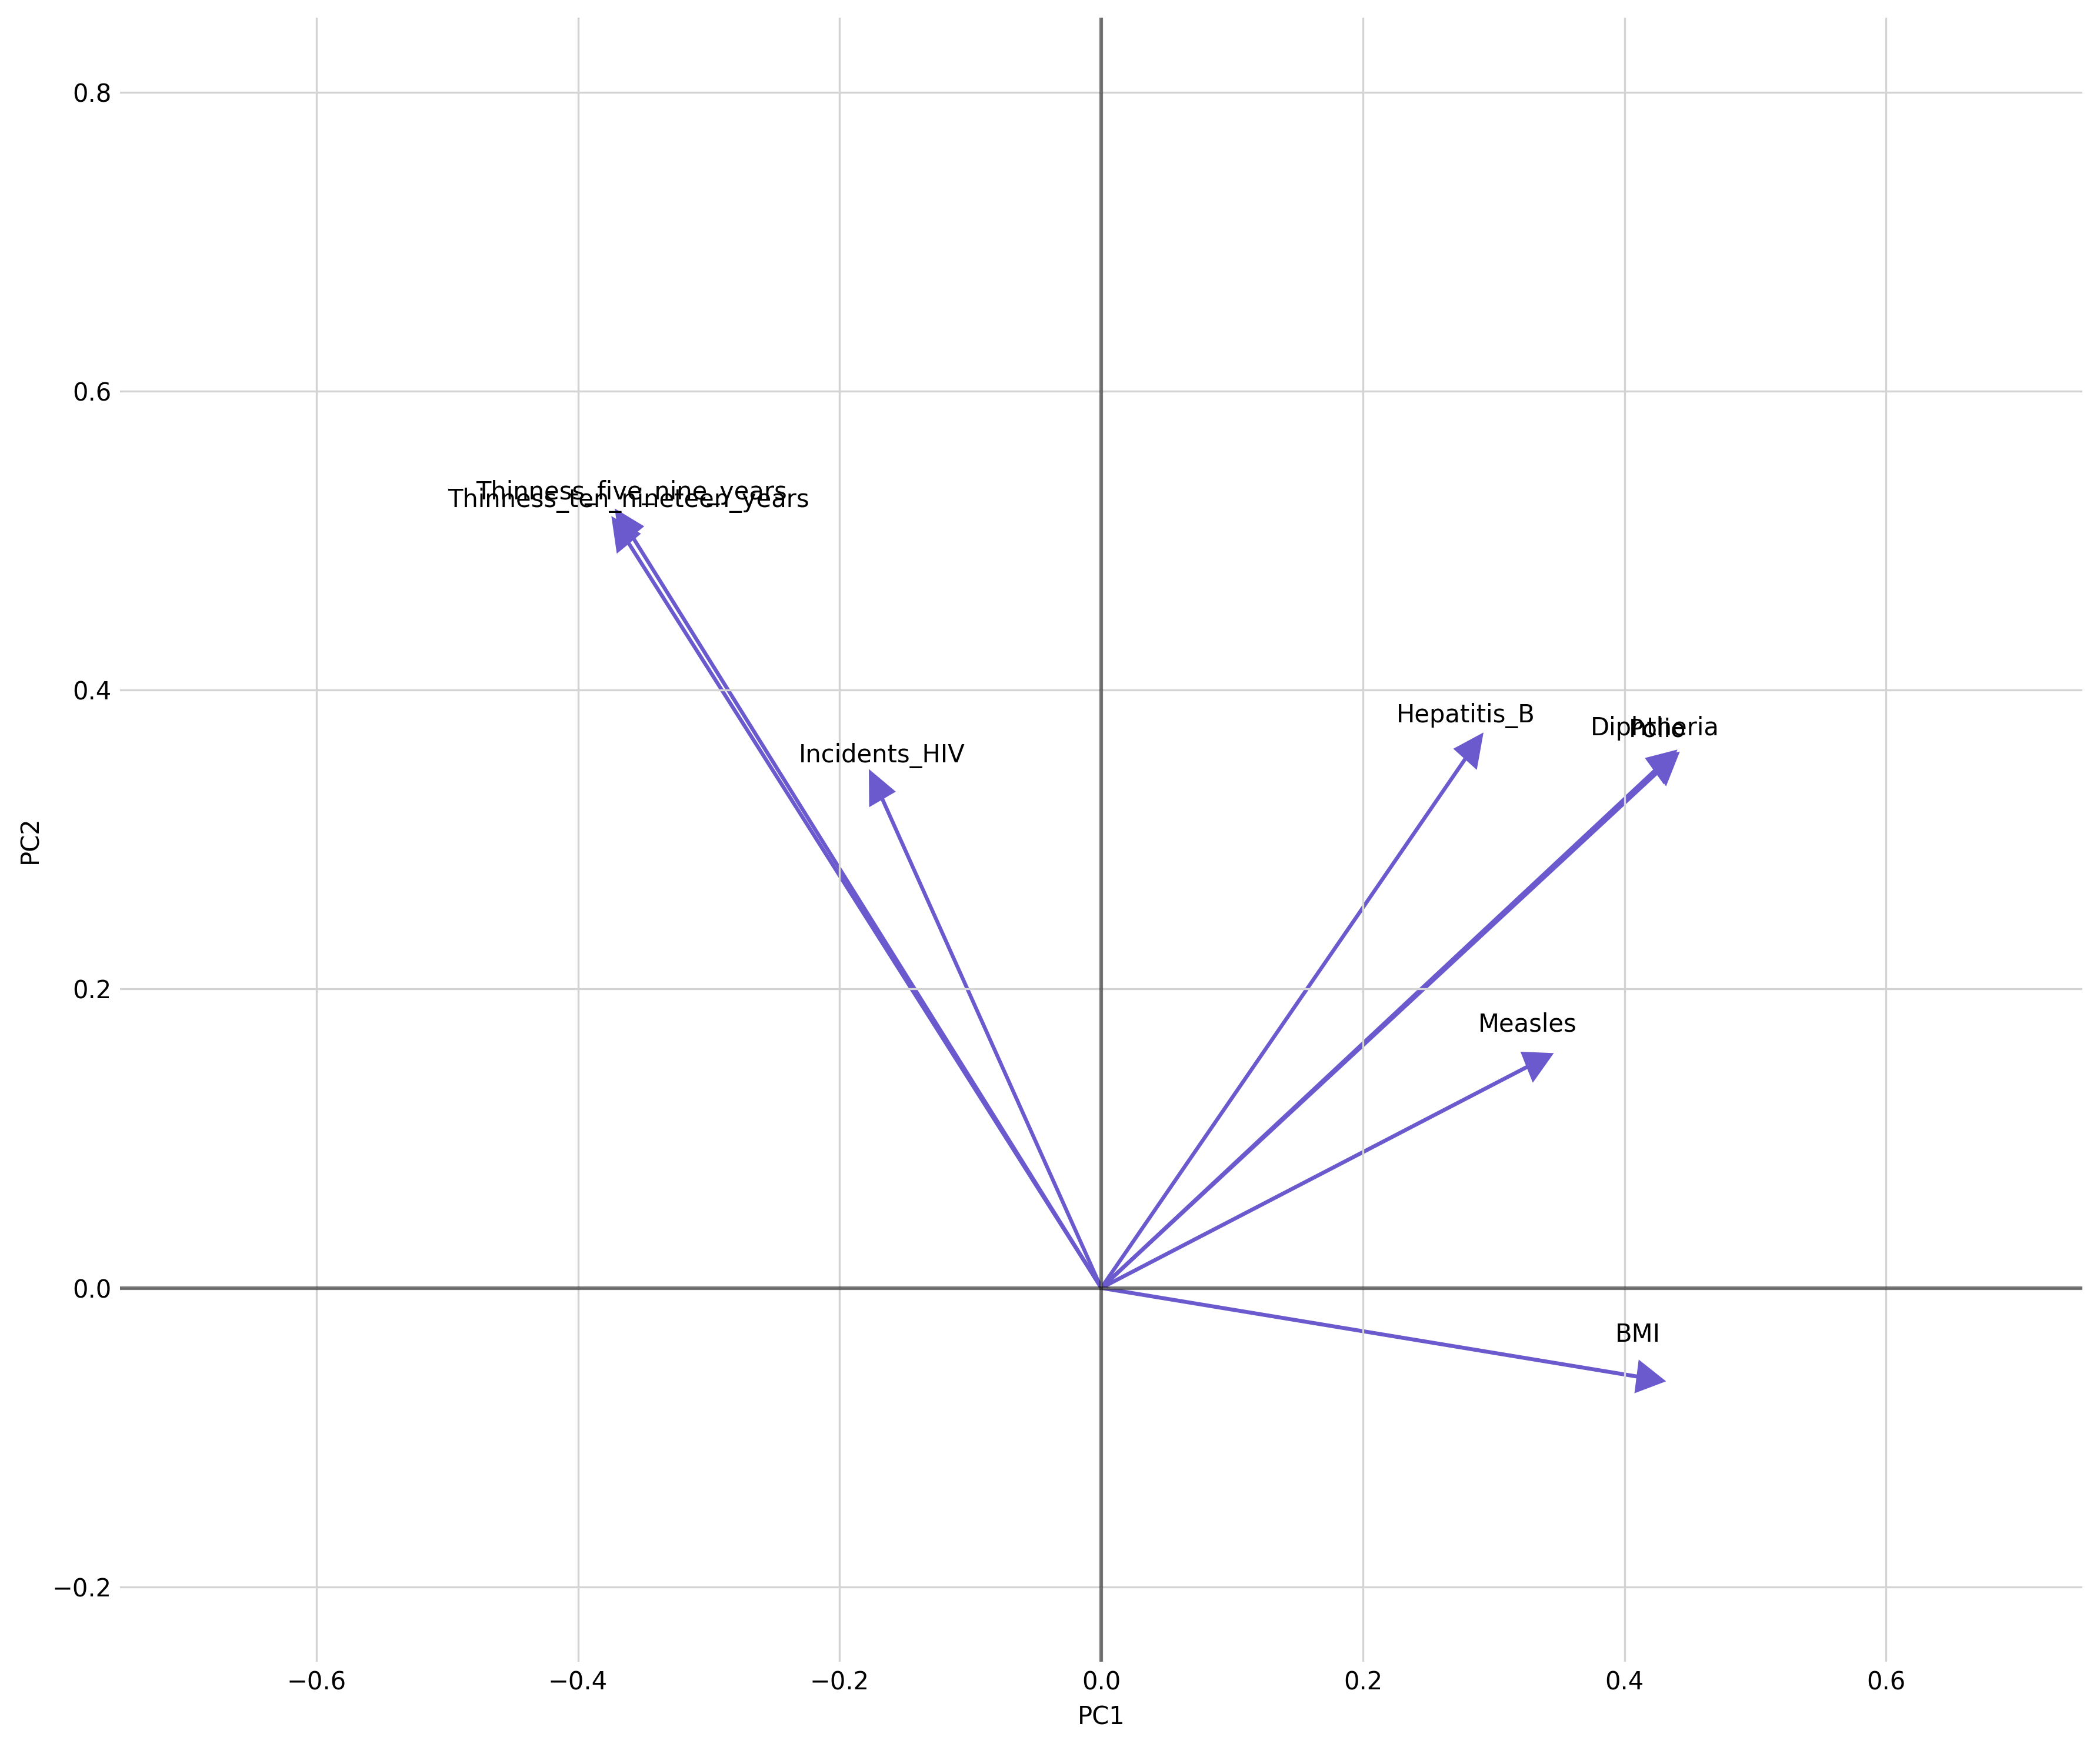

In [31]:
# Create a loading matrix plot
plt.figure(figsize=(12, 10))

# Plot arrows and labels
for idx, row in loadings_df.iterrows():
   plt.arrow(0, 0, row['PC1'], row['PC2'],
             head_width=0.02,
             head_length=0.02,
             fc='slateblue',
             ec='slateblue')
   plt.text(row['PC1'], row['PC2']+0.02, row['Variable'],
            ha='center', va='bottom', size=10)

plt.xlim(-0.75, 0.75)
plt.ylim(-0.25, 0.85)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()


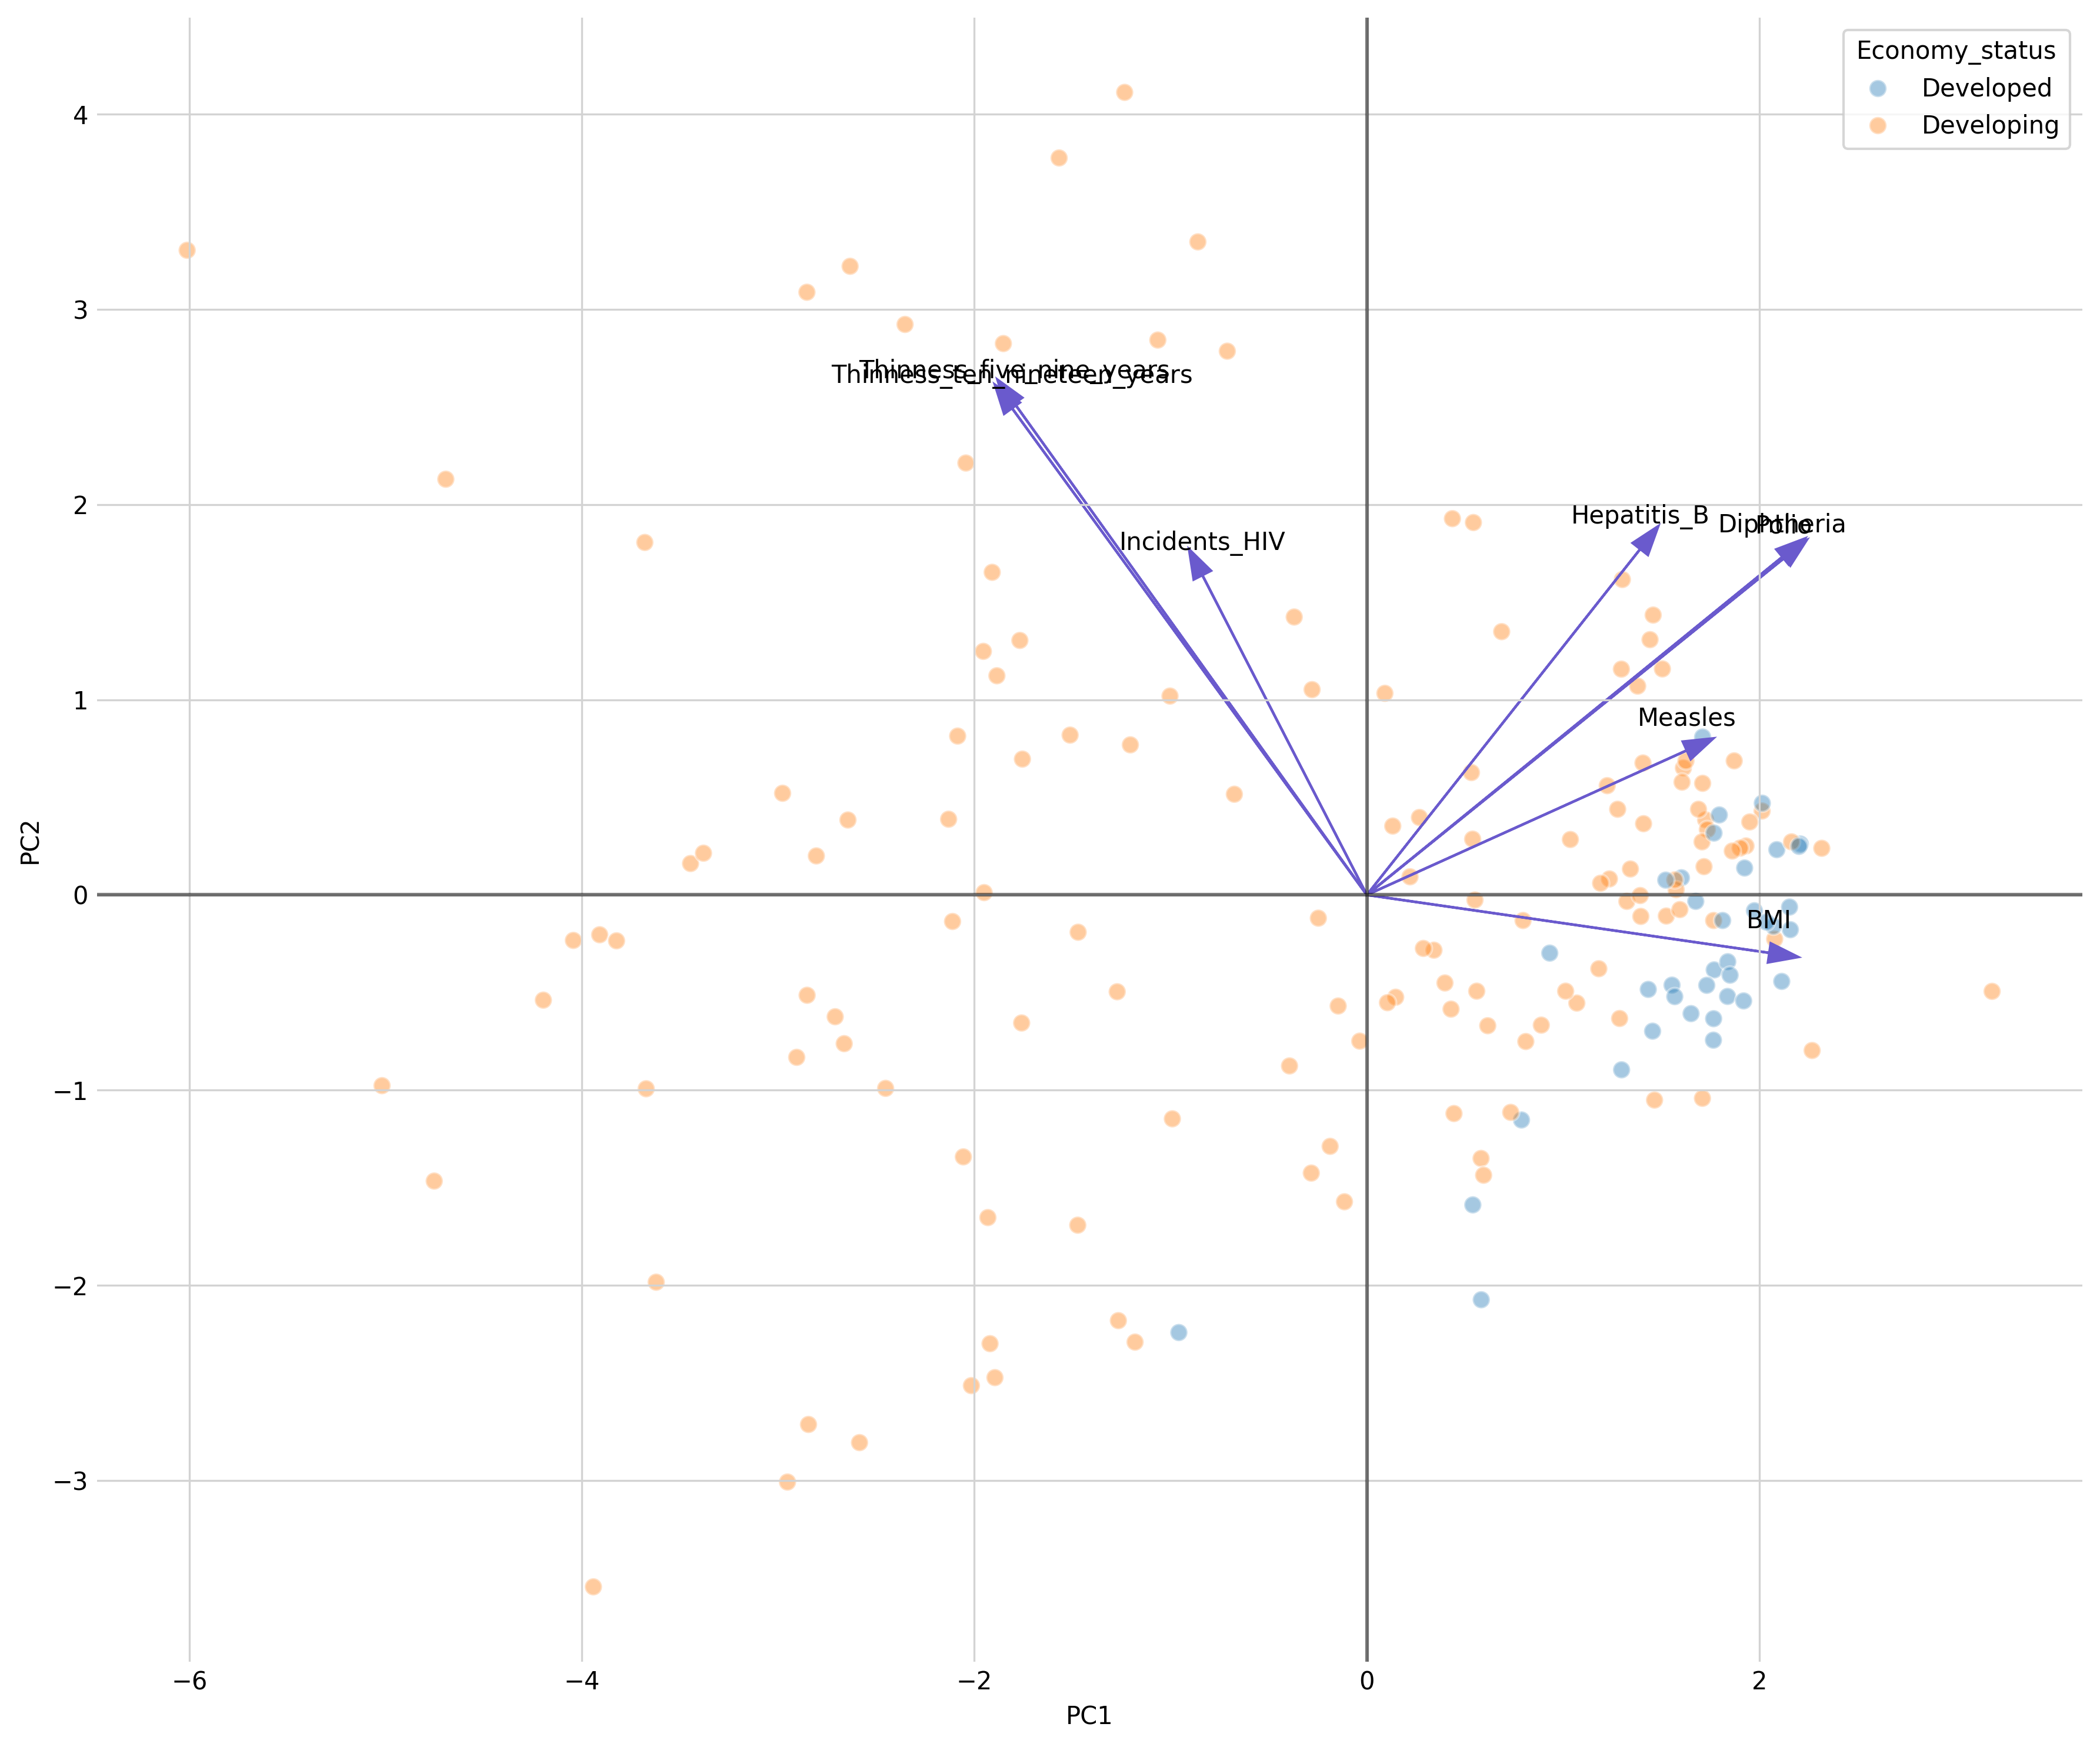

In [32]:
# Create a PC1 vs PC2 scatterplot, colored by Economy Status

plt.figure(figsize=(12, 10))

# Create scatterplot using seaborn
sns.scatterplot(
    data=pca_scores,
    x='PC1',
    y='PC2',
    hue='Economy_status',  # Color points by 'Economy_status'
    s=50,
    edgecolor='white',
    linewidth=1,
    alpha=0.4
)

# Plot arrows and labels
for idx, row in loadings_df.iterrows():
   plt.arrow(0, 0, row['PC1']*5, row['PC2']*5,
             head_width=0.1,
             fc='slateblue',
             ec='slateblue')
   plt.text(row['PC1']*5, row['PC2']*5+0.1, row['Variable'],
            ha='center', va='bottom', size=10)


# plt.xlim(-4, 4)
# plt.ylim(-2, 4.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()



---



## <font color="#B0AD89"><strong>4.3 ⫶ </strong></font>Time series

<img src="https://i.imgur.com/cfqJcNG.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Individual time series

<img src="https://i.imgur.com/Z77TqCg.png" width=1024 />



In [33]:
rwanda_life_expectancy = life_expectancy[
   life_expectancy['Country'] == 'Rwanda'
][['Year', 'Life_expectancy']].sort_values('Year')

# Convert 'Year' to an ordered categorical variable
rwanda_life_expectancy['Year'] = pd.Categorical(rwanda_life_expectancy['Year'], ordered=True)

rwanda_life_expectancy

Year  Life_expectancy
1696  2000             48.6
663   2001             49.9
1354  2002             51.0
2665  2003             52.2
629   2004             53.6
2169  2005             55.3
721   2006             57.1
291   2007             58.9
2436  2008             60.6
780   2009             62.1
2602  2010             63.4
520   2011             64.5
862   2012             65.4
702   2013             66.2
2200  2014             66.9
1988  2015             67.5

<img src="https://i.imgur.com/rG2X5TS.png" width=1024 />

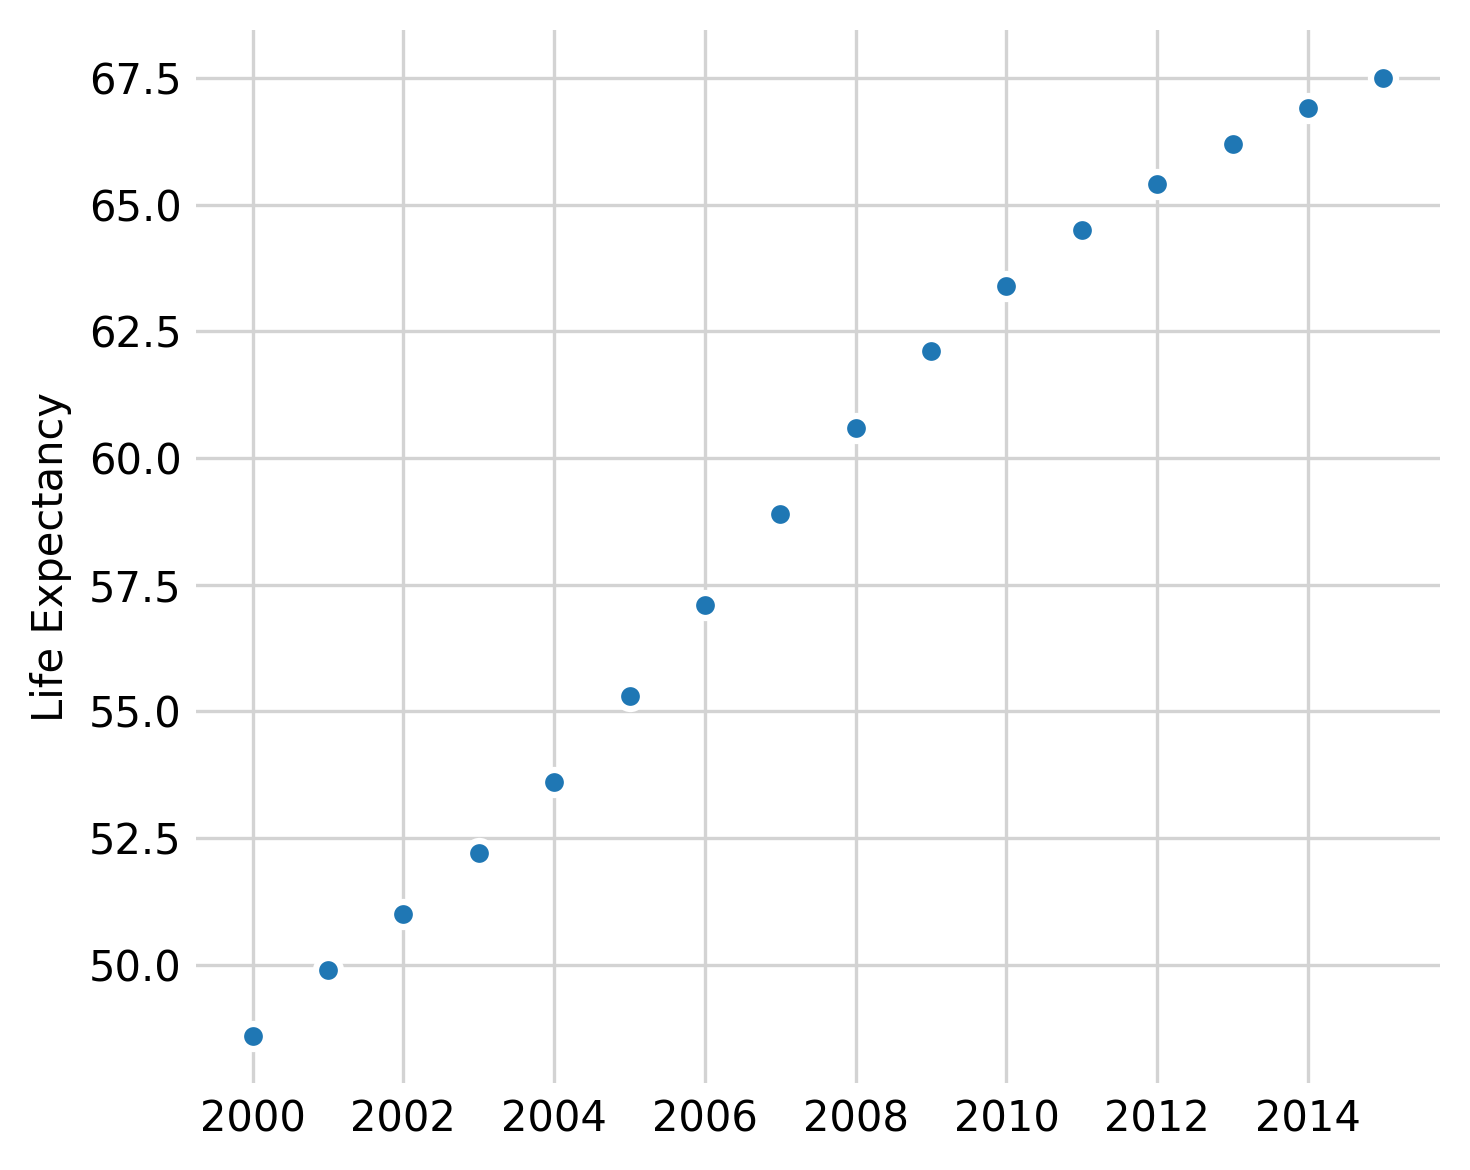

In [34]:
plt.figure(figsize=(5, 4))

sns.scatterplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                edgecolor='white',
                linewidth=1.5,
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/fLUonCE.png" width=1024 />

<img src="https://i.imgur.com/RaFDtww.png" width=1024 />

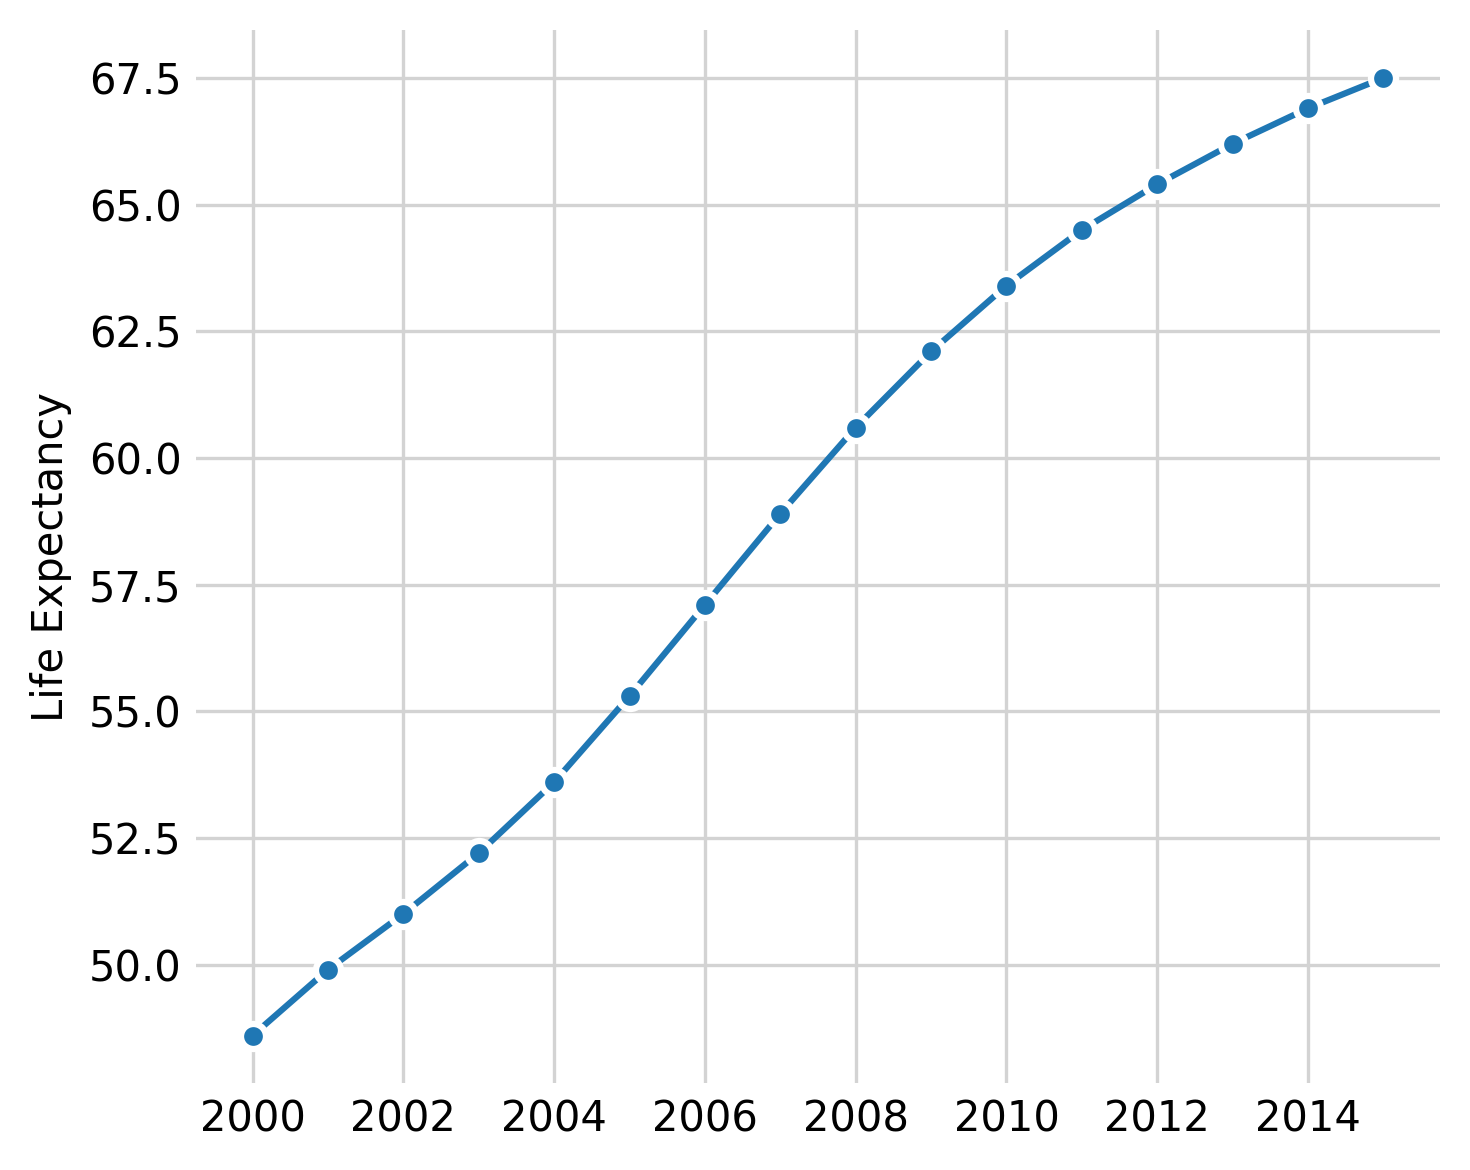

In [35]:
plt.figure(figsize=(5, 4))

sns.lineplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                linewidth=1.5,
                zorder=2)

sns.scatterplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                edgecolor='white',
                linewidth=1.5,
                zorder=3)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/4TWMSmN.png" width=1024 />

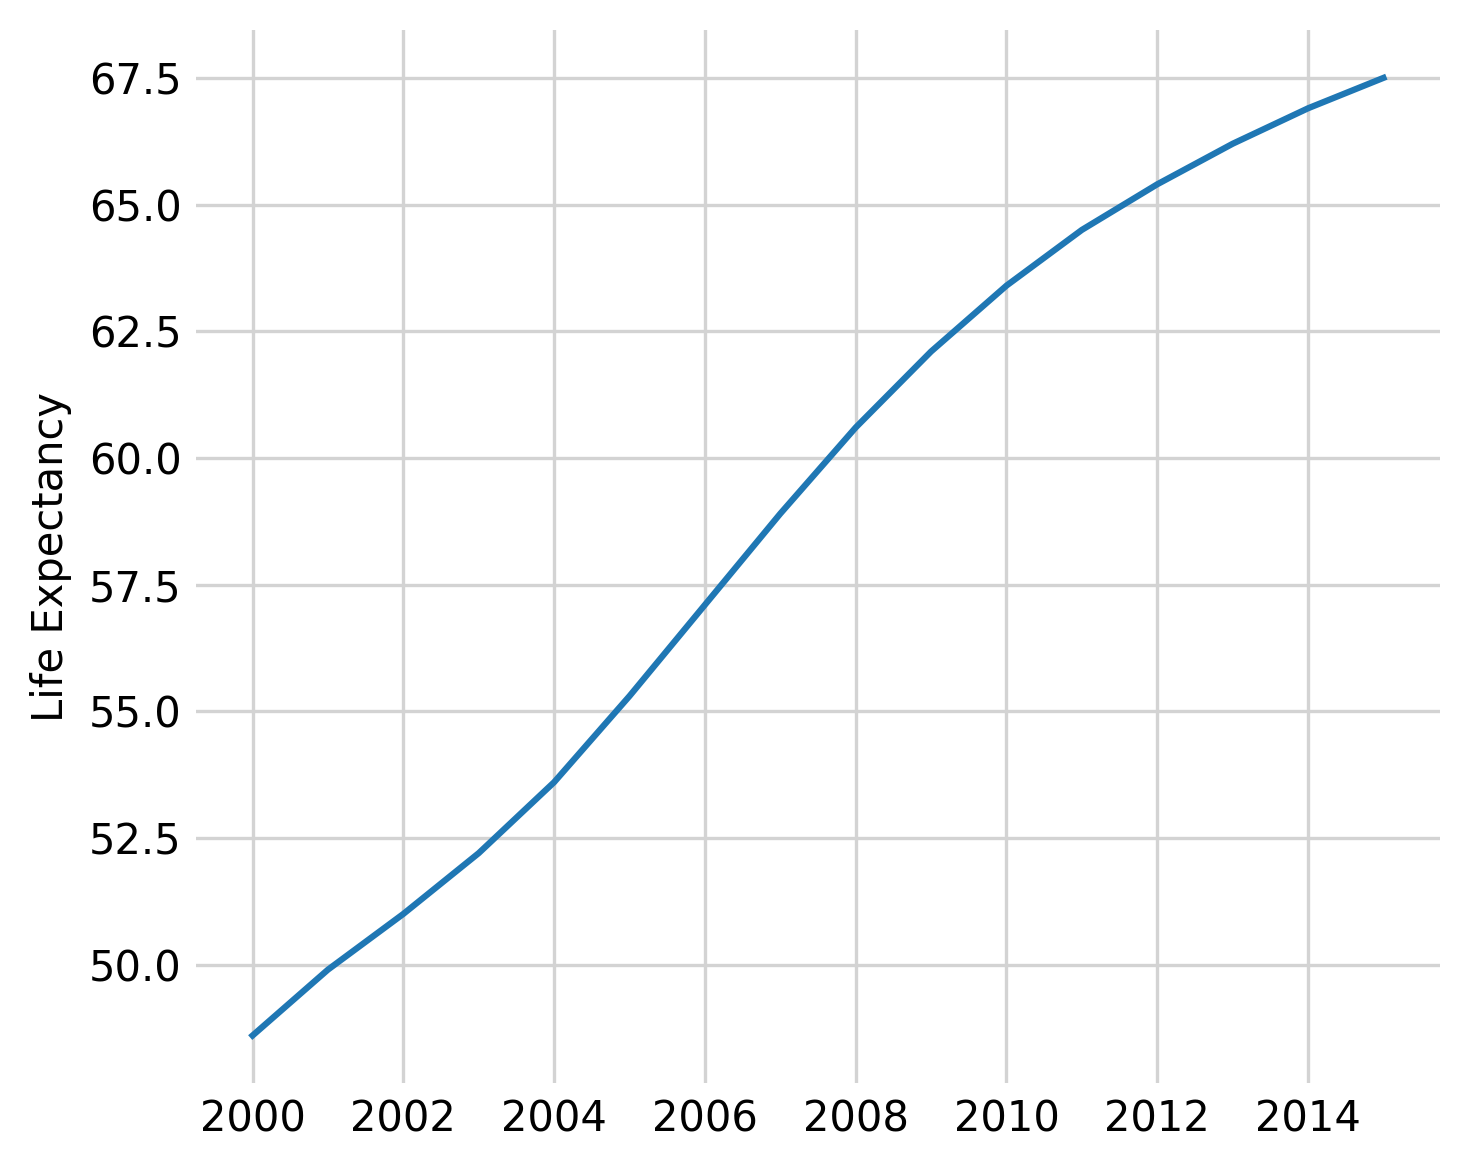

In [36]:
plt.figure(figsize=(5, 4))

sns.lineplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                linewidth=1.5,
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/8JZOWEE.png" width=1024 />

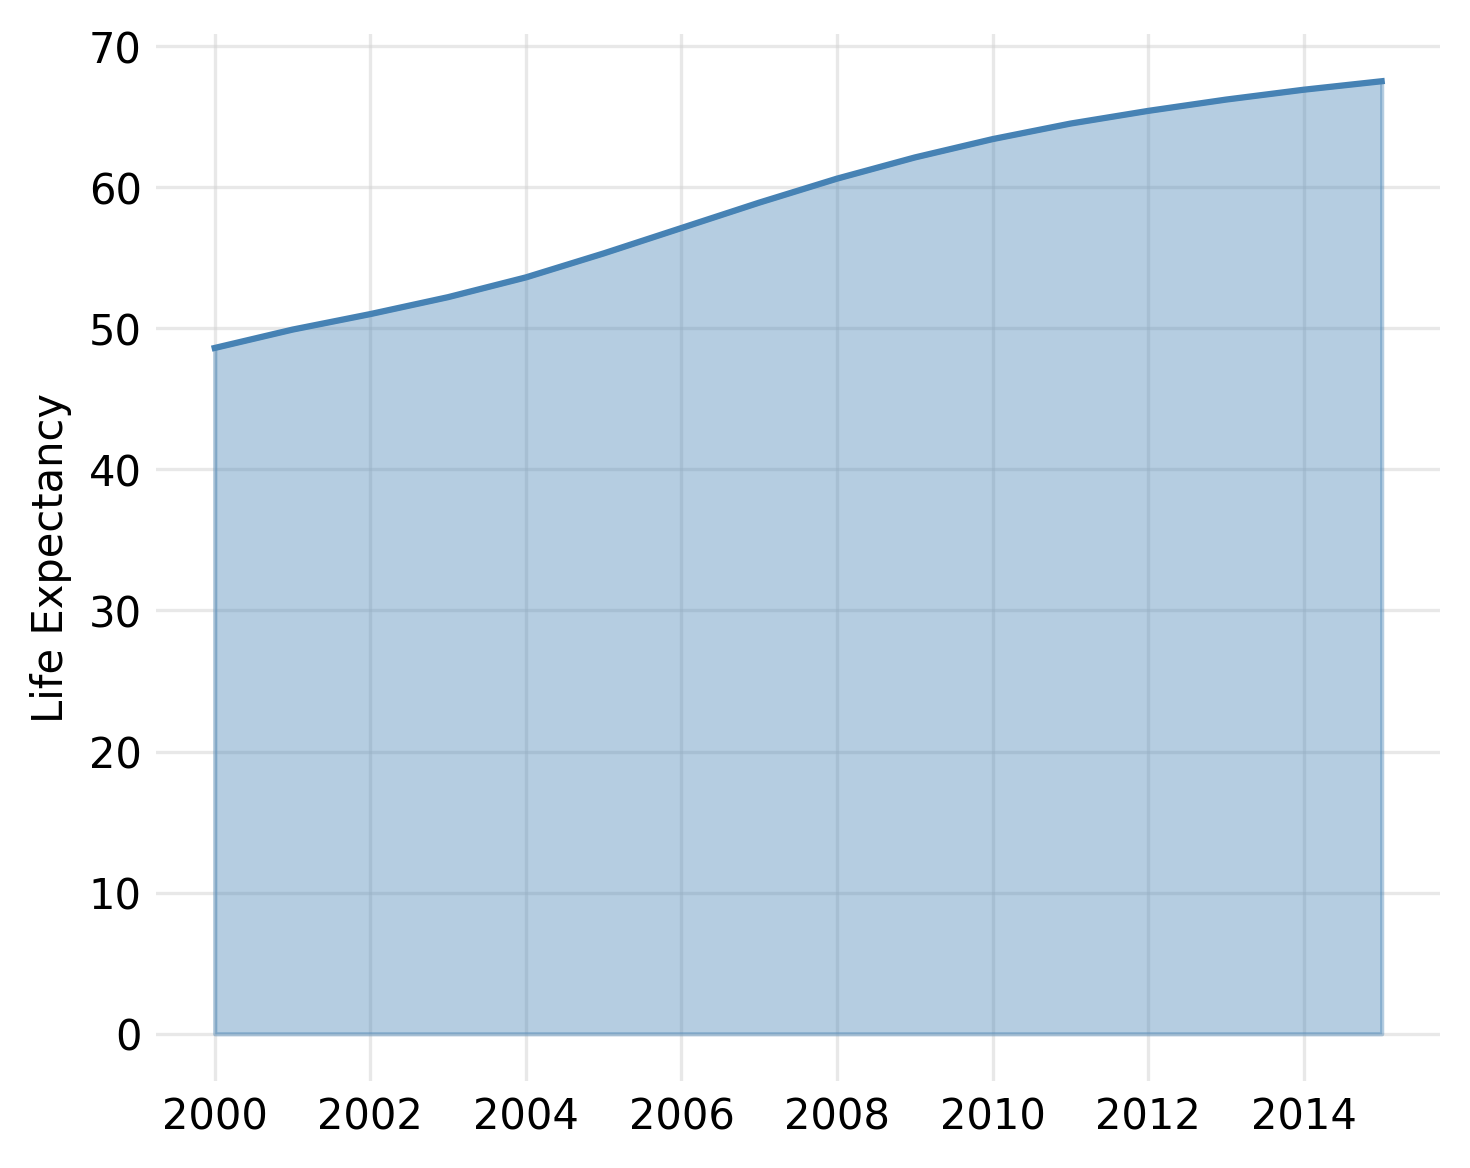

In [37]:
plt.figure(figsize=(5, 4))

# Using fill_between with the same data
sns.lineplot(rwanda_life_expectancy,
           x='Year',
           y='Life_expectancy',
           linewidth=1.5,
           zorder=3,
           color='steelblue')

plt.fill_between(rwanda_life_expectancy['Year'],
                rwanda_life_expectancy['Life_expectancy'],
                alpha=0.4,
                color='steelblue',
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid (behind the fill)
plt.grid(color='lightgrey', alpha=0.5, linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Multiple time series

<img src="https://i.imgur.com/7kjmLRO.png" width=1024 />

In [38]:
country_colors = {
   'Rwanda': 'forestgreen',
   'Somalia': 'dodgerblue',
   'Tanzania': 'gray'
}

africa_life_expectancy = life_expectancy[
   life_expectancy['Country'].isin(['Rwanda', 'Somalia', 'Tanzania'])
][['Country', 'Year', 'Life_expectancy']].sort_values('Year')

africa_life_expectancy.sample(10)

Country  Year  Life_expectancy
2665    Rwanda  2003             52.2
520     Rwanda  2011             64.5
2200    Rwanda  2014             66.9
1022   Somalia  2003             51.8
2406   Somalia  2011             54.3
1447  Tanzania  2002             52.1
721     Rwanda  2006             57.1
177   Tanzania  2014             62.3
718   Tanzania  2010             58.6
2625  Tanzania  2000             50.8

<img src="https://i.imgur.com/IoxNFaL.png" width=1024 />

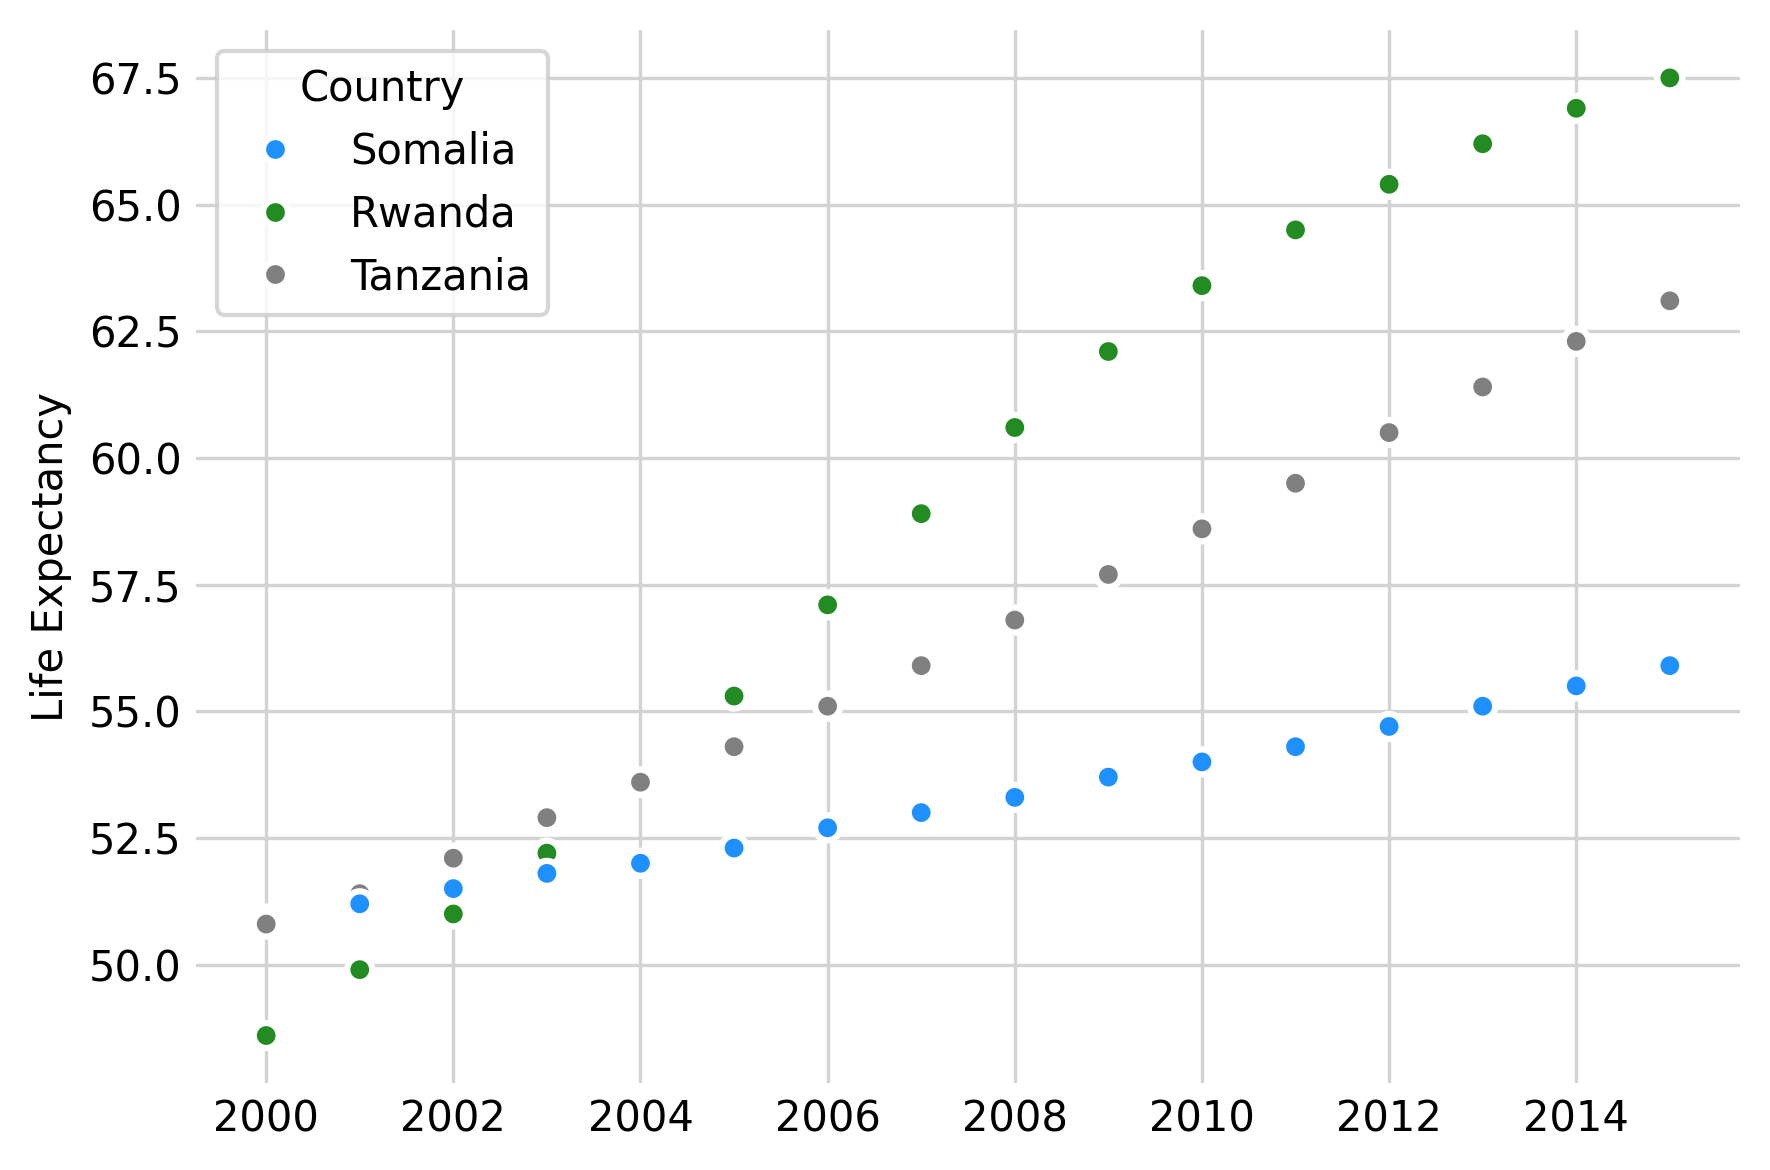

In [39]:
plt.figure(figsize=(6, 4))

sns.scatterplot(africa_life_expectancy,
                x='Year',
                y='Life_expectancy',
                hue='Country',
                palette=country_colors,
                edgecolor='white',
                linewidth=1.5,
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/BjIG6GG.png" width=1024 />

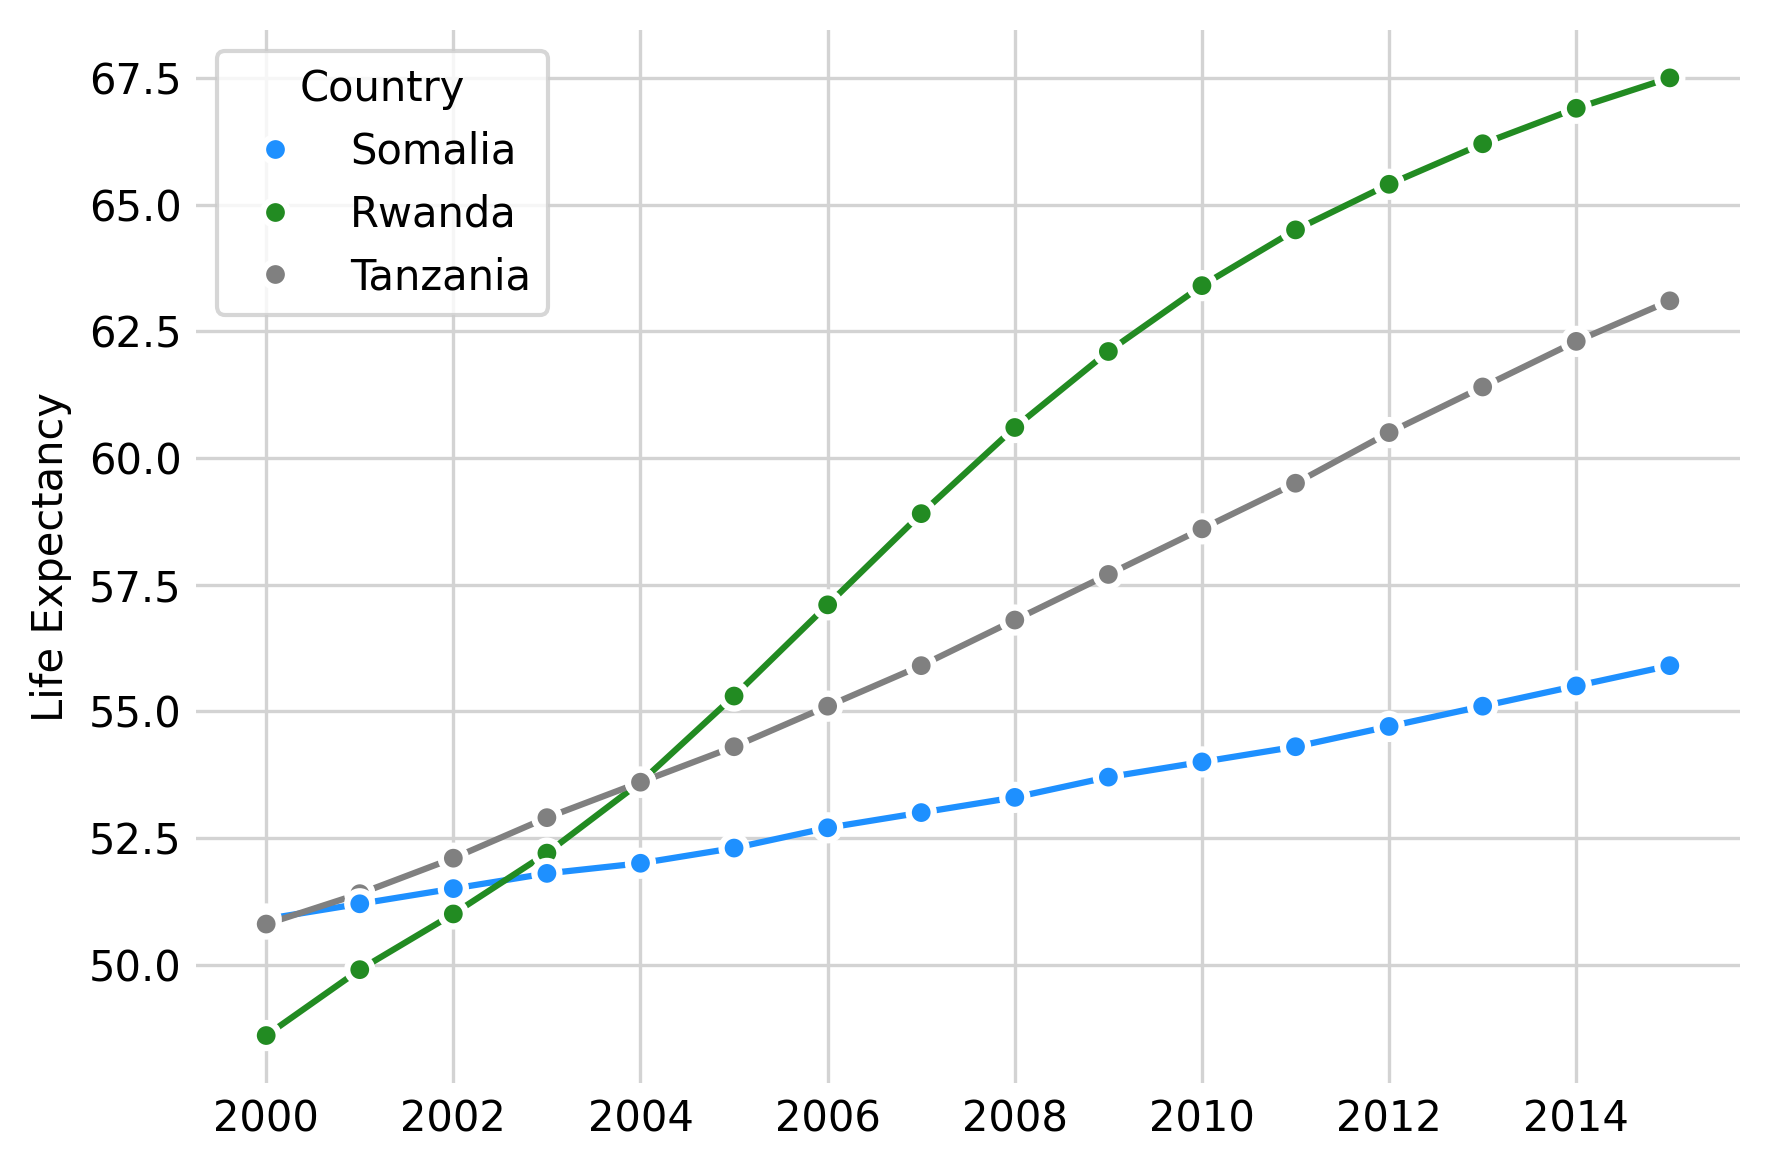

In [40]:
plt.figure(figsize=(6, 4))

sns.scatterplot(africa_life_expectancy,
                x='Year',
                y='Life_expectancy',
                hue='Country',
                palette=country_colors,
                edgecolor='white',
                linewidth=1.5,
                zorder=3)

sns.lineplot(africa_life_expectancy,
             x='Year',
             y='Life_expectancy',
             hue='Country',
             palette=country_colors,
             linewidth=1.5,
             zorder=2,
             legend=False)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/XLOsKRG.png" width=1024 />

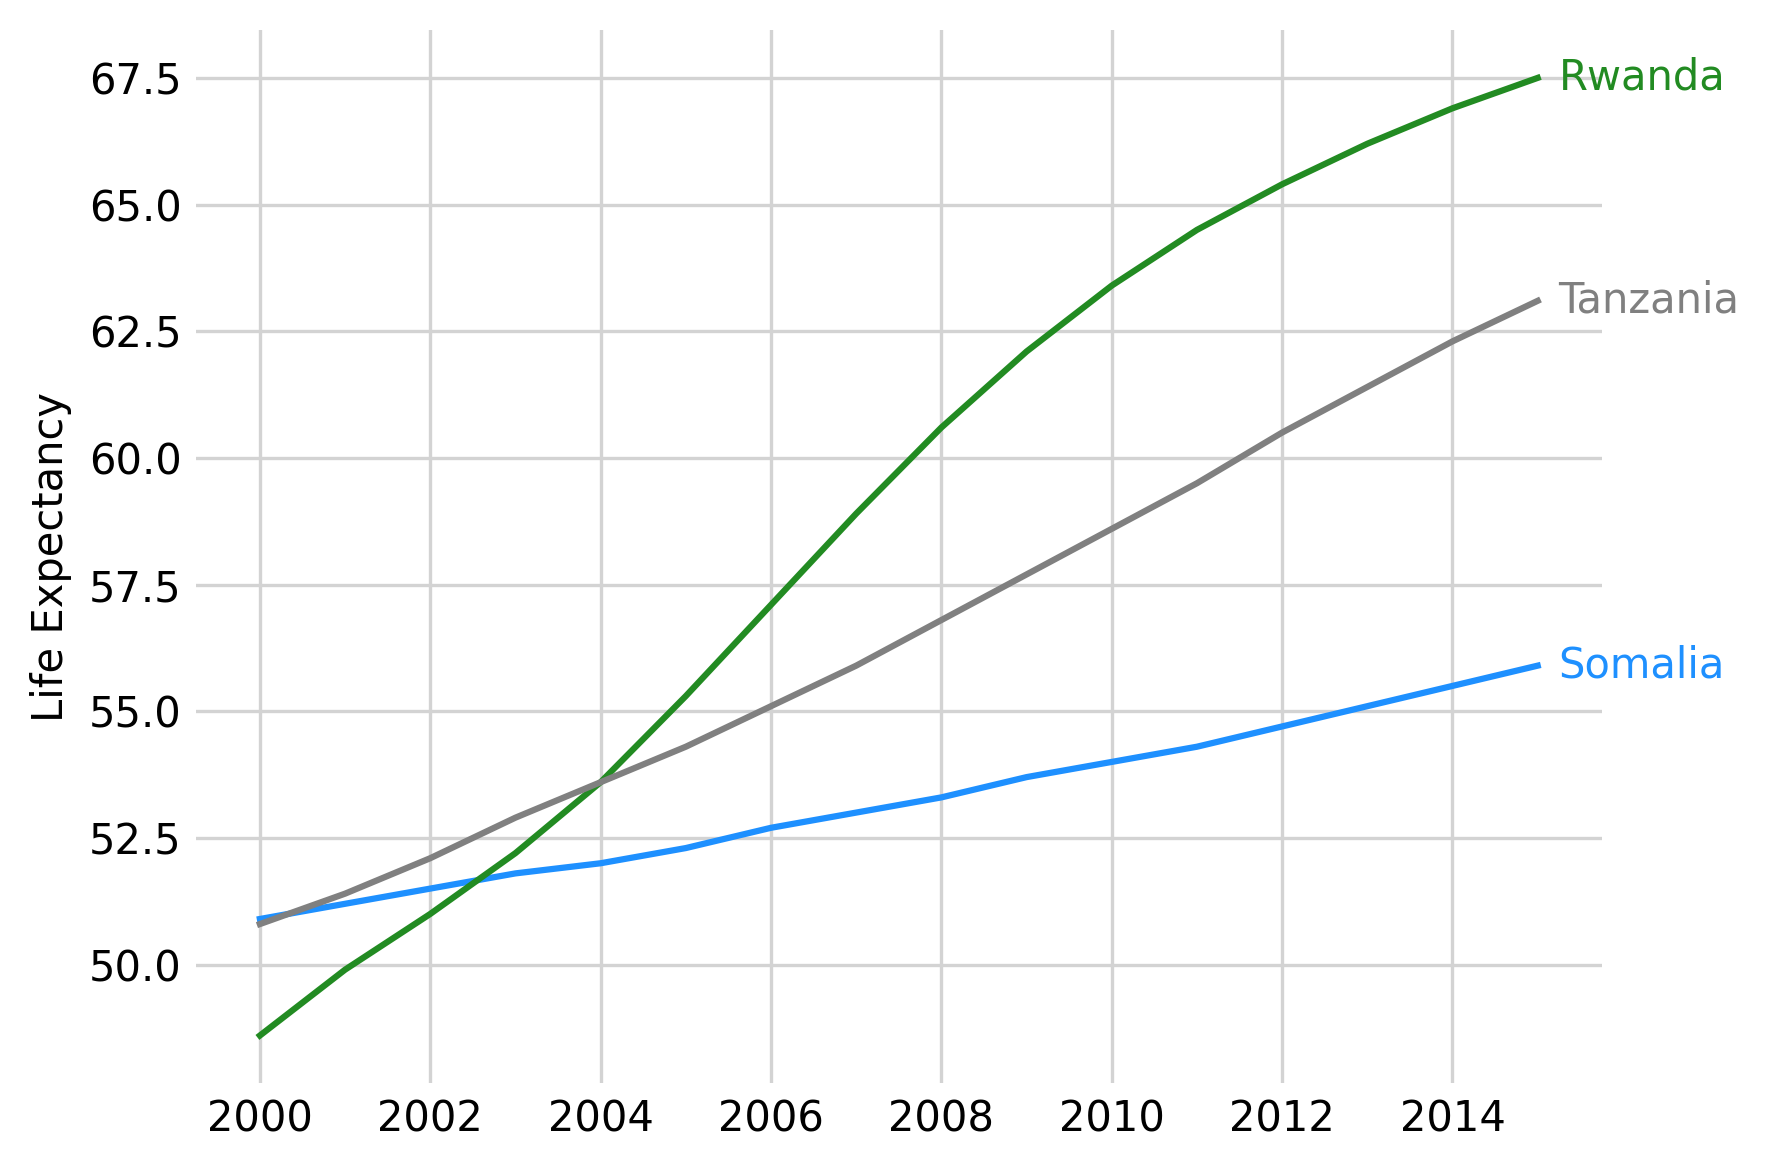

In [41]:
plt.figure(figsize=(6, 4))

sns.lineplot(africa_life_expectancy,
             x='Year',
             y='Life_expectancy',
             hue='Country',
             palette=country_colors,
             linewidth=1.5,
             zorder=2,
             legend=False)

# Add country labels at the end of each line
for country in africa_life_expectancy['Country'].unique():
   country_data = africa_life_expectancy[africa_life_expectancy['Country'] == country]
   last_point = country_data.iloc[-1]
   plt.annotate(country,
               xy=(last_point['Year'], last_point['Life_expectancy']),
               xytext=(5, 0),
               textcoords='offset points',
               va='center',
               color=country_colors[country])

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 4.3 ᆢ</strong></font>ᆢᆢ
**Issue: How was the temperature change in June-August 2015 for Tokyo and Sydney?**

Make a scatterplot joined by lines to see the change of temperature in Tokyo and Sydney for June-August 2015.

In [42]:
import datetime

# Create color dictionary
city_color = {'Tokyo': '#FF6961', 'Sydney': '#4682B4' }

# Filter and prepare temperature data
tokyo_sydney_temp = city_temperature[
    (city_temperature['City'].isin(['Tokyo', 'Sydney'])) &
    (city_temperature['Year'] == 2015) &
    (city_temperature['Month'].isin([6, 7, 8]))
].copy()

# Create Date column
tokyo_sydney_temp['Date'] = pd.to_datetime(
    tokyo_sydney_temp[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)

# Select required columns
tokyo_sydney_temp = tokyo_sydney_temp[['Date', 'City', 'AvgTemperature']]

# Print the result
tokyo_sydney_temp

Date    City  AvgTemperature
384839 2015-06-01   Tokyo            73.6
384840 2015-06-02   Tokyo            73.2
384841 2015-06-03   Tokyo            70.9
384842 2015-06-04   Tokyo            73.2
384843 2015-06-05   Tokyo            64.2
...           ...     ...             ...
612388 2015-08-27  Sydney            48.9
612389 2015-08-28  Sydney            45.6
612390 2015-08-29  Sydney            47.2
612391 2015-08-30  Sydney            47.6
612392 2015-08-31  Sydney            47.1

[184 rows x 3 columns]

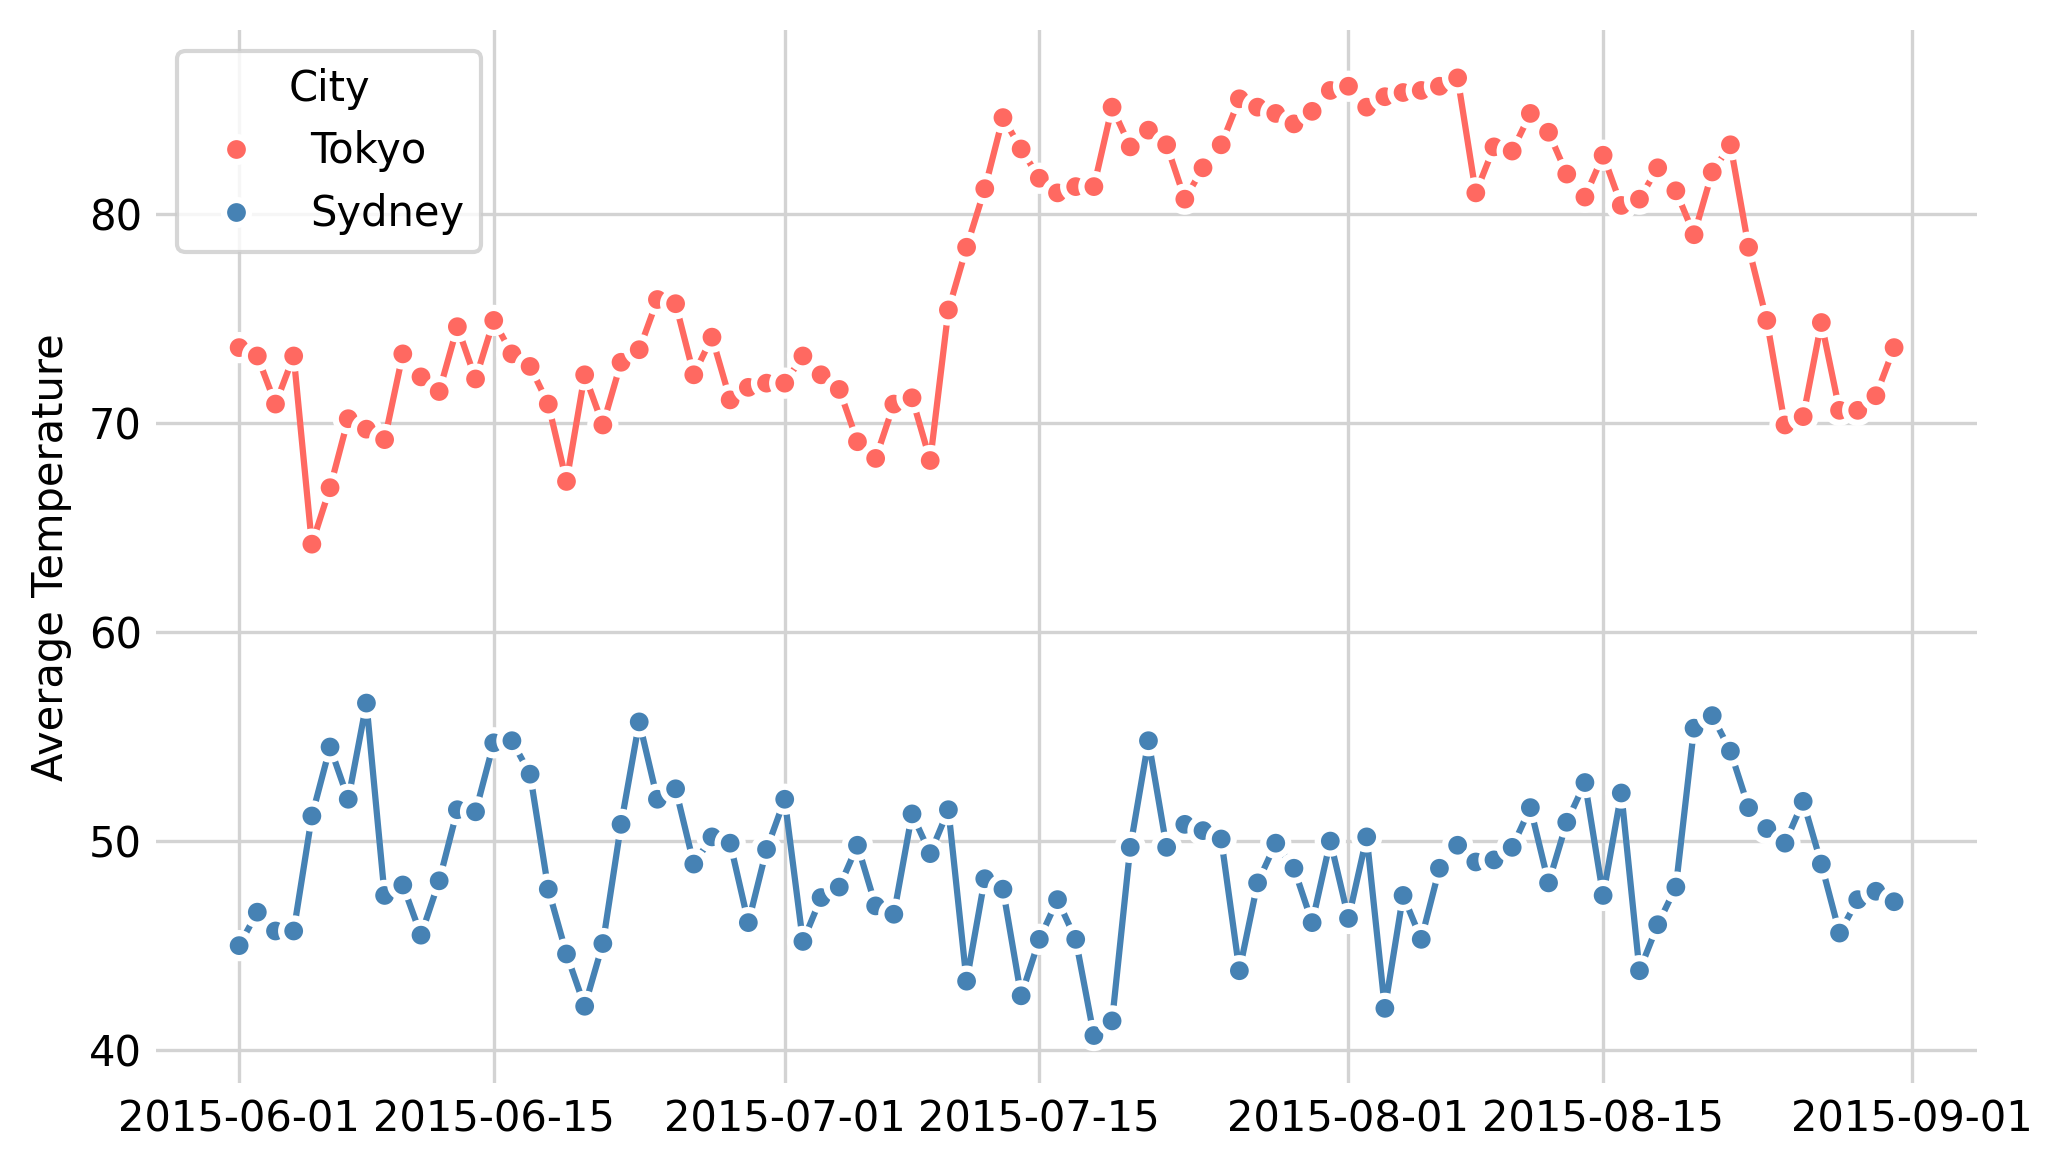

In [43]:
plt.figure(figsize=(7, 4))

sns.scatterplot(tokyo_sydney_temp,
                x='Date',
                y='AvgTemperature',
                hue='City',
                palette=city_color,
                edgecolor='white',
                linewidth=1.5,
                zorder=3)

sns.lineplot(tokyo_sydney_temp,
             x='Date',
             y='AvgTemperature',
             hue='City',
             palette=city_color,
             linewidth=1.5,
             zorder=2,
             legend=False)

plt.xlabel('')
plt.ylabel('Average Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()



---



# **Lesson** <font color="#B0AD89"><strong>4B ⫶⫶ </strong></font>Visualizing Trends

<img src="https://i.imgur.com/POG7Rpo.png" width=1024 />


## <font color="#B0AD89"><strong>4.4 ⫶ </strong></font>Smoothing

<img src="https://i.imgur.com/e2pZkjj.png" width=1024 />



### <font color="#B0AD89"><strong>a ⬝ </strong></font>Moving averages

<img src="https://i.imgur.com/zBpHkys.png" width=1024 />




In [44]:
tokyo_temperature = city_temperature[
   (city_temperature['City'] == 'Tokyo') &
   (city_temperature['Year'] == 2010)
].copy()

tokyo_temperature['Date'] = pd.to_datetime(
   tokyo_temperature[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)

tokyo_temperature = tokyo_temperature[['Date', 'AvgTemperature']]

tokyo_temperature

Date  AvgTemperature
382862 2010-01-01            42.3
382863 2010-01-02            44.9
382864 2010-01-03            43.7
382865 2010-01-04            44.7
382866 2010-01-05            44.7
...           ...             ...
383222 2010-12-27            44.6
383223 2010-12-28            47.0
383224 2010-12-29            46.7
383225 2010-12-30            41.2
383226 2010-12-31            42.5

[365 rows x 2 columns]

In [ ]:
tokyo_temp_avg = tokyo_temperature.sort_values('Date').copy()

# Calculate rolling averages
tokyo_temp_avg['Avg02'] = tokyo_temp_avg['AvgTemperature'].rolling(window=2).mean()
tokyo_temp_avg['Avg04'] = tokyo_temp_avg['AvgTemperature'].rolling(window=4).mean()
tokyo_temp_avg['Avg06'] = tokyo_temp_avg['AvgTemperature'].rolling(window=6).mean()
tokyo_temp_avg['Avg10'] = tokyo_temp_avg['AvgTemperature'].rolling(window=10).mean()
tokyo_temp_avg['Avg20'] = tokyo_temp_avg['AvgTemperature'].rolling(window=20).mean()
tokyo_temp_avg['Avg50'] = tokyo_temp_avg['AvgTemperature'].rolling(window=50).mean()

tokyo_temp_avg

Date  AvgTemperature  Avg02   Avg04      Avg06  Avg10   Avg20  \
382862 2010-01-01            42.3    NaN     NaN        NaN    NaN     NaN   
382863 2010-01-02            44.9  43.60     NaN        NaN    NaN     NaN   
382864 2010-01-03            43.7  44.30     NaN        NaN    NaN     NaN   
382865 2010-01-04            44.7  44.20  43.900        NaN    NaN     NaN   
382866 2010-01-05            44.7  44.70  44.500        NaN    NaN     NaN   
...           ...             ...    ...     ...        ...    ...     ...   
383222 2010-12-27            44.6  44.95  44.575  47.733333  48.63  49.245   
383223 2010-12-28            47.0  45.80  44.825  46.216667  48.56  49.155   
383224 2010-12-29            46.7  46.85  45.900  45.333333  48.61  49.025   
383225 2010-12-30            41.2  43.95  44.875  44.533333  47.36  48.575   
383226 2010-12-31            42.5  41.85  44.350  44.550000  46.38  47.755   

         Avg50  
382862     NaN  
382863     NaN  
382864     NaN  
382865     NaN  
382866     NaN  
...        ...  
383222  53.376  
383223  53.070  
383224  52.766  
383225  52.444  
383226  52.146  

[365 rows x 8 columns]

In [46]:
tokyo_temperature_long = tokyo_temp_avg[['Date', 'AvgTemperature', 'Avg10', 'Avg20', 'Avg50']].melt(
   id_vars=['Date'],
   value_vars=['AvgTemperature', 'Avg10', 'Avg20', 'Avg50'],
   var_name='Type',
   value_name='Temperature'
).sort_values('Type', ascending=False)

tokyo_temperature_long

Date            Type  Temperature
0   2010-01-01  AvgTemperature        42.30
251 2010-09-09  AvgTemperature        76.30
249 2010-09-07  AvgTemperature        87.00
248 2010-09-06  AvgTemperature        84.90
247 2010-09-05  AvgTemperature        86.10
..         ...             ...          ...
609 2010-09-02           Avg10        84.90
610 2010-09-03           Avg10        85.06
611 2010-09-04           Avg10        85.13
612 2010-09-05           Avg10        85.33
728 2010-12-30           Avg10        47.36

[1460 rows x 3 columns]

<img src="https://i.imgur.com/2zs91Z7.png" width=1024 />




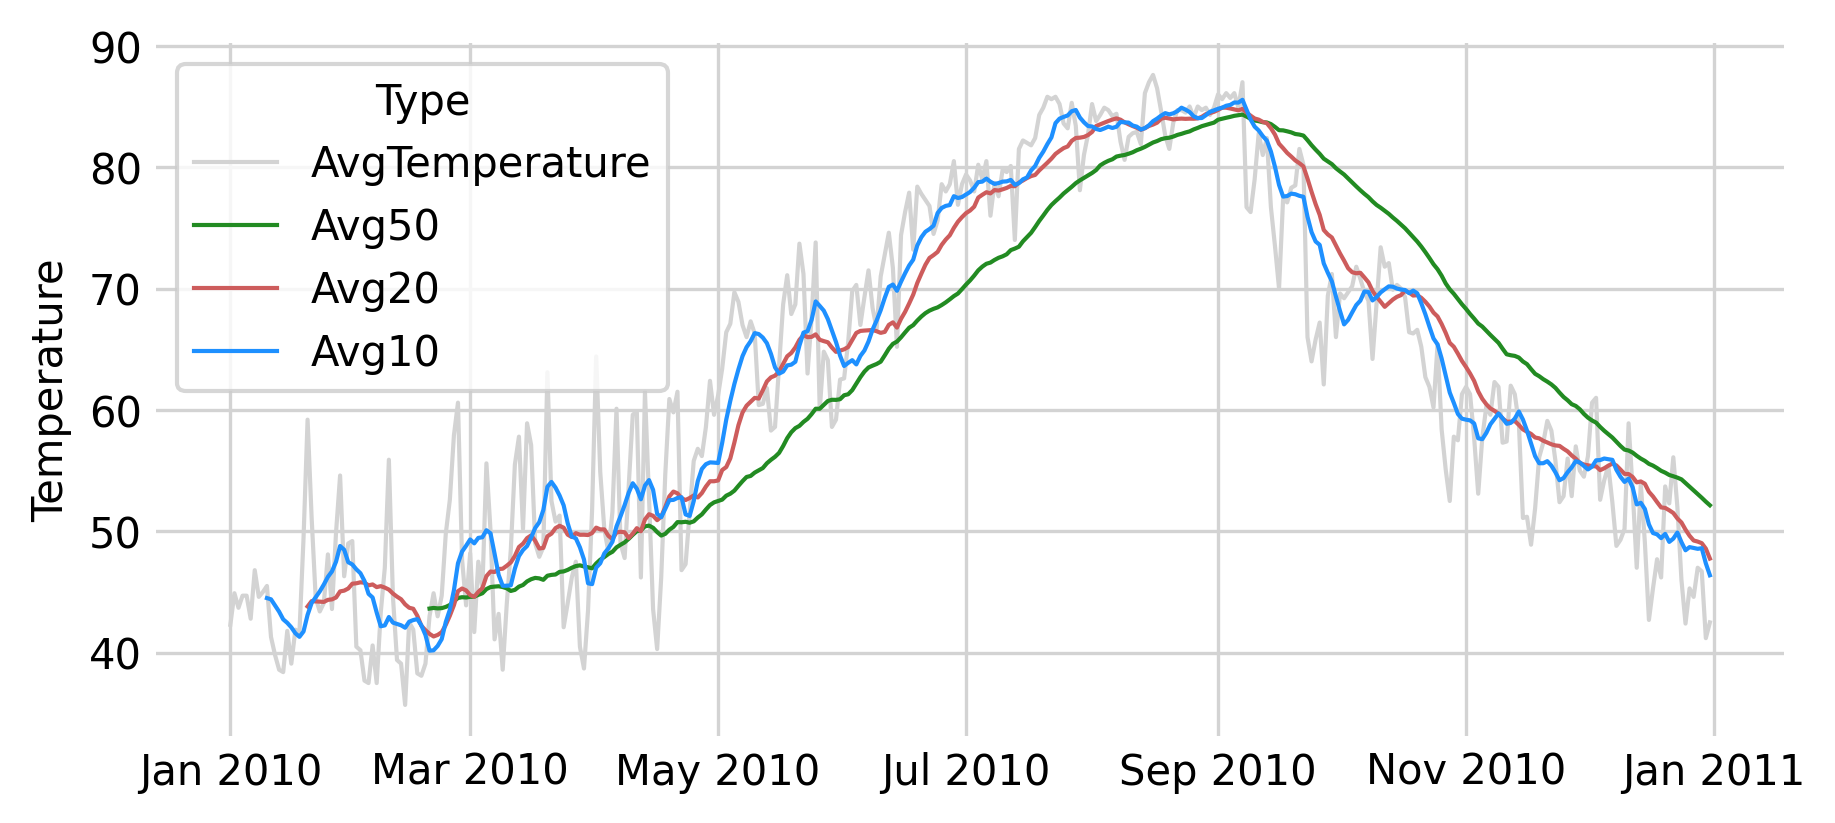

In [47]:
line_colors = {
   'AvgTemperature': 'lightgray',
   'Avg10': 'dodgerblue',
   'Avg20': 'indianred',
   'Avg50': 'forestgreen'
}

plt.figure(figsize=(7, 3))

# Plot moving averages
sns.lineplot(data=tokyo_temperature_long,
            x='Date',
            y='Temperature',
            hue='Type',
            palette=line_colors,
            linewidth=1,
            zorder=2)

plt.xlabel('')
plt.ylabel('Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

<img src="https://i.imgur.com/lPIVwdU.png" width=1024 />




### <font color="#B0AD89"><strong>b ⬝ </strong></font>LOESS

<img src="https://i.imgur.com/iaNTbfW.png" width=1024 />




In [48]:
# Create date numeric and calculate rolling average
tokyo_temp_avg_loess = tokyo_temperature.copy()
tokyo_temp_avg_loess['DateNumeric'] = (tokyo_temp_avg_loess['Date'] - pd.Timestamp("1970-01-01")).dt.total_seconds()
tokyo_temp_avg_loess['Avg100'] = tokyo_temp_avg_loess['AvgTemperature'].rolling(window=100).mean()

# Add LOESS smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
loess = lowess(tokyo_temp_avg_loess['AvgTemperature'],
              tokyo_temp_avg_loess['DateNumeric'],
              frac=0.3,
              return_sorted=False)
tokyo_temp_avg_loess['LOESS'] = loess

# Convert to long format
tokyo_temp_long = tokyo_temp_avg_loess.melt(
   id_vars=['Date'],
   value_vars=['AvgTemperature', 'Avg100', 'LOESS'],
   var_name='AverageType',
   value_name='Temperature'
)

tokyo_temp_avg_loess

Date  AvgTemperature   DateNumeric  Avg100      LOESS
382862 2010-01-01            42.3  1.262304e+09     NaN  42.387116
382863 2010-01-02            44.9  1.262390e+09     NaN  42.439395
382864 2010-01-03            43.7  1.262477e+09     NaN  42.492205
382865 2010-01-04            44.7  1.262563e+09     NaN  42.545560
382866 2010-01-05            44.7  1.262650e+09     NaN  42.599471
...           ...             ...           ...     ...        ...
383222 2010-12-27            44.6  1.293408e+09  59.777  46.520891
383223 2010-12-28            47.0  1.293494e+09  59.464  46.257892
383224 2010-12-29            46.7  1.293581e+09  59.146  45.994817
383225 2010-12-30            41.2  1.293667e+09  58.743  45.731653
383226 2010-12-31            42.5  1.293754e+09  58.366  45.468387

[365 rows x 5 columns]

In [49]:
tokyo_temp_long

Date     AverageType  Temperature
0    2010-01-01  AvgTemperature    42.300000
1    2010-01-02  AvgTemperature    44.900000
2    2010-01-03  AvgTemperature    43.700000
3    2010-01-04  AvgTemperature    44.700000
4    2010-01-05  AvgTemperature    44.700000
...         ...             ...          ...
1090 2010-12-27           LOESS    46.520891
1091 2010-12-28           LOESS    46.257892
1092 2010-12-29           LOESS    45.994817
1093 2010-12-30           LOESS    45.731653
1094 2010-12-31           LOESS    45.468387

[1095 rows x 3 columns]

<img src="https://i.imgur.com/W1d1EcW.png" width=1024 />




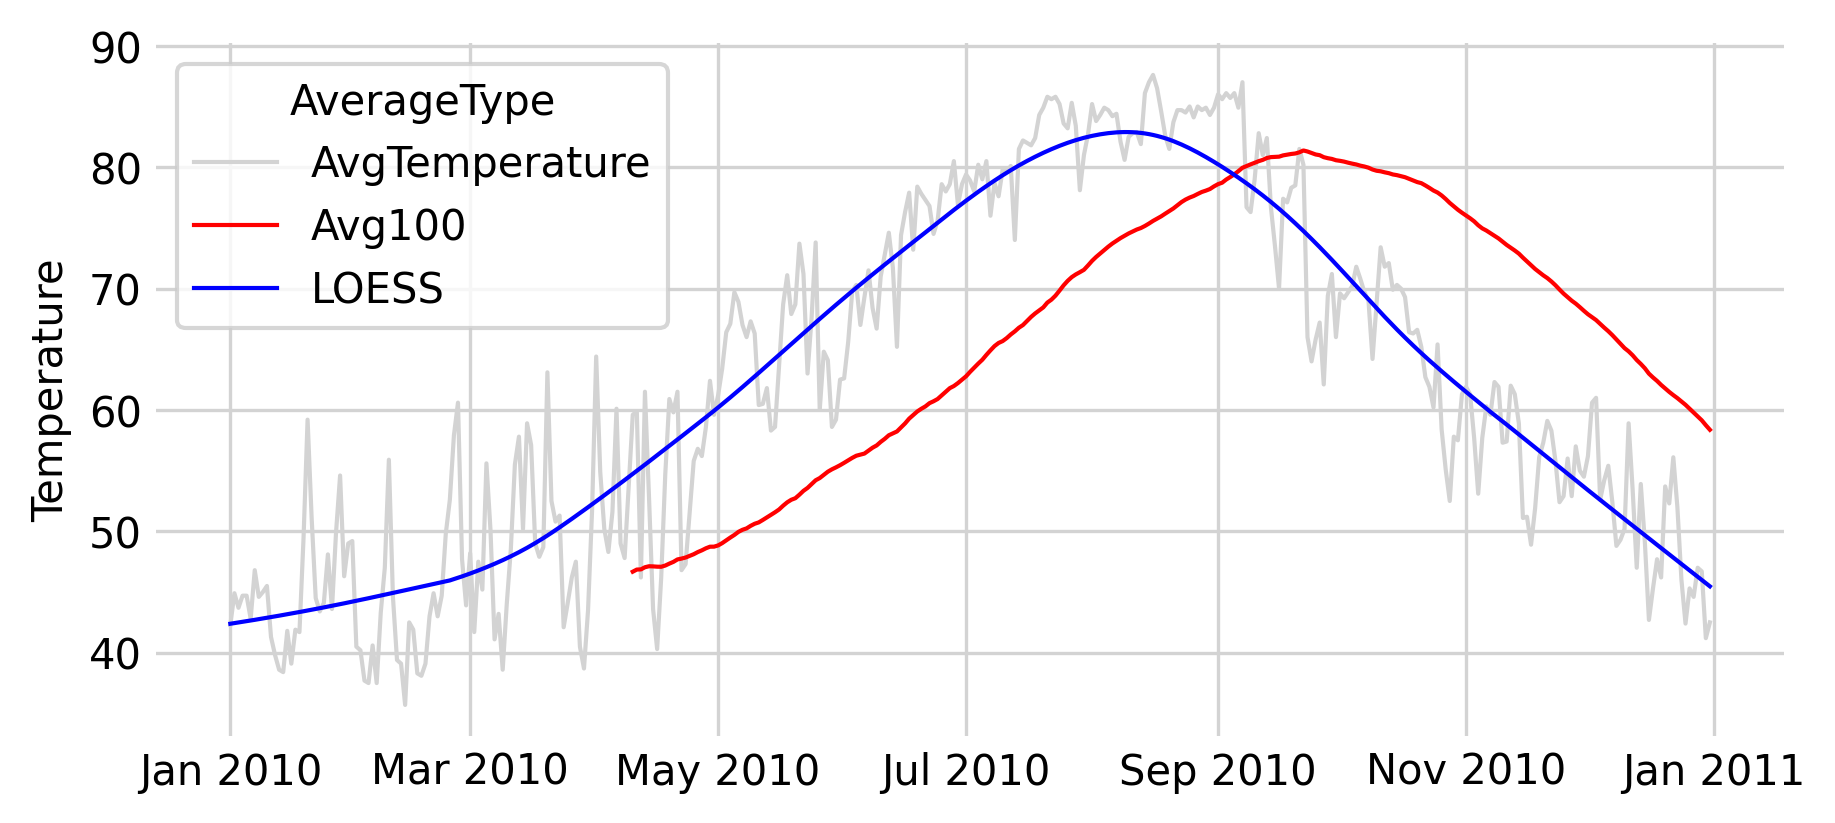

In [50]:
plt.figure(figsize=(7, 3))

colors = {'AvgTemperature': 'lightgray', 'Avg100': 'red', 'LOESS': 'blue'}

sns.lineplot(data=tokyo_temp_long,
             x='Date',
             y='Temperature',
             hue='AverageType',
             palette=colors,
             linewidth=1,
             zorder=2)

plt.xlabel('')
plt.ylabel('Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

<img src="https://i.imgur.com/LGvTvRQ.png" width=1024 />




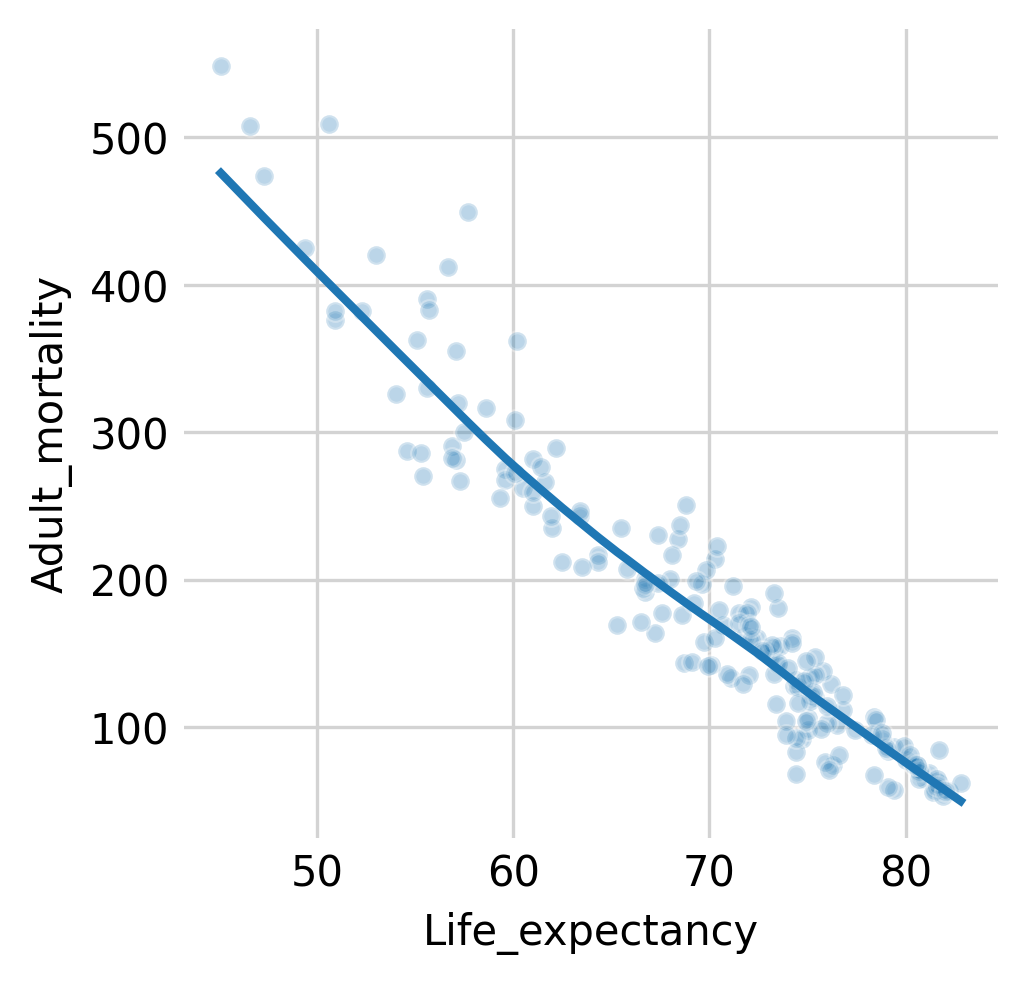

In [51]:
plt.figure(figsize=(3.5, 3.5))

# Add LOESS smoothing
sns.regplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='Adult_mortality',
           scatter=True,
           lowess=True,
           line_kws={'linewidth': 2, 'zorder':3},
           scatter_kws={'alpha': 0.3, 'edgecolor':'white','s':20, 'zorder':2}
           )

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>  Practice 4.4 ᆢ</strong></font>ᆢᆢ
**Issue: How was the temperature change in 2015 for Tokyo and Sydney?**

Try moving average and LOESS smoothing methods to see the change of temperature in Tokyo and Sydney for  2015. Draw both the scatterplot and the smoothing line.

In [59]:
# Create color dictionary
city_color = {'Tokyo': '#FF6961','Sydney': '#4682B4'}

# Filter and prepare temperature data
tokyo_sydney_temp = city_temperature[
    (city_temperature['City'].isin(['Tokyo', 'Sydney'])) &
    (city_temperature['Year'] == 2015) &
    (city_temperature['AvgTemperature'] != -99)  # Filter out -99 values
].copy()

# Create Date column
tokyo_sydney_temp['Date'] = pd.to_datetime(
    tokyo_sydney_temp[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)

# Select required columns
tokyo_sydney_temp = tokyo_sydney_temp[['Date', 'City', 'AvgTemperature']]

# Print the result
tokyo_sydney_temp

Date    City  AvgTemperature
384688 2015-01-01   Tokyo            36.6
384689 2015-01-02   Tokyo            39.0
384690 2015-01-03   Tokyo            40.6
384691 2015-01-04   Tokyo            42.1
384692 2015-01-05   Tokyo            50.1
...           ...     ...             ...
612509 2015-12-26  Sydney            57.1
612510 2015-12-27  Sydney            59.3
612511 2015-12-28  Sydney            62.0
612512 2015-12-29  Sydney            65.8
612513 2015-12-30  Sydney            85.0

[728 rows x 3 columns]

Moving Average Plot

In [ ]:
# TOFIX

avg_tokyo_sydney_temp = tokyo_sydney_temp.sort_values('Date').copy()

# Calculate rolling averages
avg_tokyo_sydney_temp['Avg50'] = avg_tokyo_sydney_temp['AvgTemperature'].rolling(window=50).mean()

line_colors = {
   'AvgTemperature': 'lightgray',
   'Avg10': 'dodgerblue',
   'Avg20': 'indianred',
   'Avg50': 'forestgreen'
}

# tokyo_temperature_long = tokyo_temp_avg[['Date', 'AvgTemperature', 'Avg10', 'Avg20', 'Avg50']].melt(
#    id_vars=['Date'],
#    value_vars=['AvgTemperature', 'Avg10', 'Avg20', 'Avg50'],
#    var_name='Type',
#    value_name='Temperature'
# ).sort_values('Type', ascending=False)

# tokyo_temperature_long

plt.figure(figsize=(7, 3))

# Plot moving averages
sns.lineplot(data=avg_tokyo_sydney_temp,
            x='Date',
            y='AvgTemperature',
            hue='City',
            palette=line_colors,
            linewidth=1,
            zorder=2)

plt.xlabel('')
plt.ylabel('Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

LOESS plot:

In [66]:
# Create date numeric and calculate rolling average
tokyo_sydney_loess = tokyo_sydney_temp.copy()
tokyo_sydney_loess['DateNumeric'] = (tokyo_sydney_loess['Date'] - pd.Timestamp("1970-01-01")).dt.total_seconds()

# Add LOESS smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
loess = lowess(tokyo_sydney_loess.query("City==\"Tokyo\"")['AvgTemperature'],
              tokyo_sydney_loess.query("City==\"Tokyo\"")['DateNumeric'],
              frac=0.3,
              return_sorted=False)
tokyo_sydney_loess.query("City==\"Tokyo\"")['LOESS'] = loess
from statsmodels.nonparametric.smoothers_lowess import lowess
loess = lowess(tokyo_sydney_loess.query("City==\"Sydney\"")['AvgTemperature'],
              tokyo_sydney_loess.query("City==\"Sydney\"")['DateNumeric'],
              frac=0.3,
              return_sorted=False)
tokyo_sydney_loess.query("City==\"Tokyo\"")['LOESS'] = loess

# Convert to long format
tokyo_sydney_long = tokyo_sydney_loess.melt(
   id_vars=['Date'],
   value_vars=['AvgTemperature', "LOESS"],
   var_name='AverageType',
   value_name='Temperature'
)

plt.figure(figsize=(7, 3))

colors = {'AvgTemperature': 'lightgray', 'LOESS': 'blue'}

sns.lineplot(data=tokyo_sydney_long,
             x='Date',
             y='Temperature',
             hue='AverageType',
             palette=colors,
             linewidth=1,
             zorder=2)

plt.xlabel('')
plt.ylabel('Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

/tmp/ipykernel_19923/2524956216.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_sydney_loess.query("City==\"Tokyo\"")['LOESS'] = loess
/tmp/ipykernel_19923/2524956216.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_sydney_loess.query("City==\"Tokyo\"")['LOESS'] = loess


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['LOESS']"



---



## <font color="#B0AD89"><strong>4.5 ⫶ </strong></font>Curve Fitting


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Showing trends with a defined functional form

<img src="https://i.imgur.com/njOwimr.png" width=1024 />




In [67]:
life_exp_adult_mort = life_expectancy[
   life_expectancy['Year'] == 2010
][['Country', 'Life_expectancy', 'Adult_mortality', 'GDP_per_capita']].copy()

life_exp_adult_mort['Economy_status'] = life_expectancy[
   life_expectancy['Year'] == 2010
]['Economy_status_Developed'].map({1: 'Developed', 0: 'Developing'})

life_exp_adult_mort

Country  Life_expectancy  Adult_mortality  \
31                 Switzerland             82.2          56.9105   
35                     Germany             80.0          77.6040   
45                      Belize             72.1         181.5840   
46                      Sweden             81.5          57.4920   
50           Brunei Darussalam             74.7          91.9455   
...                        ...              ...              ...   
2806                   Austria             80.6          74.5020   
2813          Congo, Dem. Rep.             56.9         282.5420   
2825                    Guyana             68.1         216.6485   
2835                     Gabon             61.4         276.4095   
2841  Central African Republic             47.3         474.0650   

      GDP_per_capita Economy_status  
31             82027      Developed  
35             37761      Developed  
45              4768     Developing  
46             48370      Developed  
50             33437     Developing  
...              ...            ...  
2806           43335      Developed  
2813             404     Developing  
2825            4847     Developing  
2835            6864     Developing  
2841             532     Developing  

[179 rows x 5 columns]

<img src="https://i.imgur.com/jZy8che.png" width=1024 />

In [68]:
# Fit linear regression
from sklearn.linear_model import LinearRegression
X = life_exp_adult_mort[['Life_expectancy']]
y = life_exp_adult_mort['Adult_mortality']
model = LinearRegression().fit(X, y)

print(f"Regression formula:\ny = {model.intercept_:.2f} + {model.coef_[0]:.2f}x\n")


Regression formula:
y = 963.59 + -11.21x



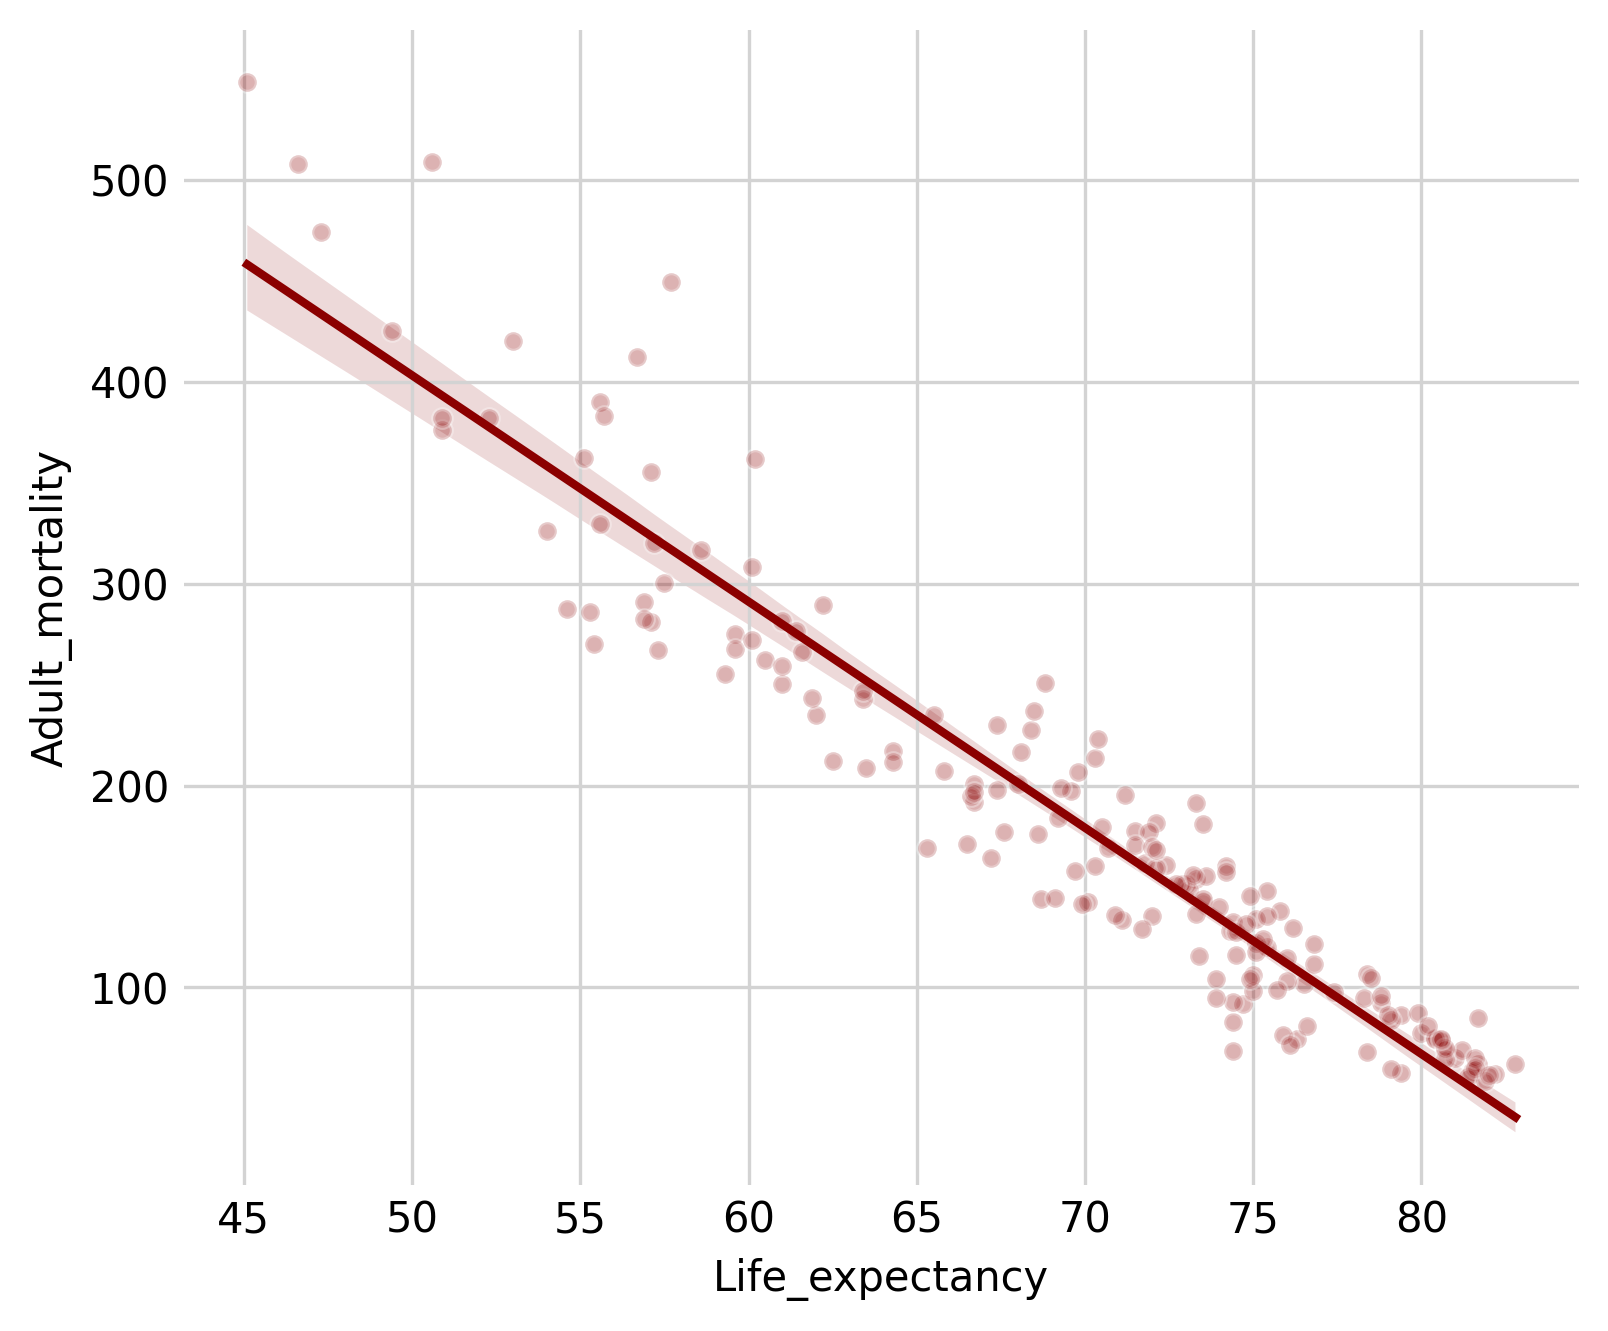

In [69]:
# Plot
plt.figure(figsize=(6, 5))

# Add regression line
sns.regplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='Adult_mortality',
           scatter=True,
           color='darkred',
           line_kws={'linewidth': 2, 'zorder': 3},
           scatter_kws={'alpha': 0.3, 'edgecolor':'white','s':20, 'zorder':2}
           )

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/Y4FzTna.png" width=1024 />




In [71]:
# Exponential regression
from scipy.optimize import curve_fit

def exp_func(x, a, b):
   return a * np.exp(b * x)

popt, _ = curve_fit(exp_func,
                   life_exp_adult_mort['Life_expectancy'],
                   life_exp_adult_mort['GDP_per_capita'],
                   p0=[0.5, 0.1])

# Add predictions
life_exp_adult_mort['predicted_GDP'] = exp_func(life_exp_adult_mort['Life_expectancy'], *popt)

print(f"Exponential regression formula:\ny = {popt[0]:.4f} * exp({popt[1]:.4f}x)")


Exponential regression formula:
y = 0.0024 * exp(0.2055x)


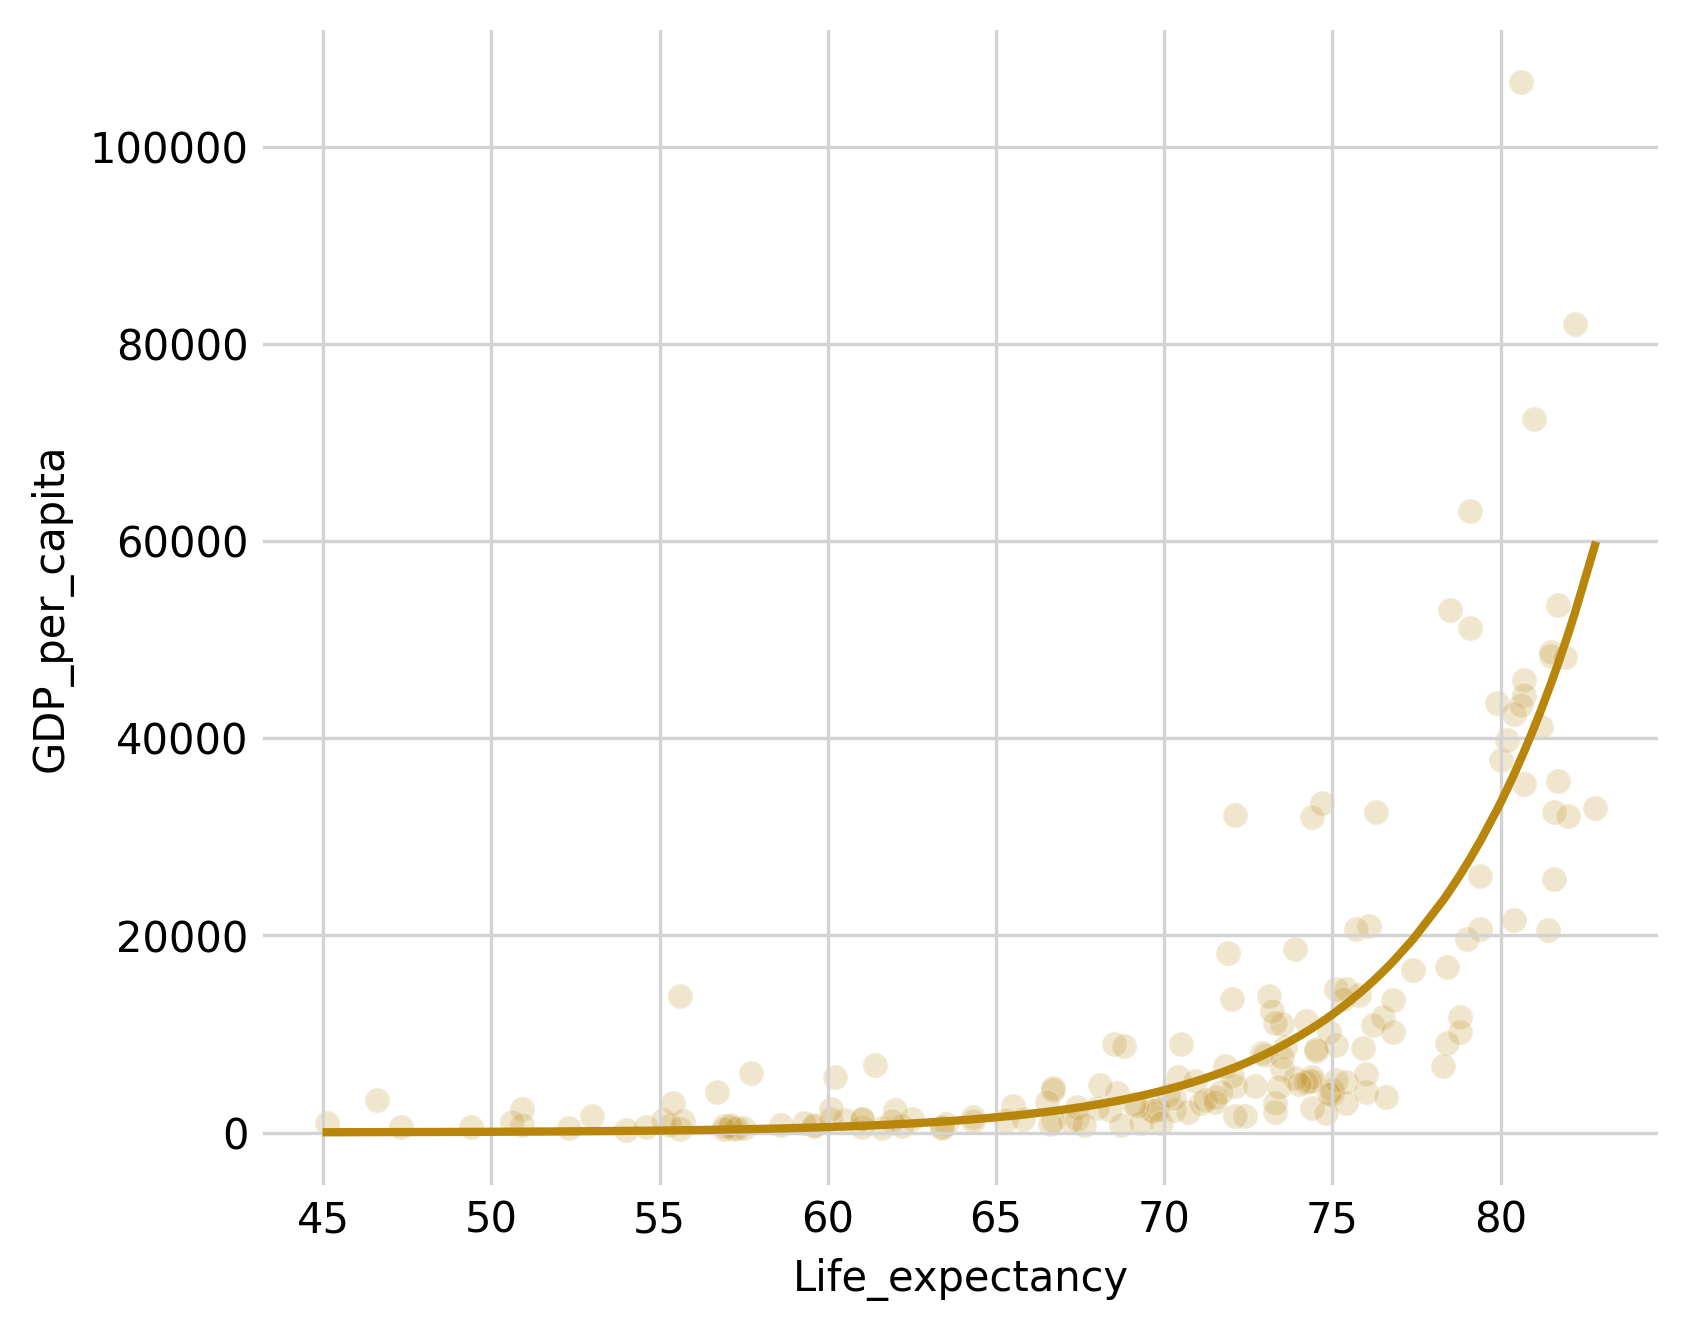

In [72]:
# Plot
plt.figure(figsize=(6, 5))

# Add plot
sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='GDP_per_capita',
           color='darkgoldenrod',
           alpha=0.2)

# Plot the curve
sns.lineplot(data=life_exp_adult_mort,
             x='Life_expectancy',
             y='predicted_GDP',
             color='darkgoldenrod',
             linewidth=2)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/uE0lglQ.png" width=1024 />




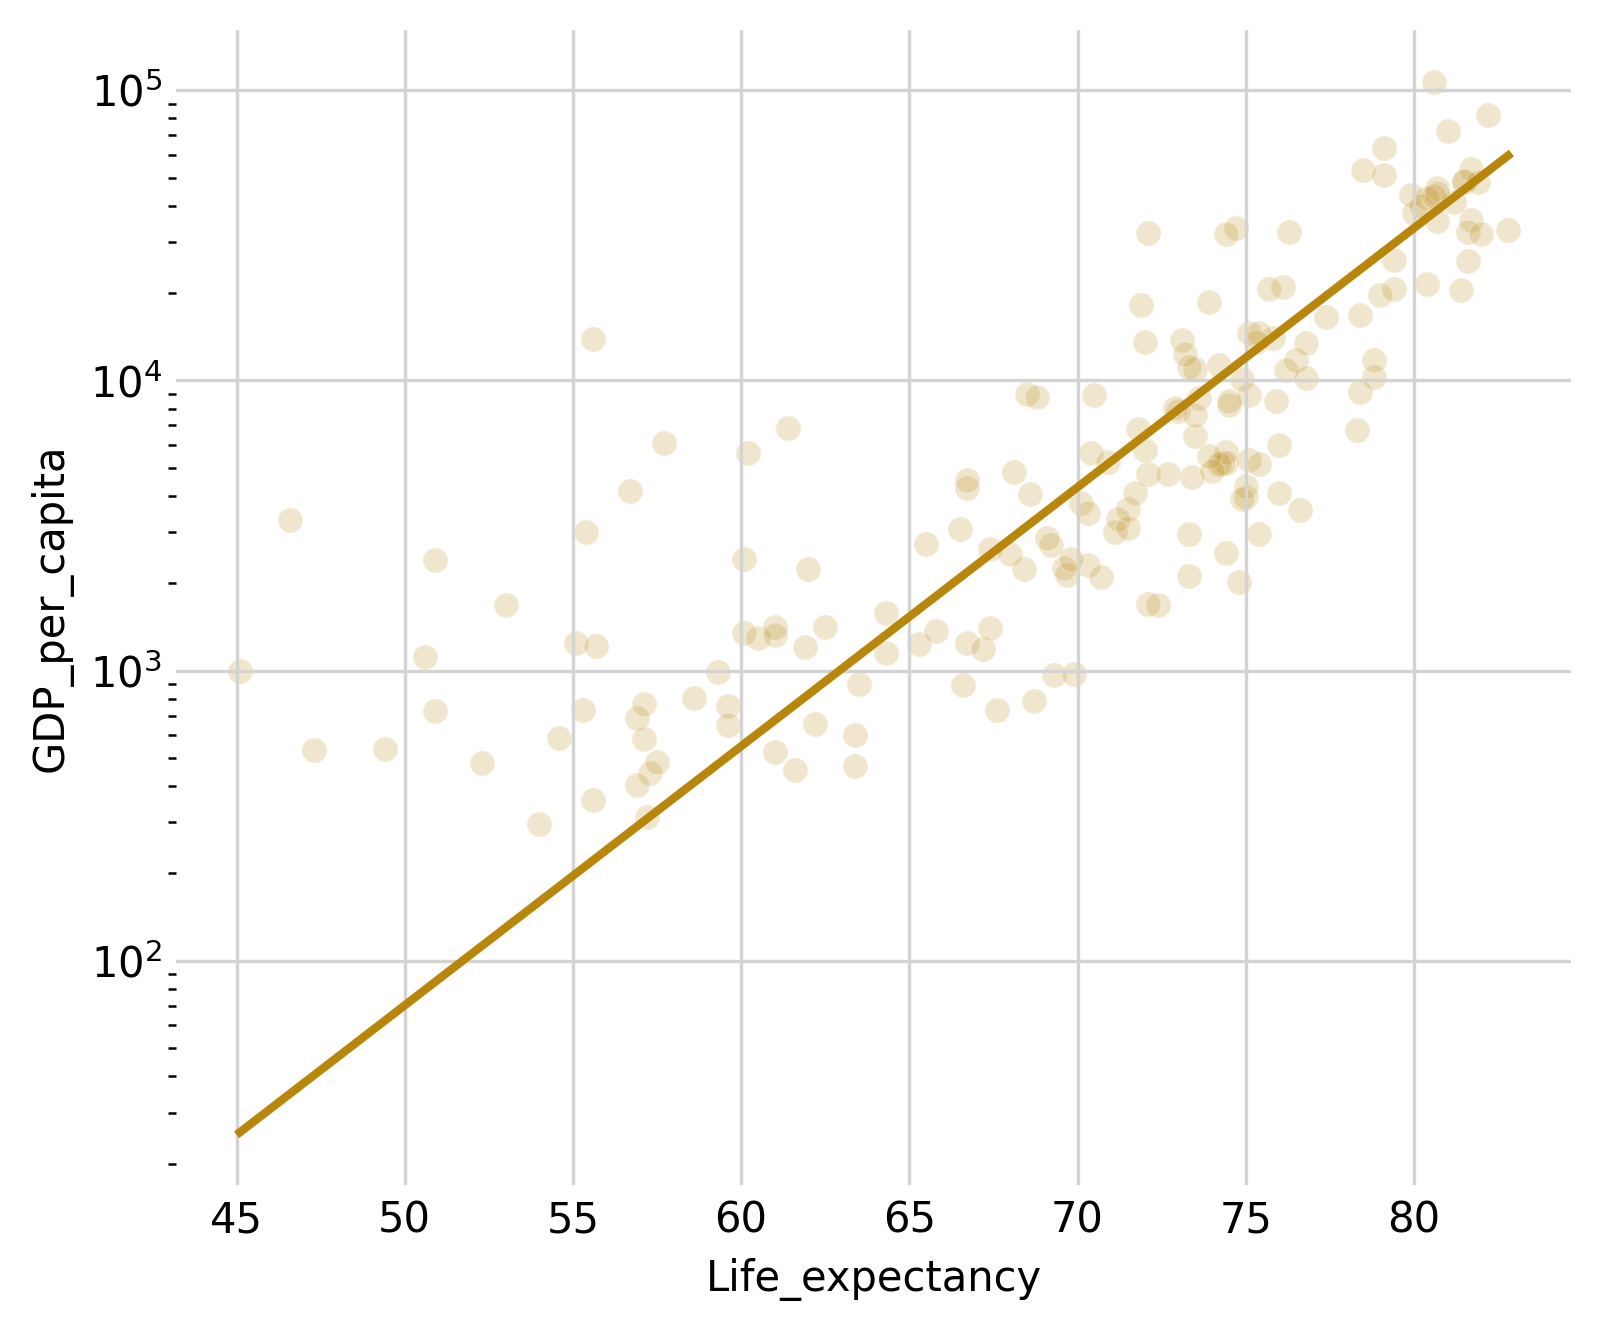

In [73]:
plt.figure(figsize=(6, 5))

# Add plot
sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='GDP_per_capita',
           color='darkgoldenrod',
           alpha=0.2)

# Plot the curve
sns.lineplot(data=life_exp_adult_mort,
             x='Life_expectancy',
             y='predicted_GDP',
             color='darkgoldenrod',
             linewidth=2)

# Set log scale for y-axis
plt.yscale('log')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/HCsGggf.png" width=1024 />




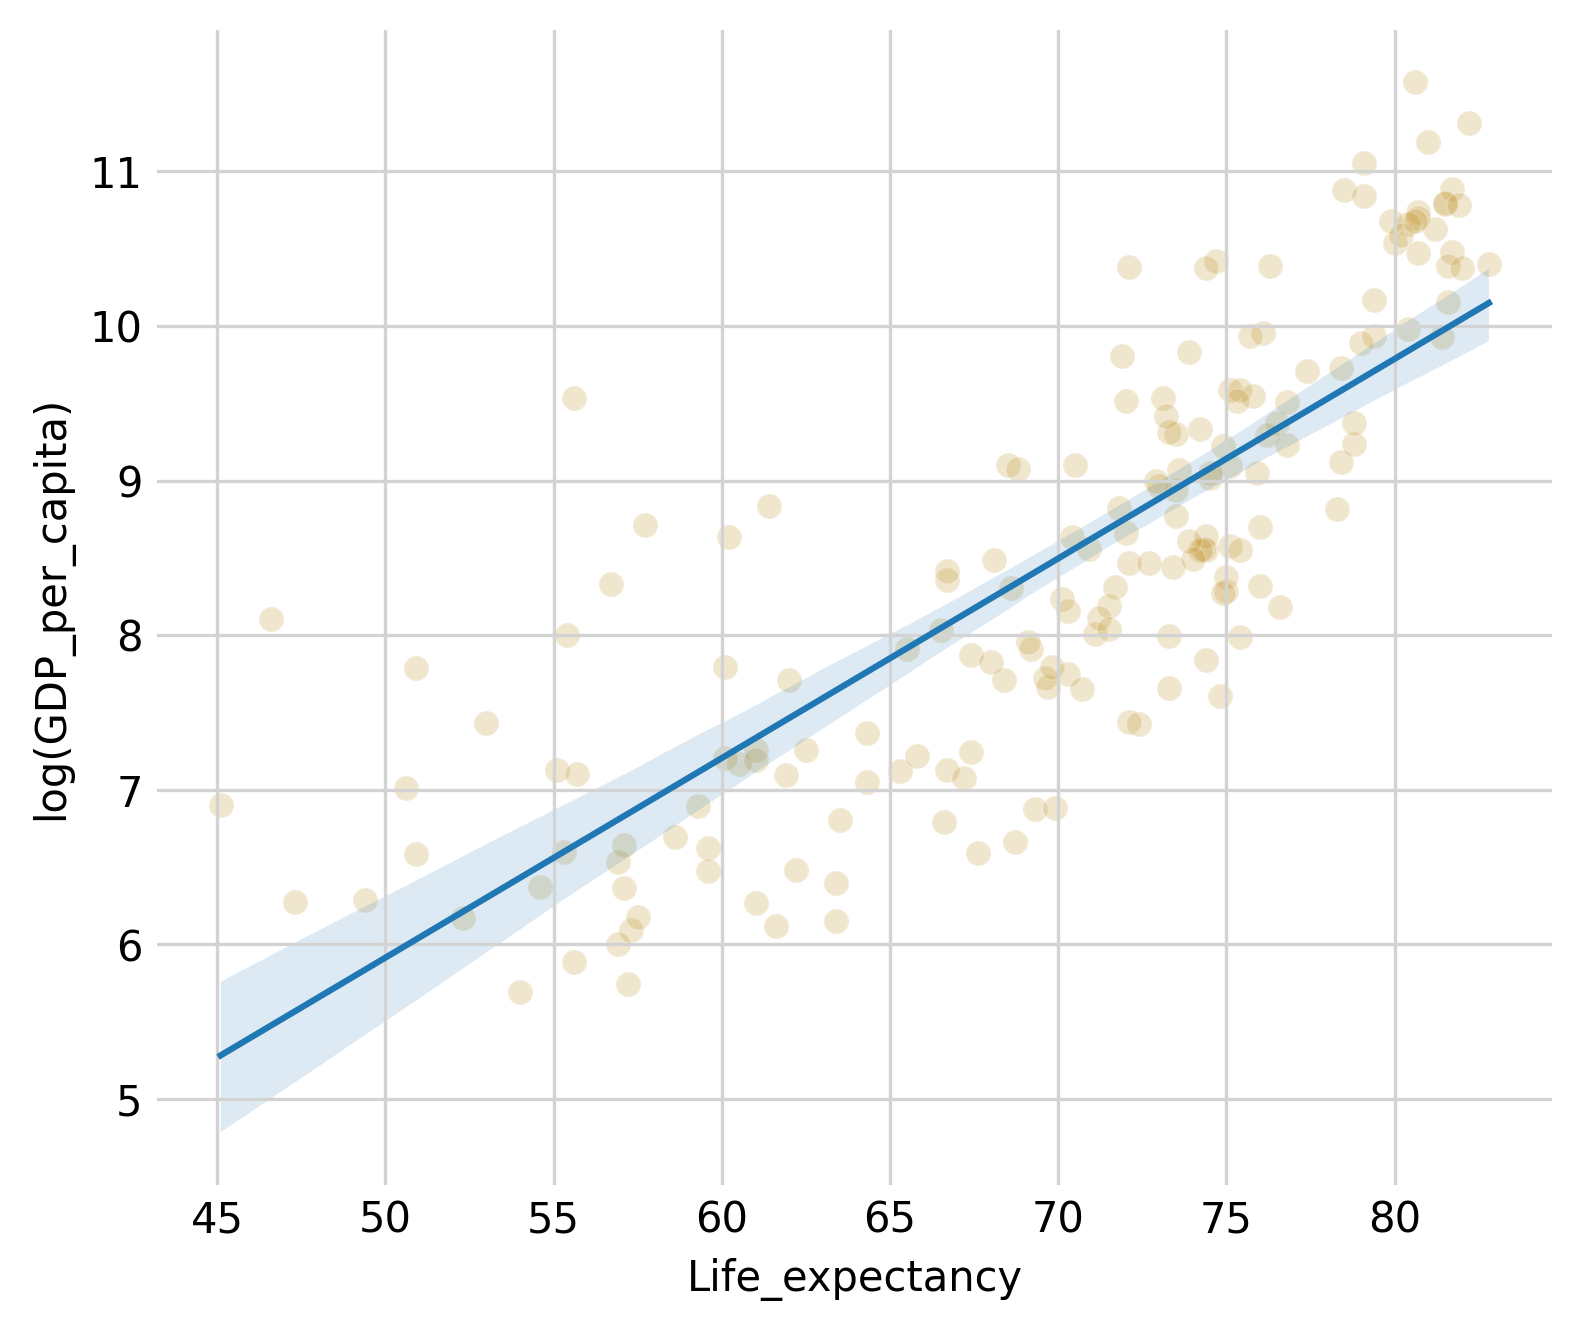

In [74]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y=np.log(life_exp_adult_mort['GDP_per_capita']),
           color='darkgoldenrod',
           alpha=0.2)

sns.regplot(data=life_exp_adult_mort,
            x='Life_expectancy',
            y=np.log(life_exp_adult_mort['GDP_per_capita']),
            scatter=False,
            line_kws={'linewidth': 1.5})

plt.ylabel('log(GDP_per_capita)')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/r45DeNb.png" width=1024 />




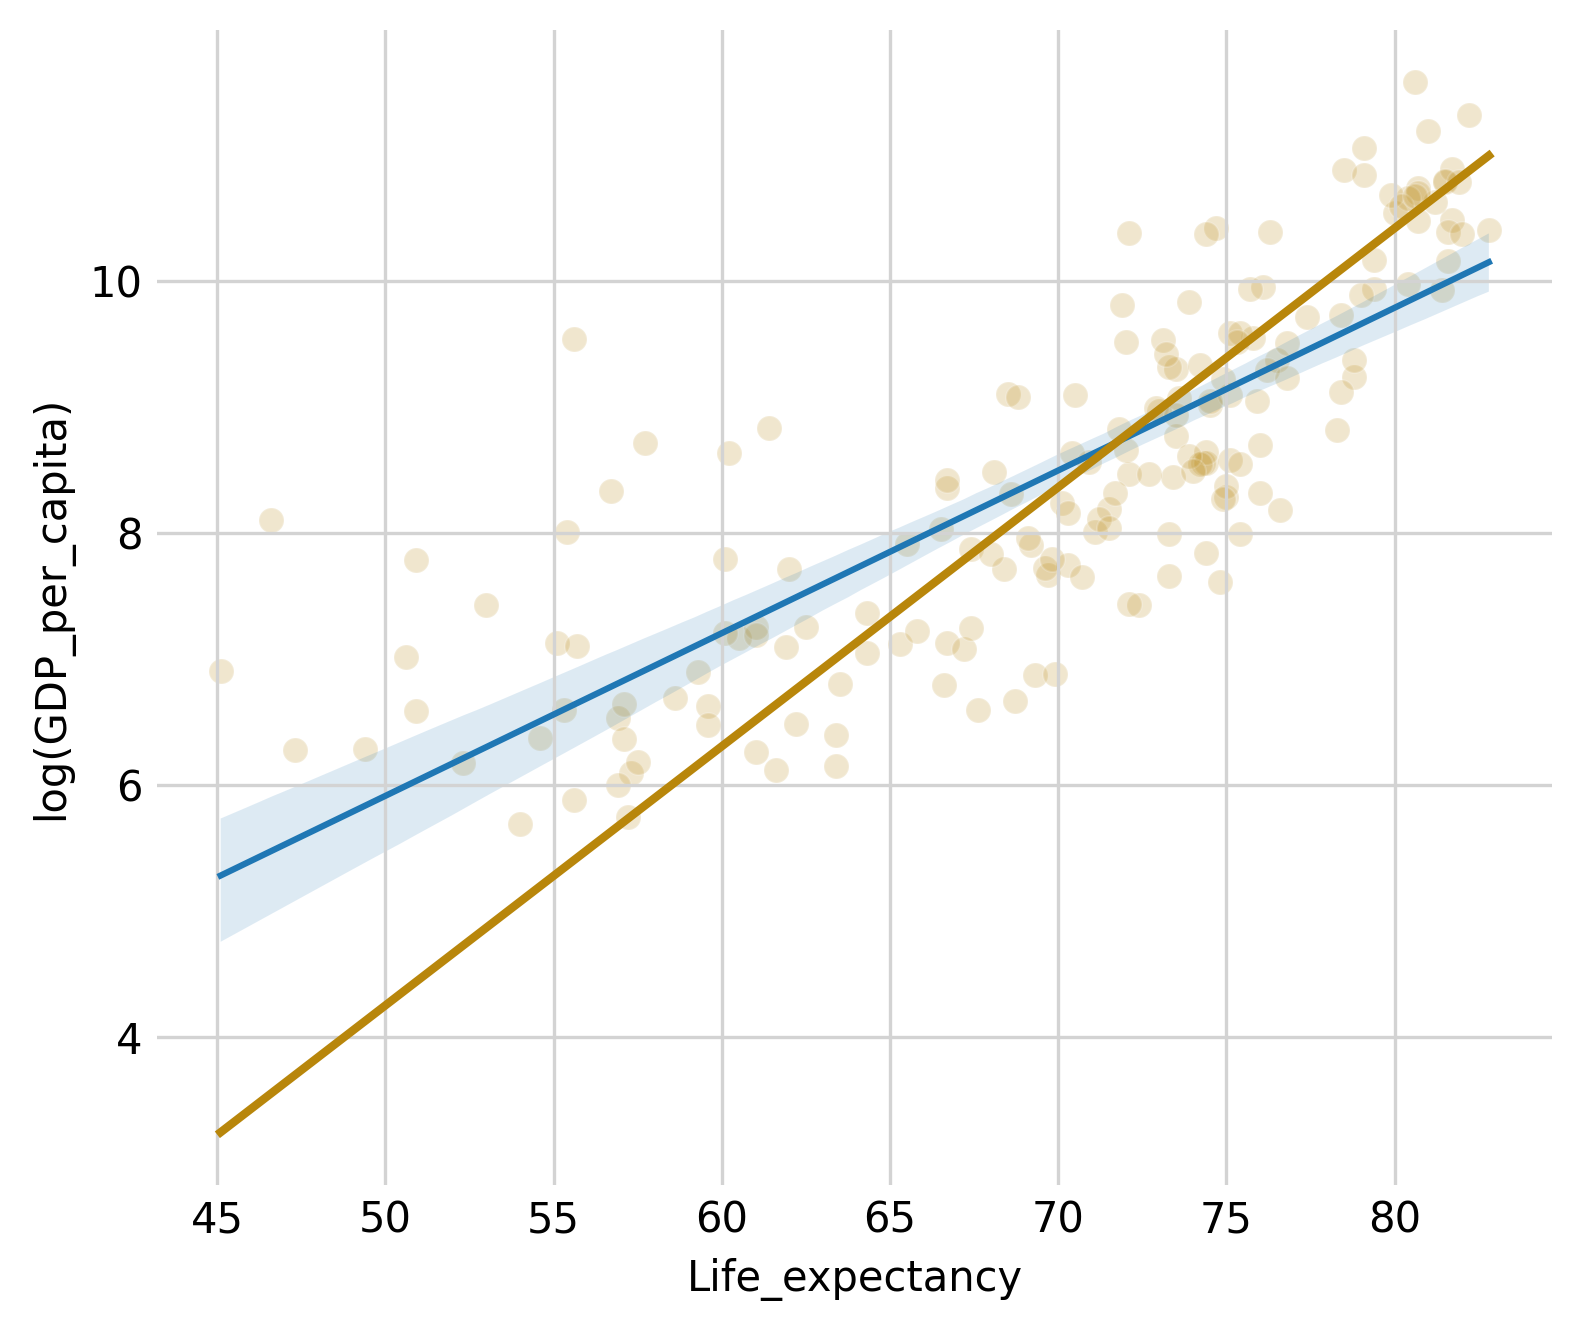

In [75]:
plt.figure(figsize=(6, 5))

# Scatter plot
sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y=np.log(life_exp_adult_mort['GDP_per_capita']),
           color='darkgoldenrod',
           alpha=0.2)

# Linear regression line
sns.regplot(data=life_exp_adult_mort,
            x='Life_expectancy',
            y=np.log(life_exp_adult_mort['GDP_per_capita']),
            scatter=False,

            line_kws={'linewidth': 1.5})

# Exponential regression line
sns.lineplot(data=life_exp_adult_mort,
             x='Life_expectancy',
             y=np.log(life_exp_adult_mort['predicted_GDP']),
             color='darkgoldenrod',
             linewidth=2)

plt.ylabel('log(GDP_per_capita)')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#009BF3"><strong>  Practice 4.5 ᆢ</strong></font>ᆢᆢ
**Issue: In Developing countries, can we formulate child thinness using BMI?**

Try to formulate a linear regression for `Thinness_five_nine_years` vs `BMI` then plot the scatterplot and the regression line.

In [76]:
# Filter and select data for developing countries in 2010
thinness_BMI_data = life_expectancy[
    (life_expectancy['Year'] == 2010) &
    (life_expectancy['Economy_status_Developing'] == 1)
][['Country', 'Thinness_five_nine_years', 'BMI', 'Population_mln']]

# Print the result
thinness_BMI_data

Country  Thinness_five_nine_years   BMI  Population_mln
45                      Belize                       3.4  28.4            0.32
50           Brunei Darussalam                       5.4  26.4            0.39
86               Guinea-Bissau                       7.9  23.0            1.52
89                     Namibia                       1.4  23.8            2.12
127                     Bhutan                      17.3  23.3            0.69
...                        ...                       ...   ...             ...
2805                      Togo                       7.2  23.1            6.42
2813          Congo, Dem. Rep.                       1.2  21.6           64.56
2825                    Guyana                       5.3  25.8            0.75
2835                     Gabon                       6.4  24.7            1.62
2841  Central African Republic                       8.9  22.4            4.39

[142 rows x 4 columns]

Visualization:

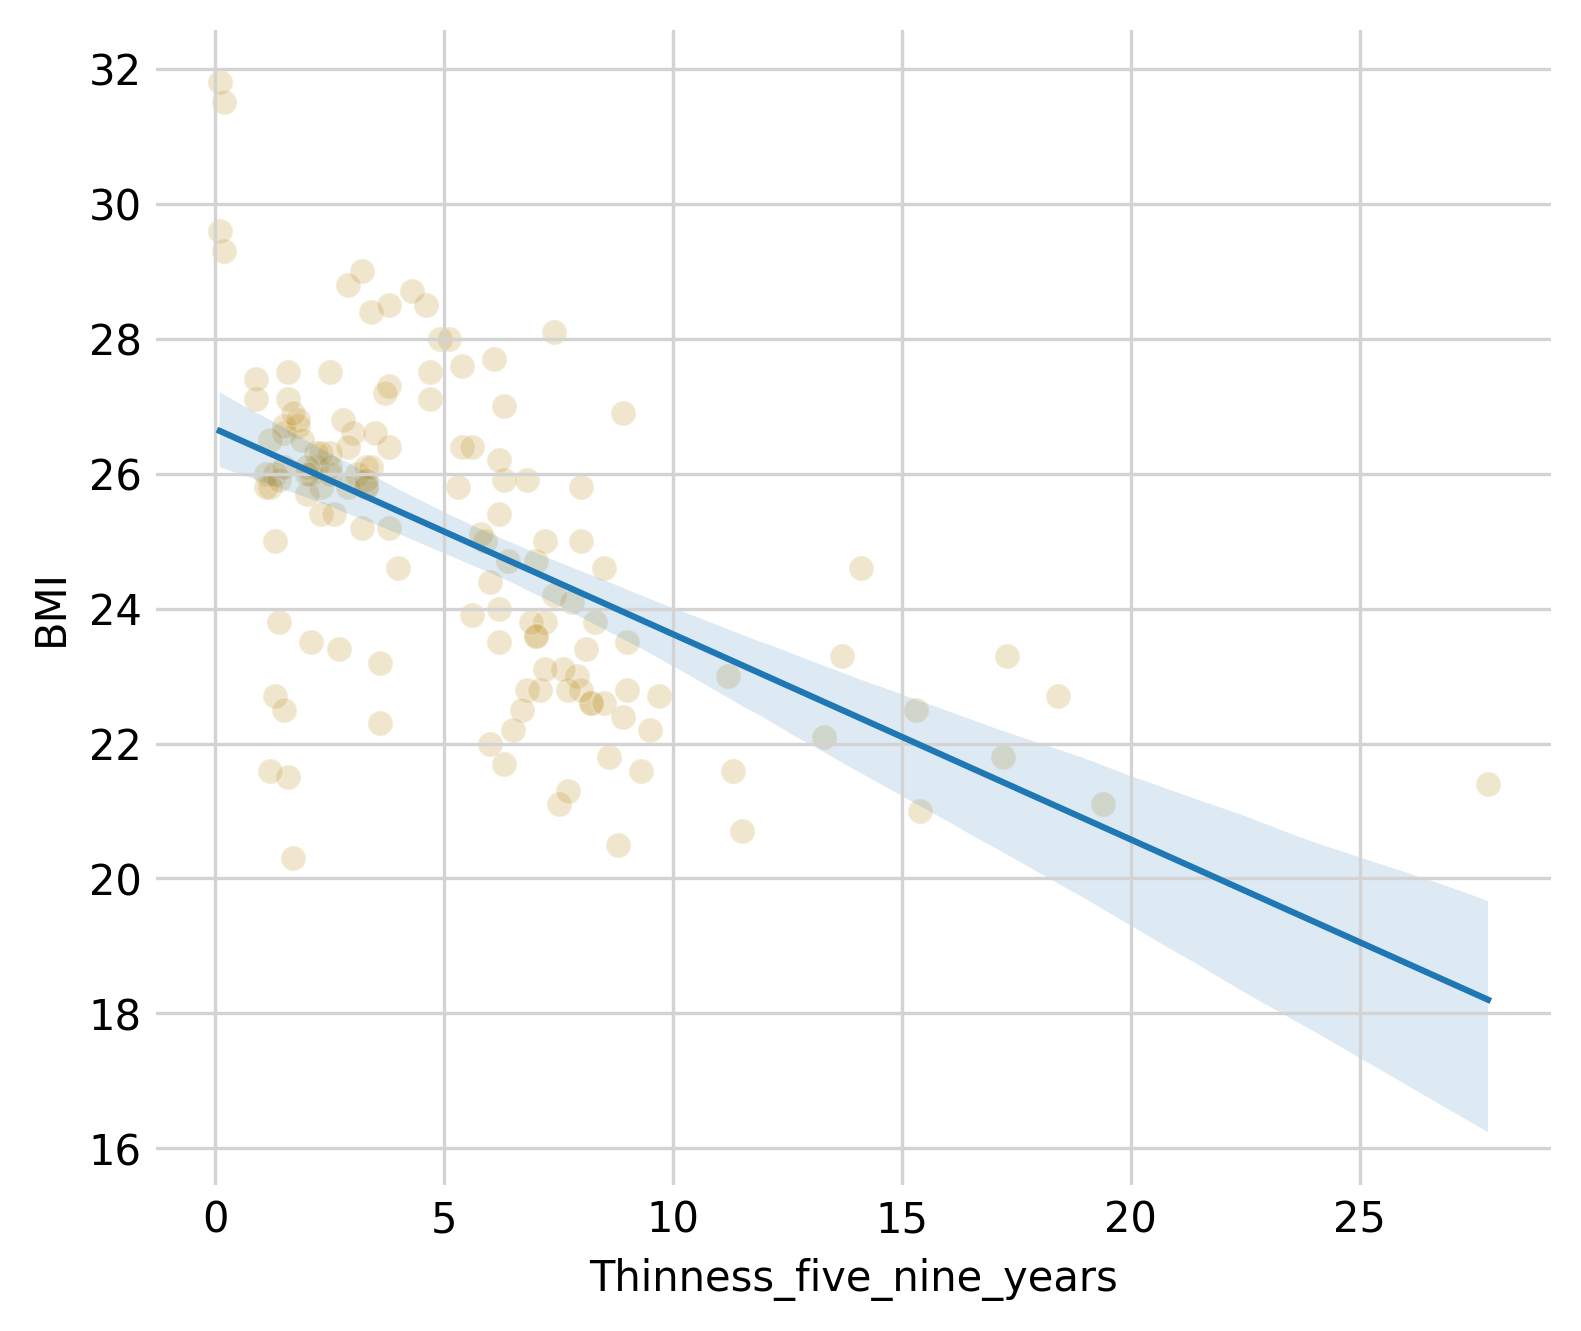

In [78]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=thinness_BMI_data,
           x='Thinness_five_nine_years',
           y=thinness_BMI_data['BMI'],
           color='darkgoldenrod',
           alpha=0.2)

sns.regplot(data=thinness_BMI_data,
            x='Thinness_five_nine_years',
            y=thinness_BMI_data['BMI'],
            scatter=False,
            line_kws={'linewidth': 1.5})

plt.ylabel('BMI')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

---
---
---